<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 4*

# 📝 Assignment
---

# Interpreting ML Model

### 1) PDP를 만들어 모델을 설명하세요
- 한 특성에 대한 PDP를 만들고 모델을 설명하세요
- 두 특성간 관계에 대한 PDP를 만들고 모델을 설명하세요
- **(제출폼 과제)Boston 데이터의 train 데이터를 사용해 PDP plots을 그린 후, 집값에 대해 상대적으로 양의 선형관계를 나타내는 특성의 번호를 과제 제출폼에 제출하세요.**
    - 1. LSTAT
    - 2. CRIM
    - 3. NOX
    - 4. RM <-


In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 

In [ ]:
!pip install shap
!pip install pdpbox 

In [13]:
import pandas as pd

df = pd.read_csv('Lol_matchs.csv', index_col = 0)
team1 = df.iloc[:, :150]
team2 = df.iloc[:, 150:300]
result = df.iloc[:, 300:]

df_champ = pd.read_csv('riot_champion.csv')
df_champ[['id', 'tags']]
df_champ['tags'].unique().sum()
position = []
for i in df_champ['tags'][:]:
  position = set(position).union(set(i.replace('[', '').replace(']', '').replace("'", '').replace(' ', '').split(',')))

df.rename(columns = {'Wukong' : 'MonkeyKing'}, inplace = True)

df_champ = df_champ.append(pd.DataFrame({'id' : ['Lillia', 'Yone'], 'tags' : [['Mage', 'Support'], ['Fighter', 'Assassin']]}))

df_champ.sort_values('id', inplace = True)
df_champ.reset_index(inplace = True)

for i in range(150):
  if df.columns[:150].sort_values()[i] in df_champ.id.values:
    pass
  else:
    df.rename(columns = {df.columns[:150].sort_values()[i] : df_champ.id.values[i]}, inplace = True)

for i in df_champ['tags'][:]:
  try:
    df_champ['tags'][i] = i.replace('[', '').replace(']', '').replace("'", '').replace(' ', '')
  except:
    pass

for i, j in zip(df_champ['tags'], range(150)):
  try:
    df_champ['tags'][j] = i.replace('[', '').replace(']', '').replace("'", '').replace(' ', '').split(',')
  except:
    pass

df_copy = df.iloc[:, :150]
df_copy['tags'] = str([[df_champ['tags'].T[j] for i, j in zip(df_copy.loc[k], range(150)) if i] for k in range(len(df_copy))])

df_copy['target'] = df.Team1

In [15]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_copy, train_size=0.80, test_size=0.20, 
                                        stratify=df_copy.target, random_state=2)

train_data, val_data = train_test_split(train_data, train_size=0.80, test_size=0.20, 
                                        stratify=train_data.target, random_state=2)

X_train = train_data.drop('target', axis = 1)
y_train = train_data.target

X_val = val_data.drop('target', axis = 1)
y_val = val_data.target

X_test = test_data.drop('target', axis = 1)
y_test = test_data.target

X_train.shape, X_val.shape, X_test.shape

((22193, 151), (5549, 151), (6936, 151))

In [16]:
### (본인 포트폴리오 과제) 이곳에서 과제를 진행해 주세요 ### 
!pip install category_encoders
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from category_encoders import OneHotEncoder

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_train_pred = pipe.predict(X_train)
y_val_pred = pipe.predict(X_val)
y_test_pred = pipe.predict(X_test)
print('훈련 정확도: ', accuracy_score(y_train, y_train_pred))
print('검증 정확도: ', accuracy_score(y_val, y_val_pred))
print('테스트 정확도: ', accuracy_score(y_test, y_test_pred))

print(classification_report(y_test_pred, y_test))

훈련 정확도:  0.8071463975127292
검증 정확도:  0.6604793656514687
테스트 정확도:  0.649365628604383
              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64      3337
         1.0       0.67      0.65      0.66      3599

    accuracy                           0.65      6936
   macro avg       0.65      0.65      0.65      6936
weighted avg       0.65      0.65      0.65      6936



TypeError: ignored

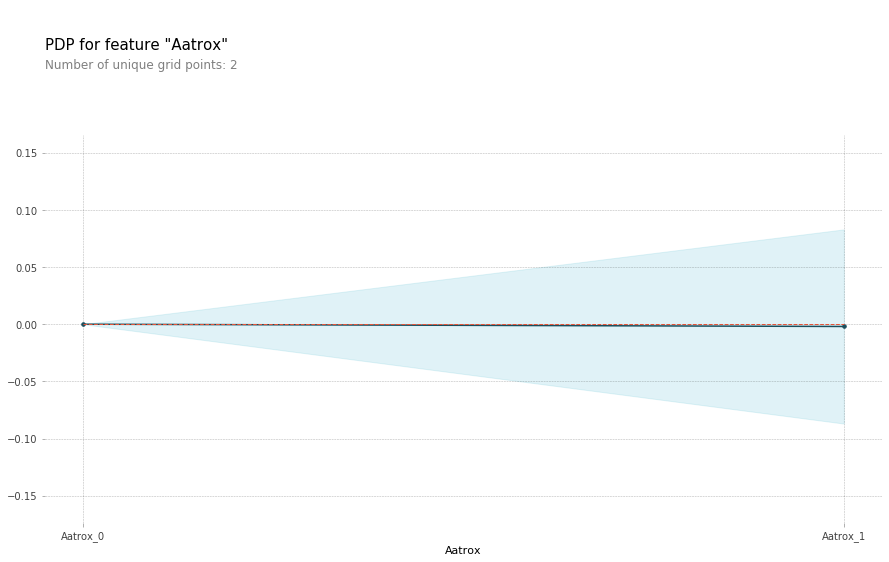

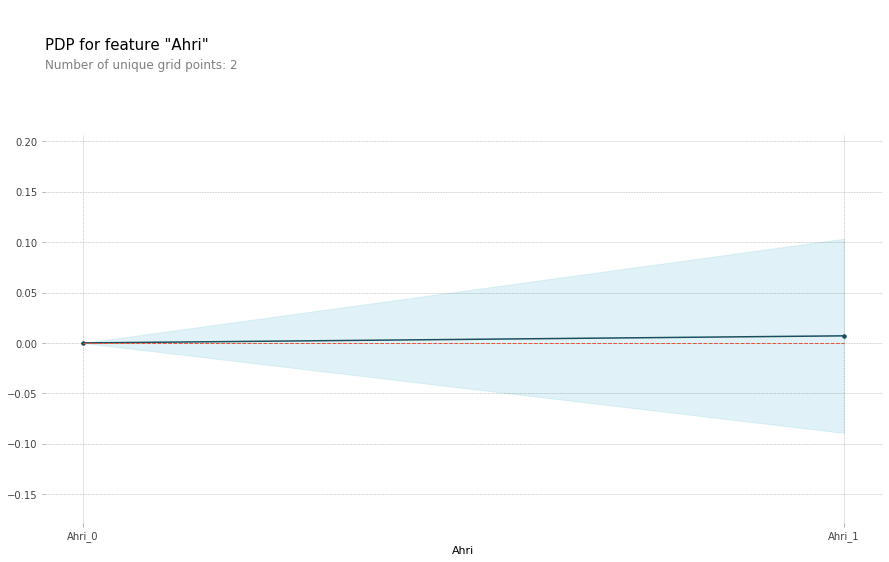

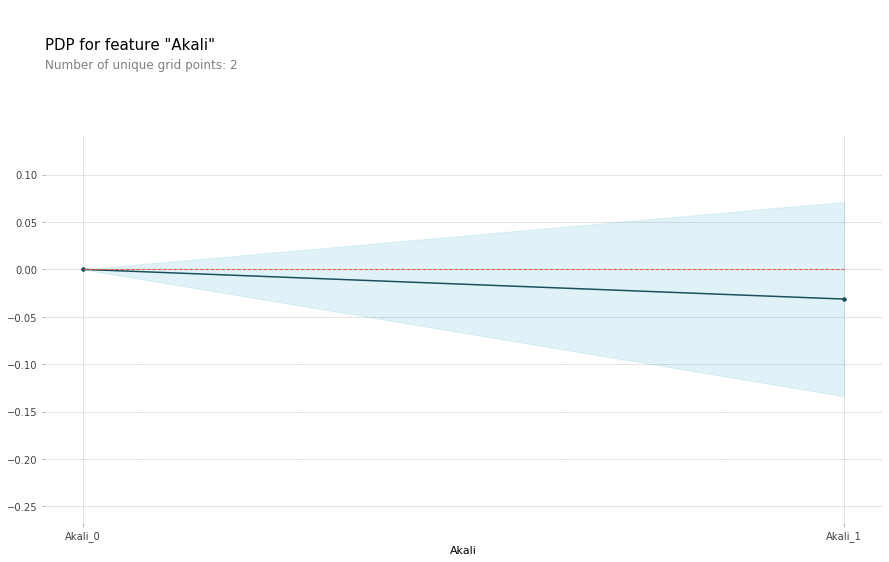

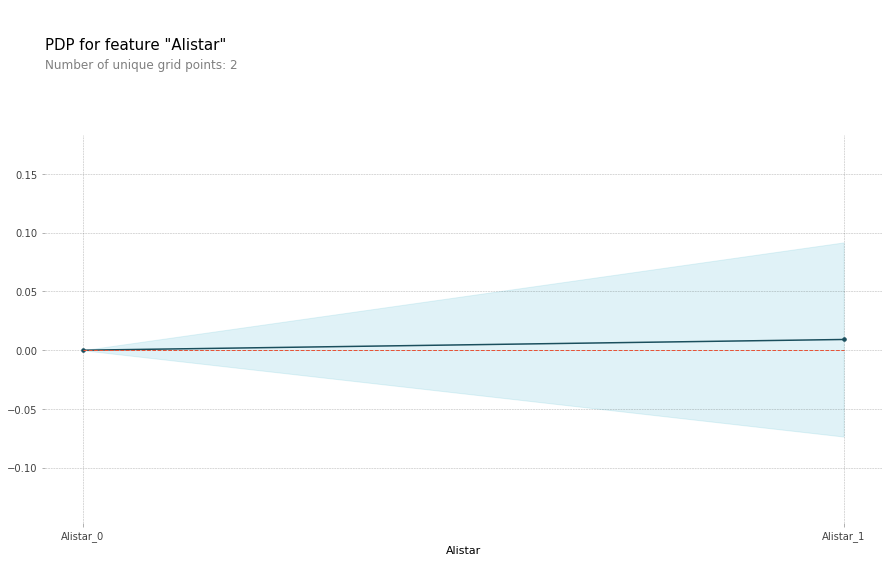

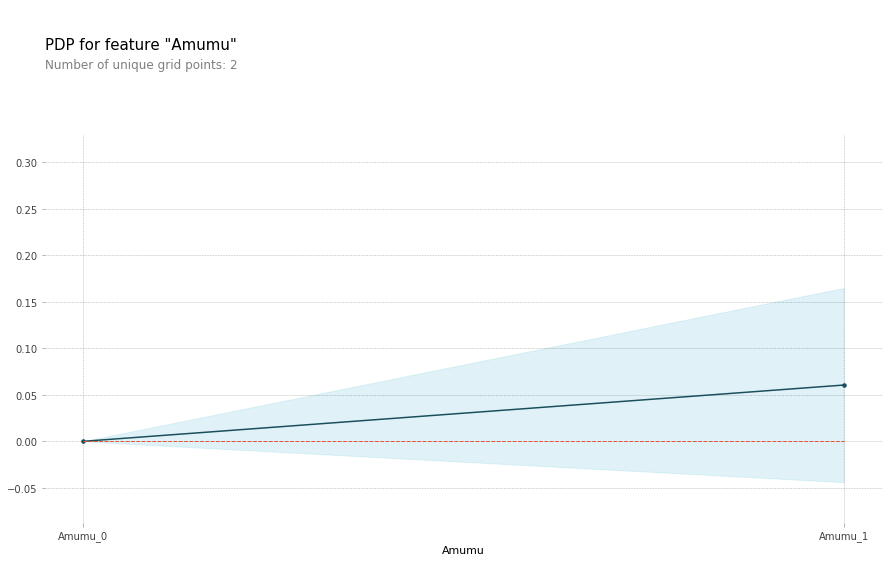

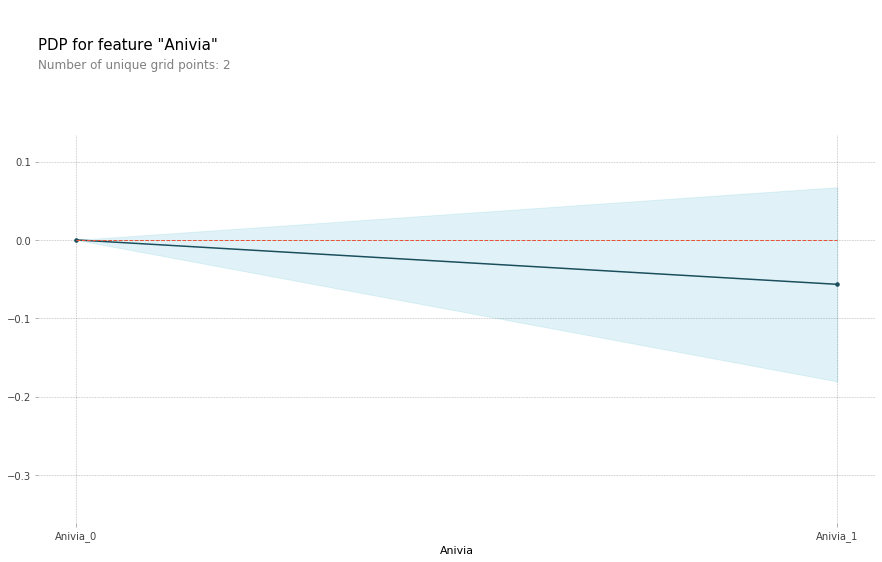

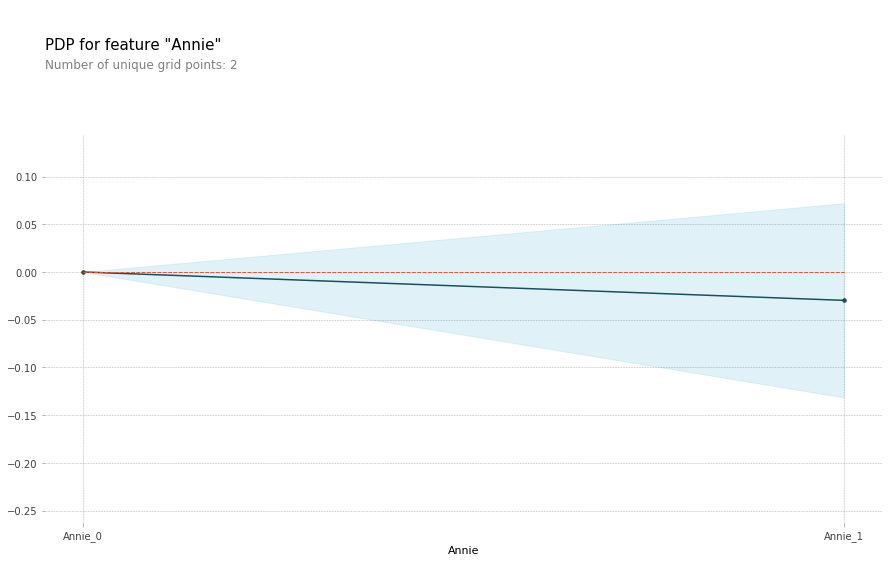

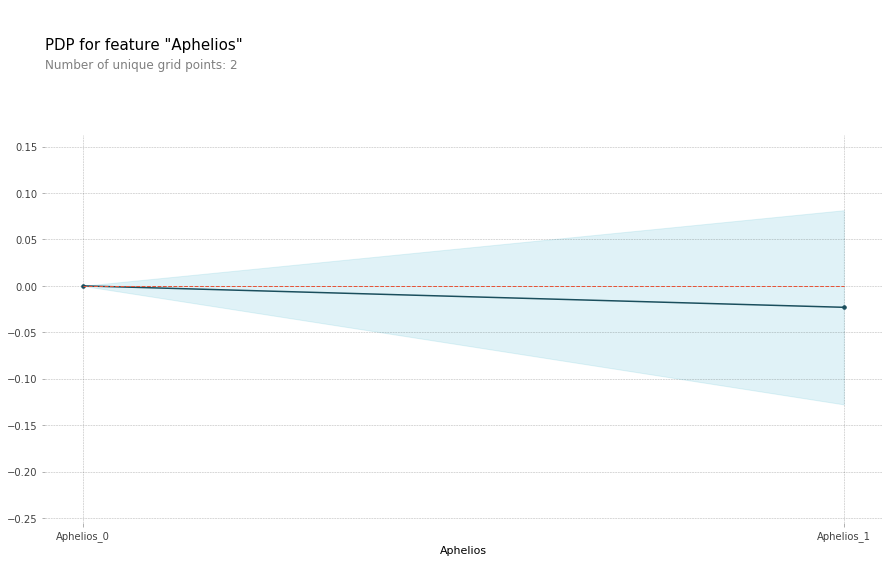

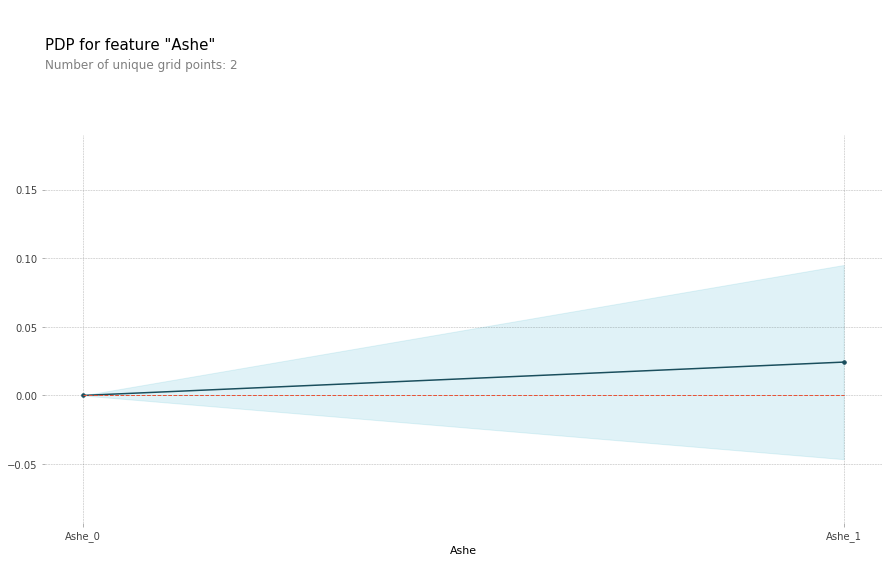

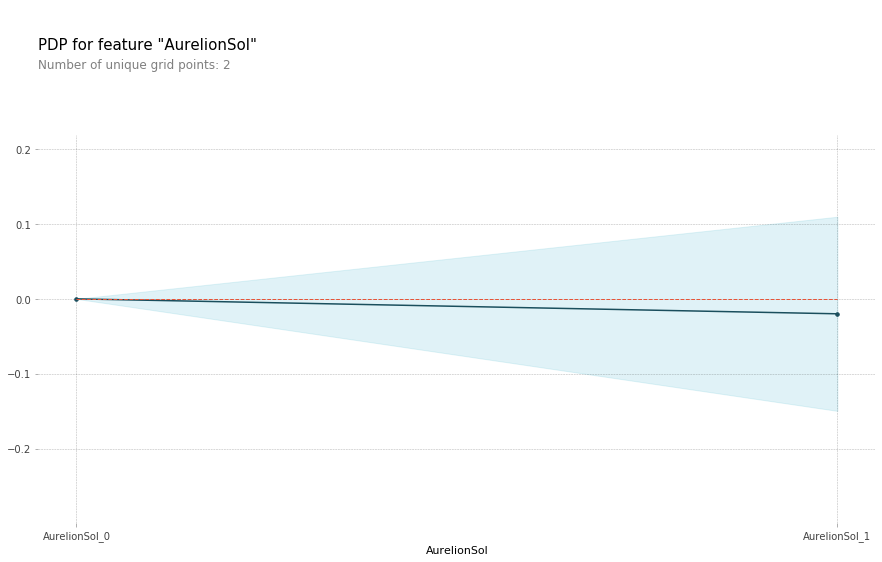

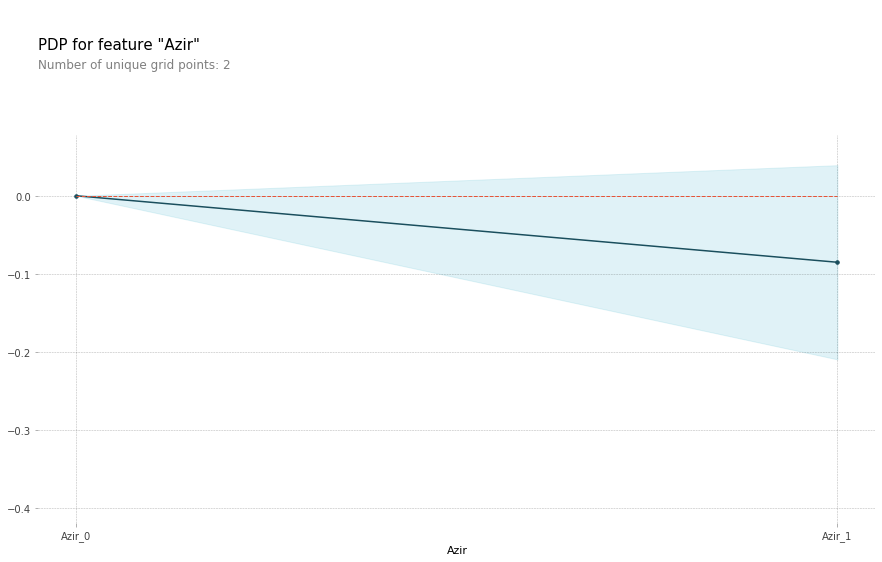

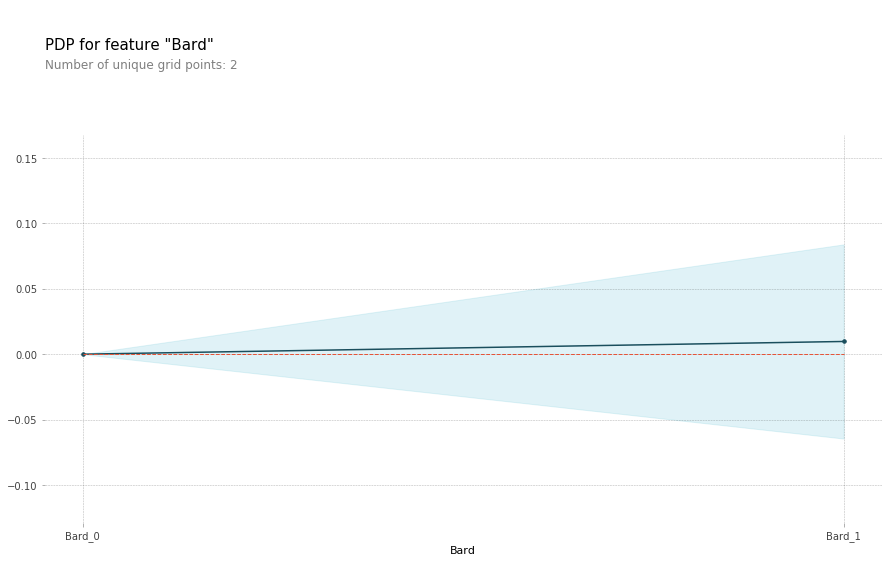

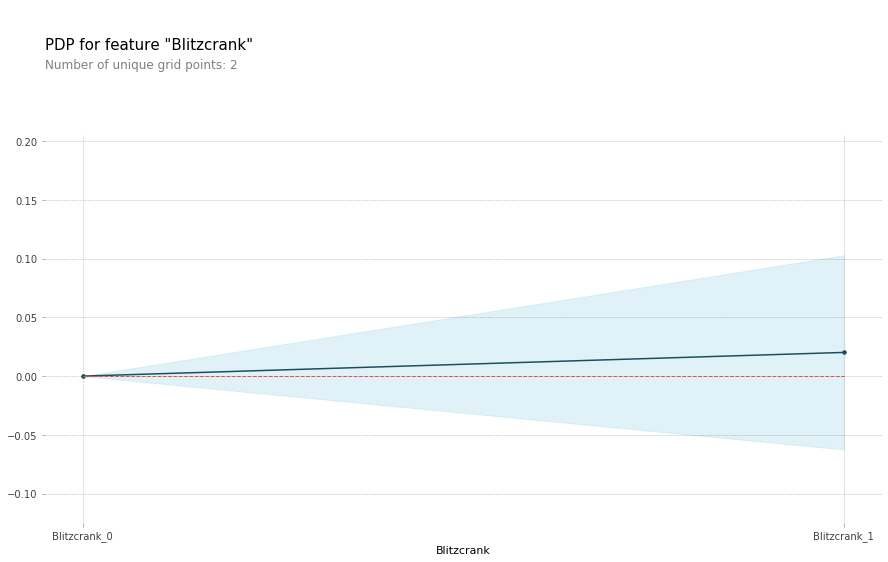

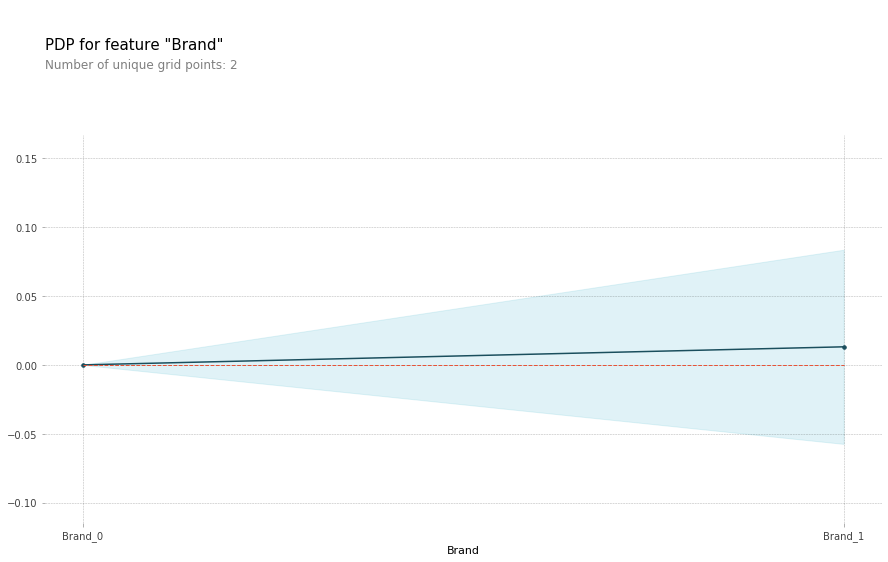

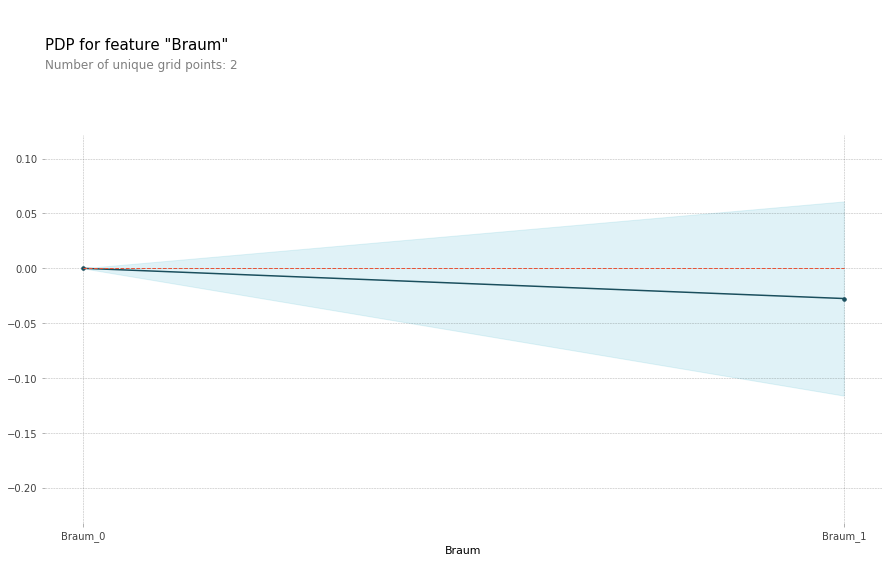

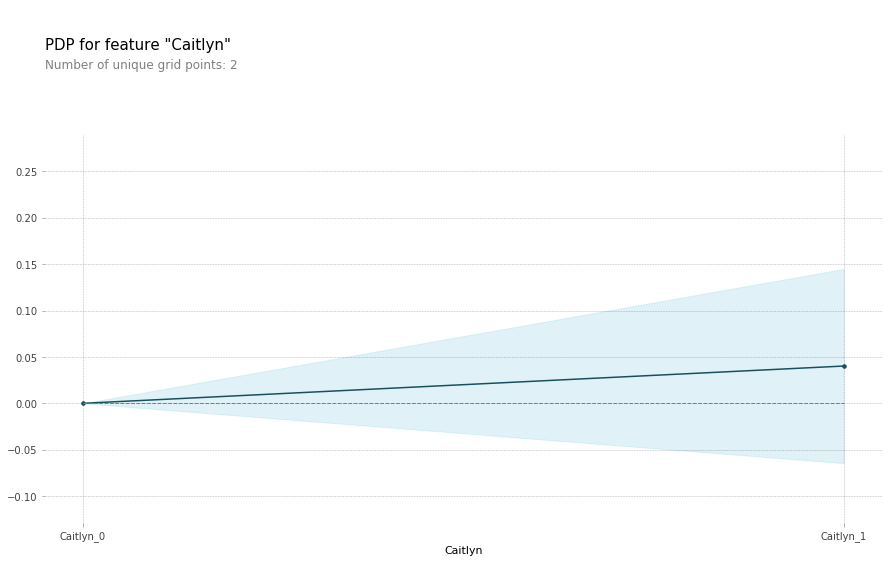

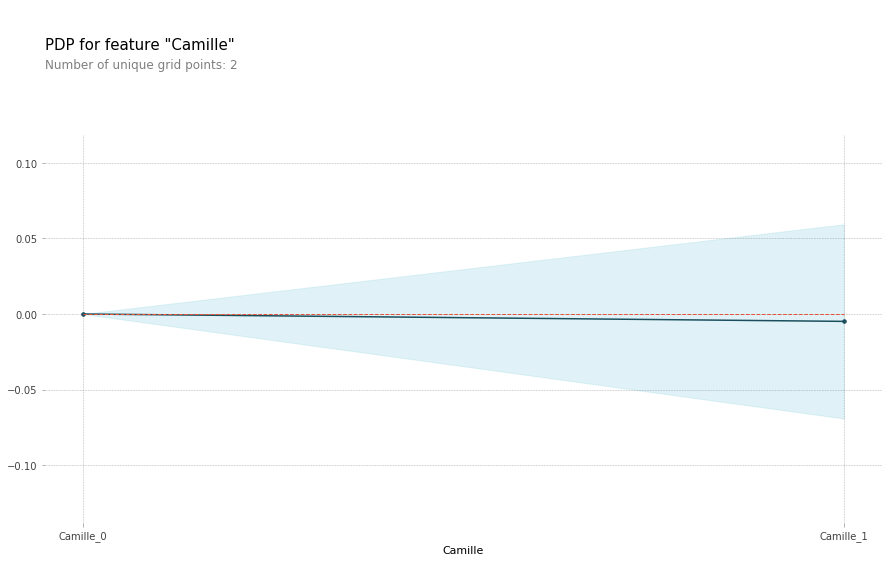

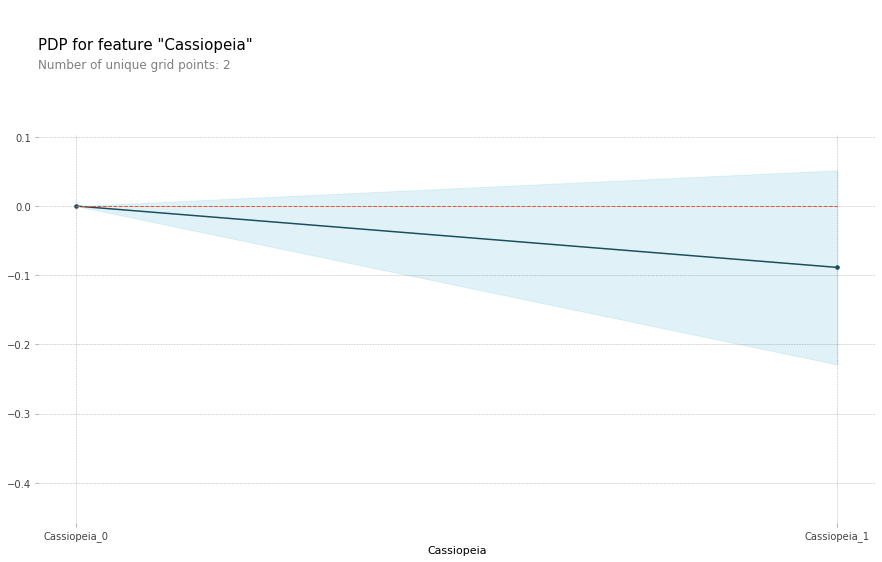

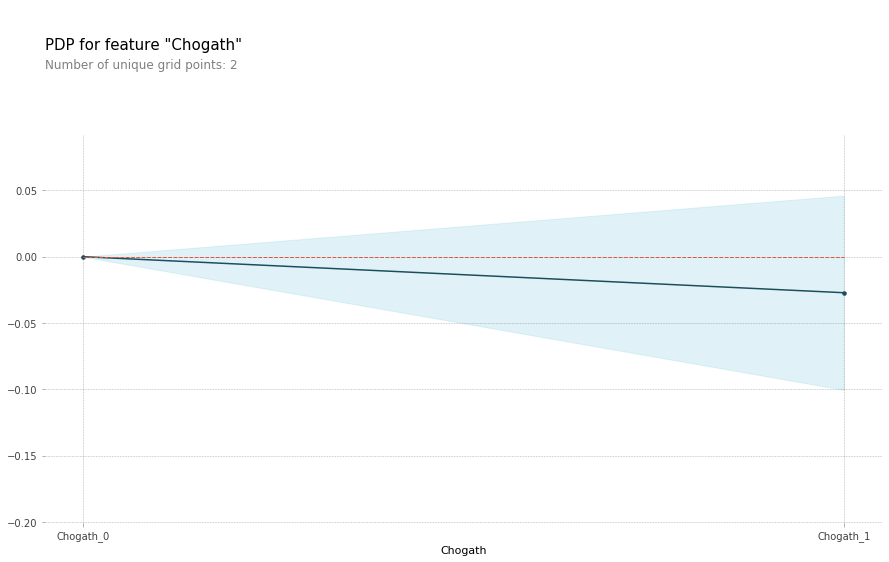

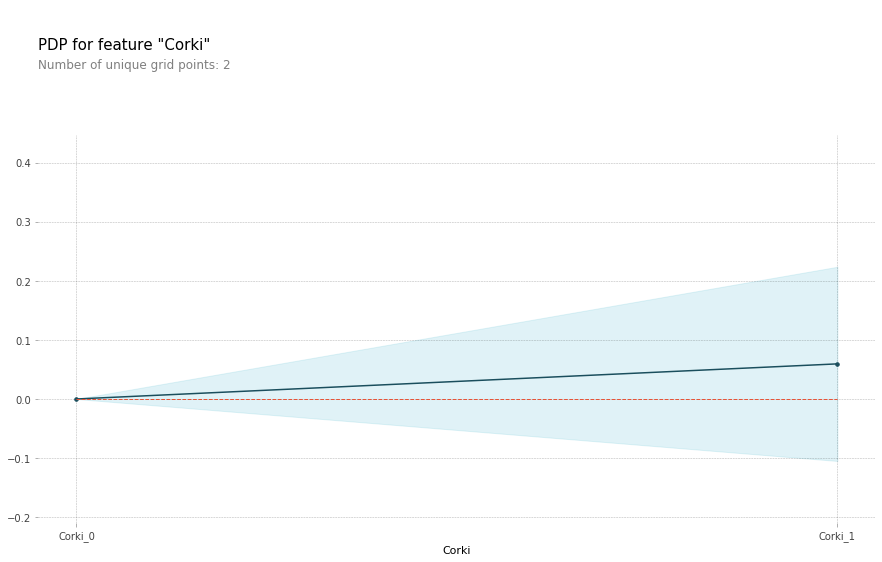

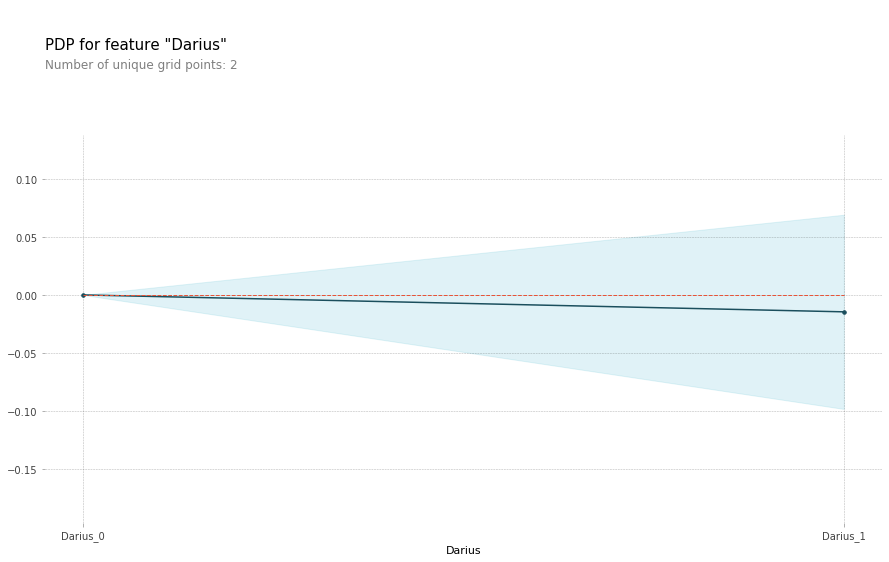

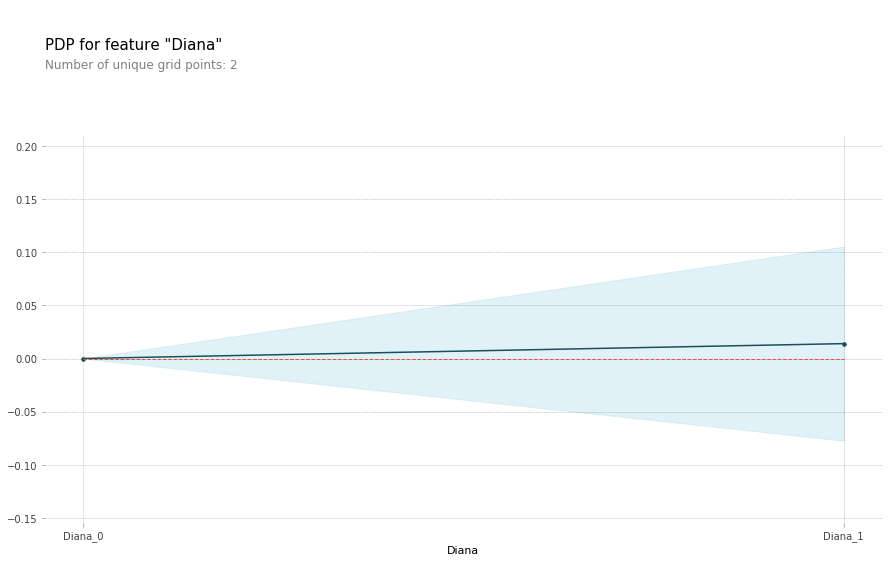

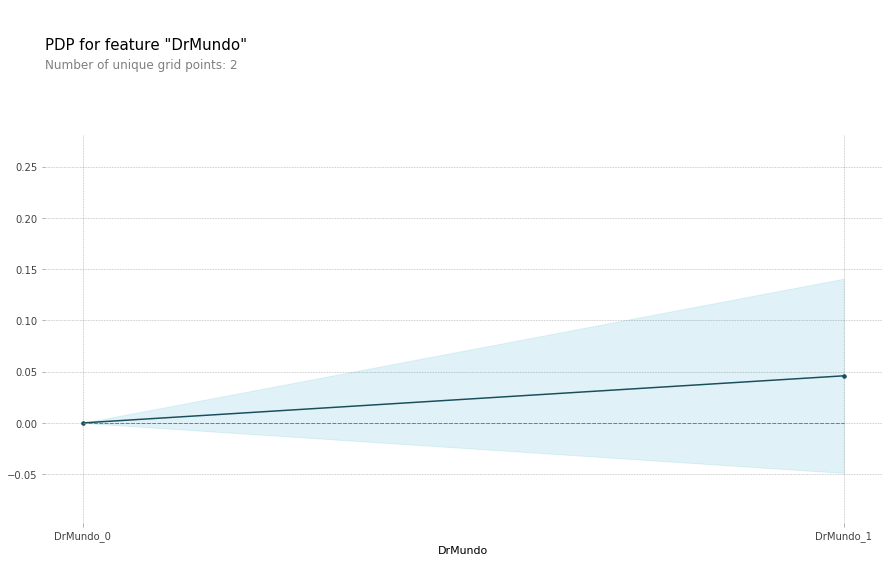

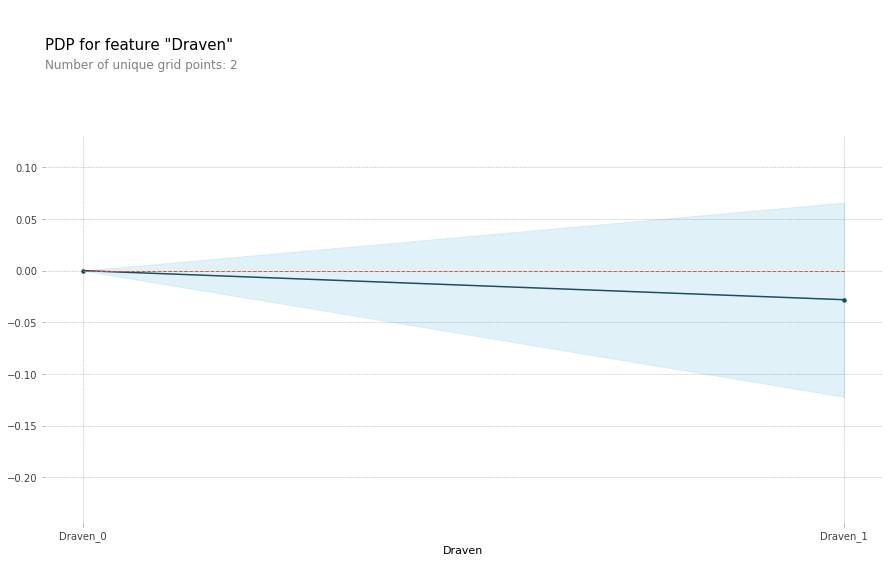

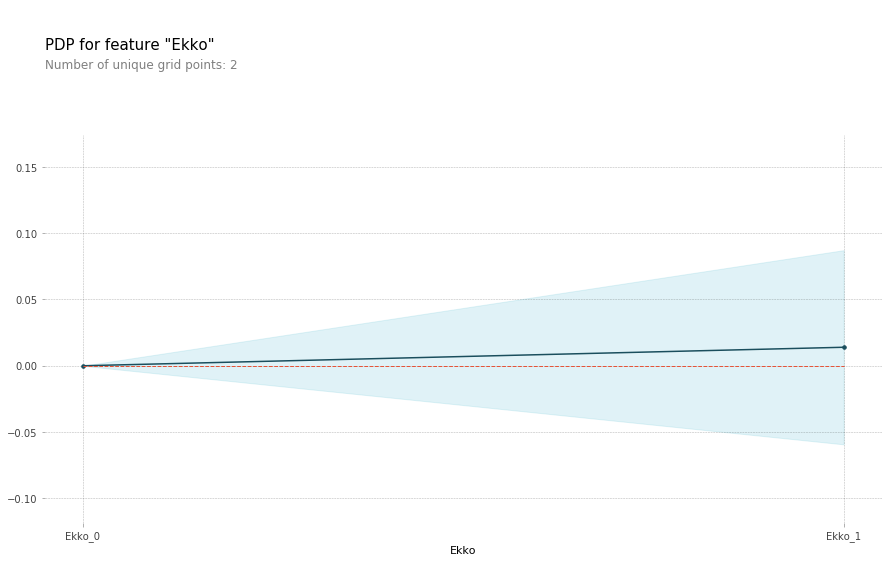

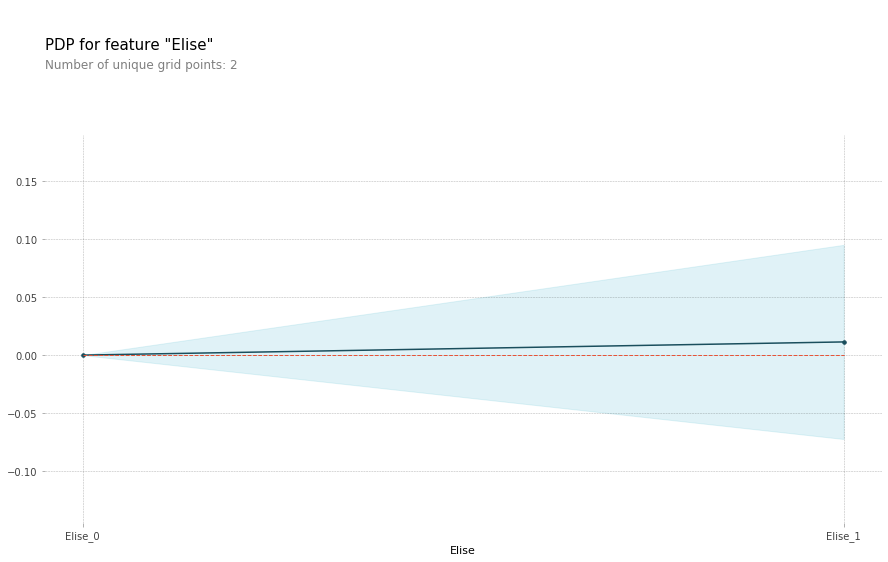

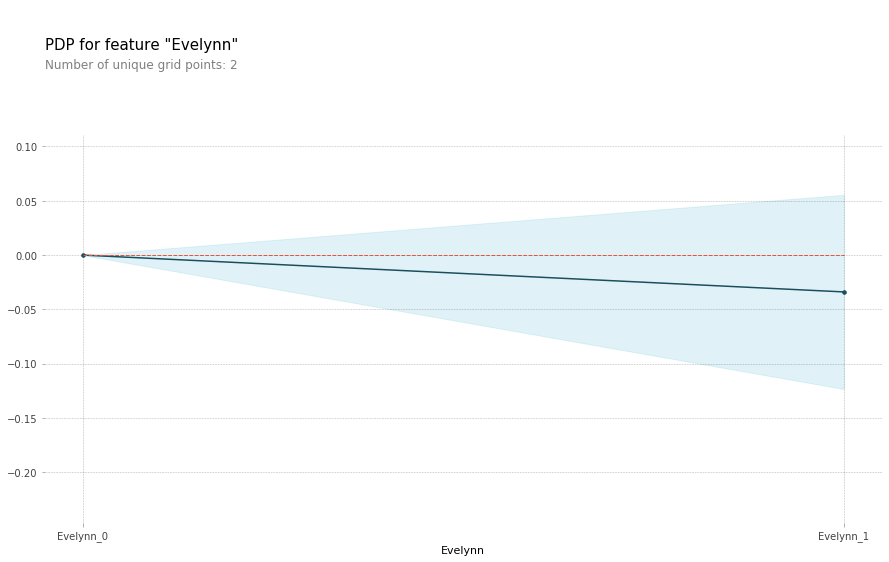

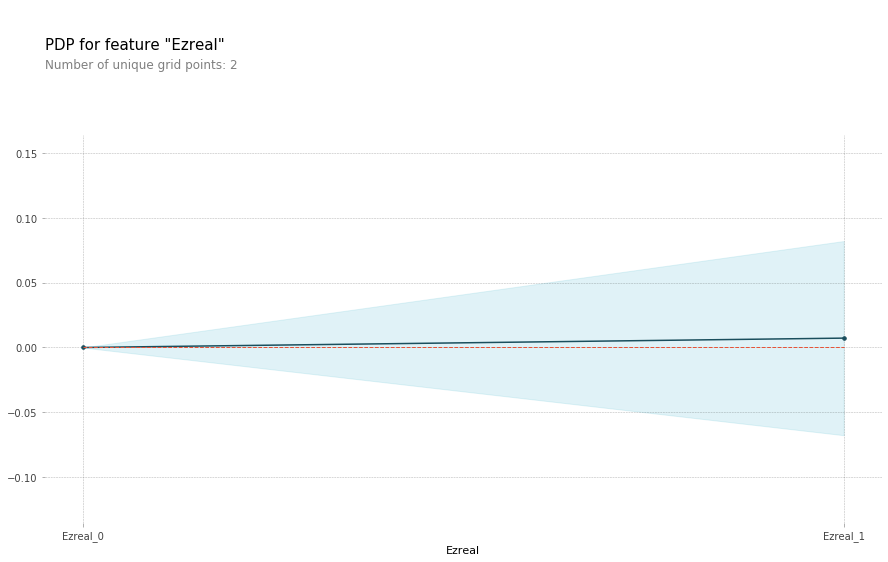

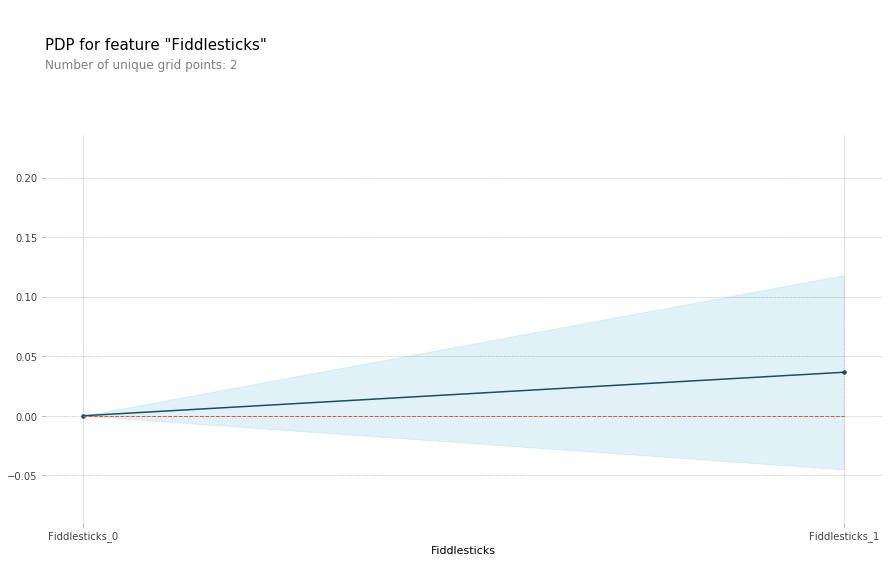

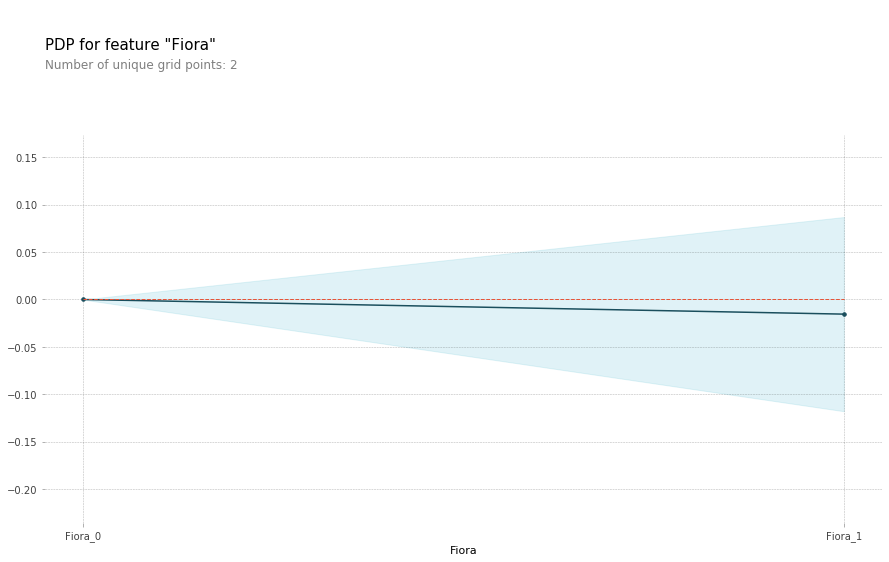

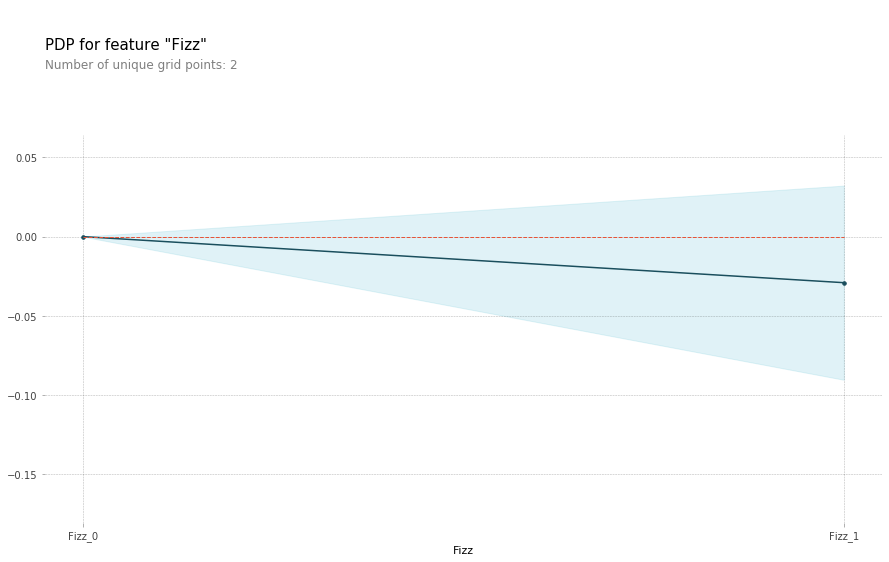

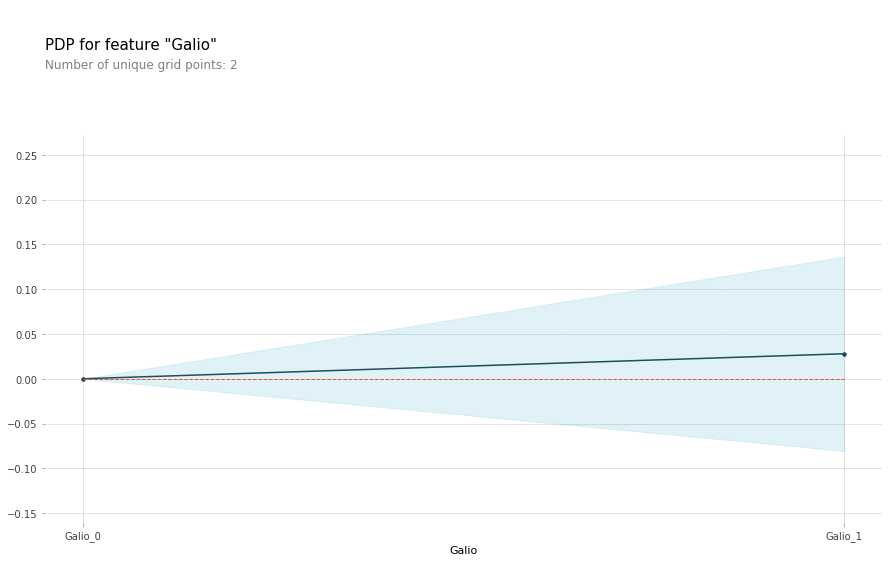

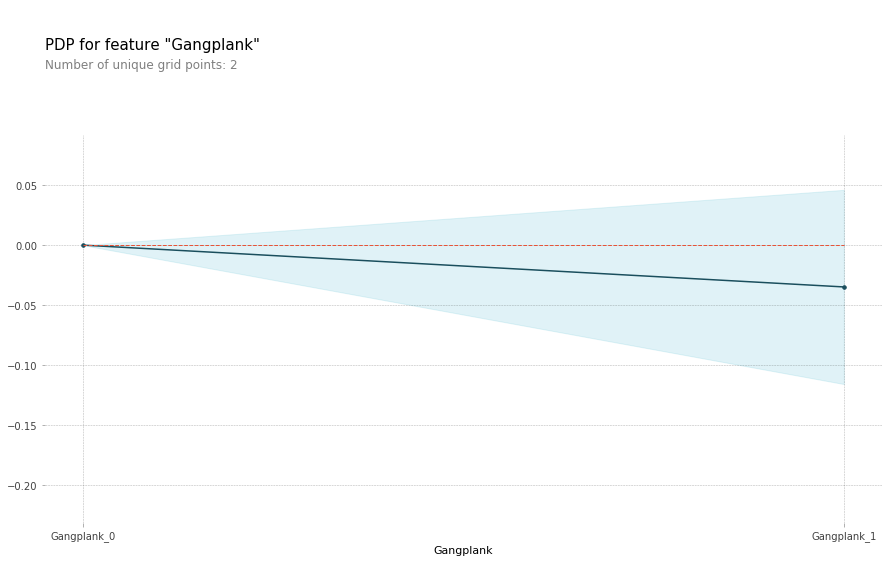

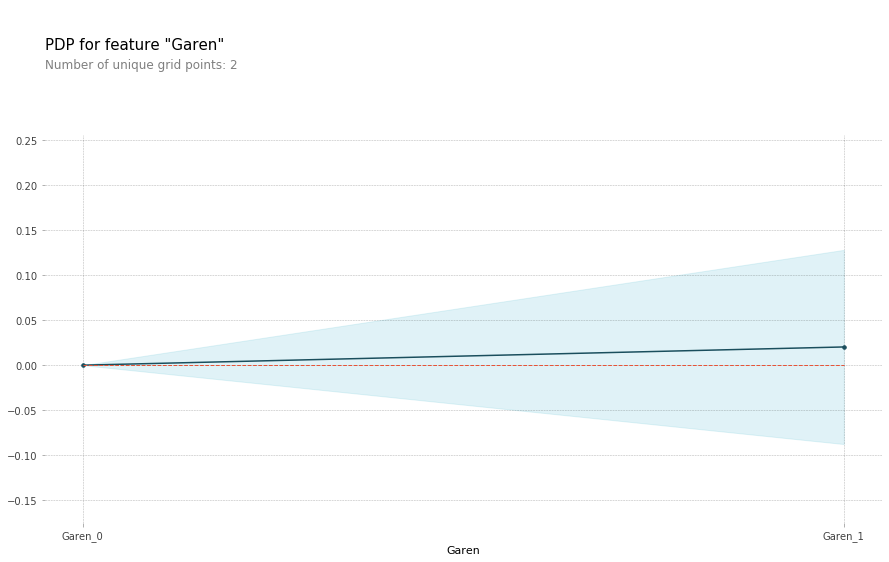

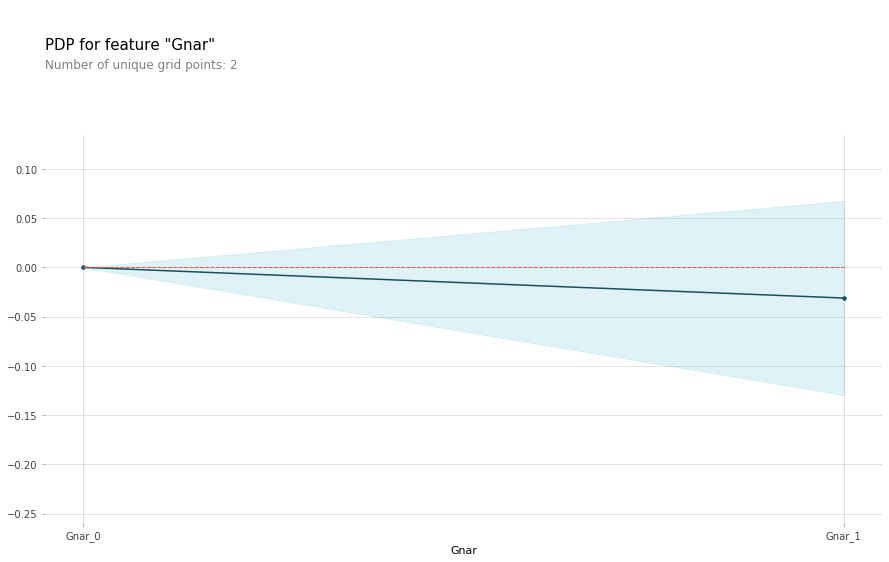

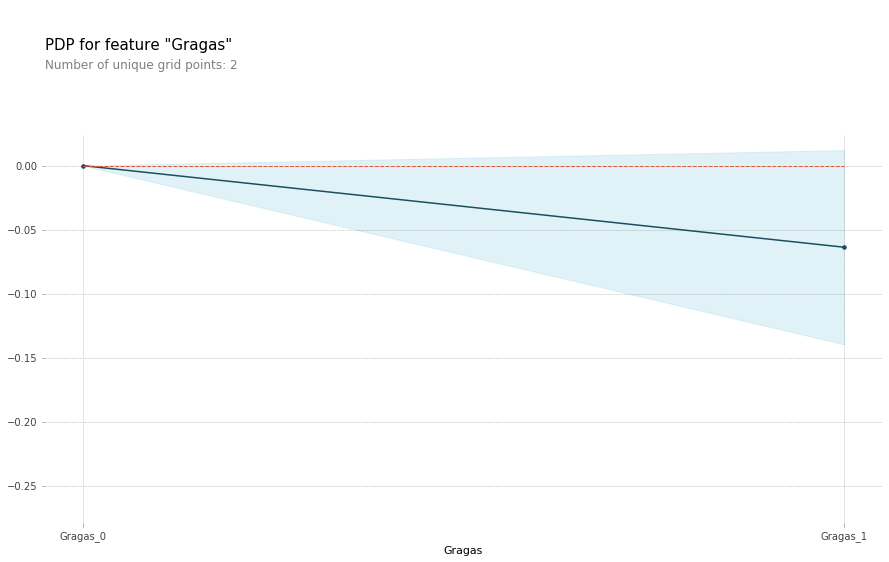

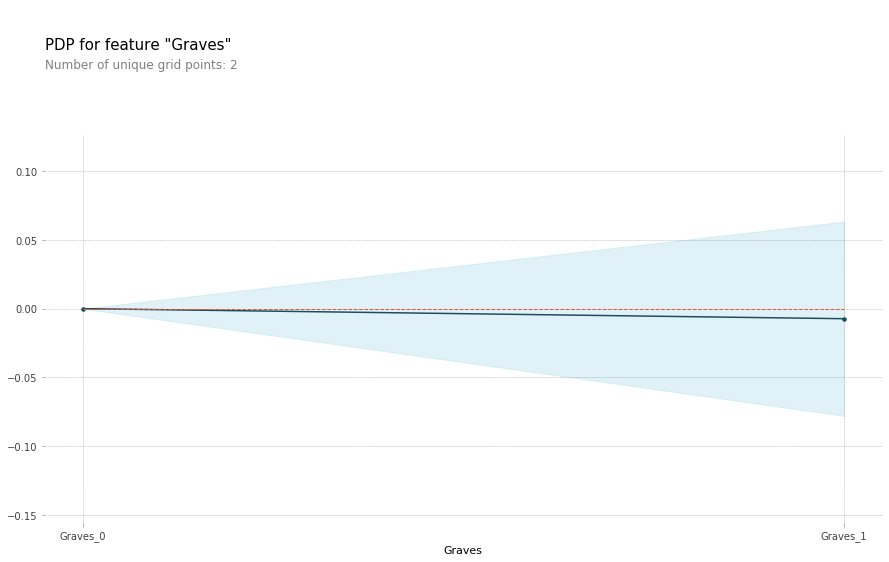

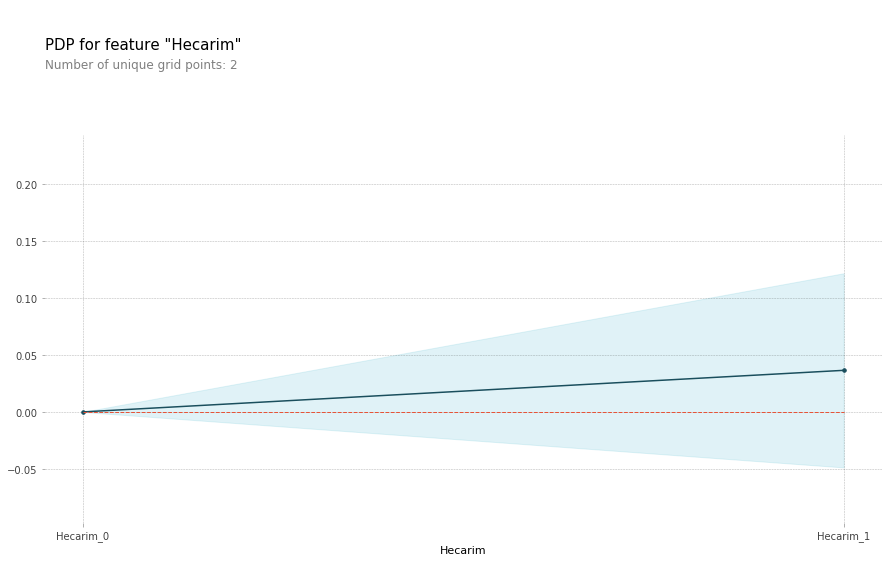

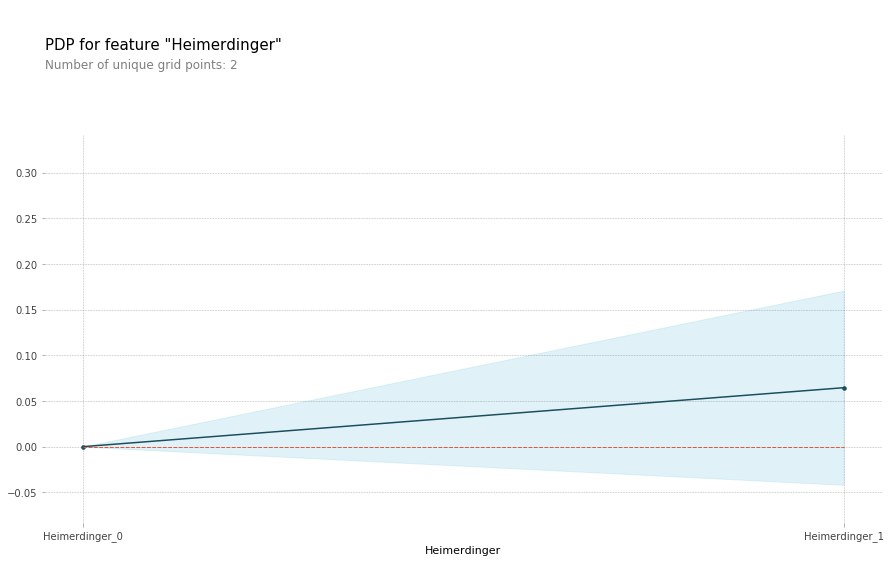

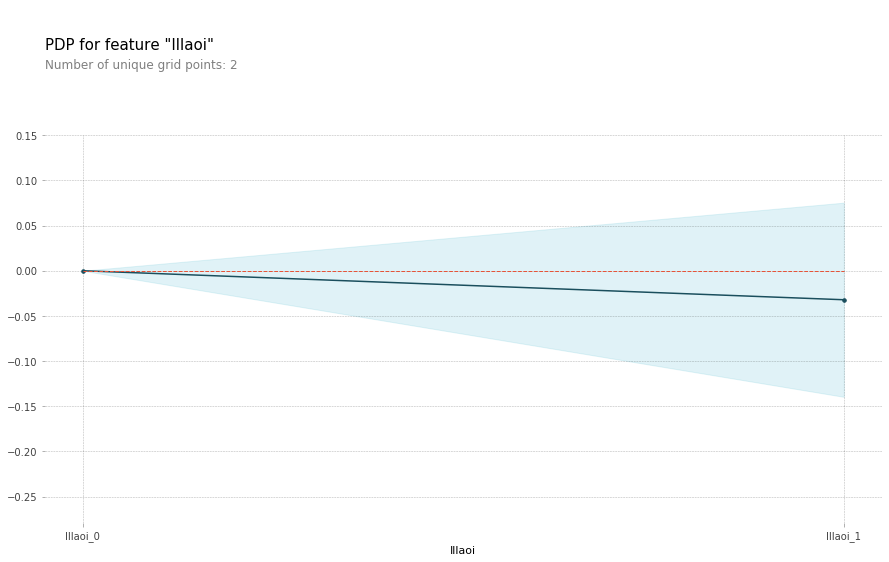

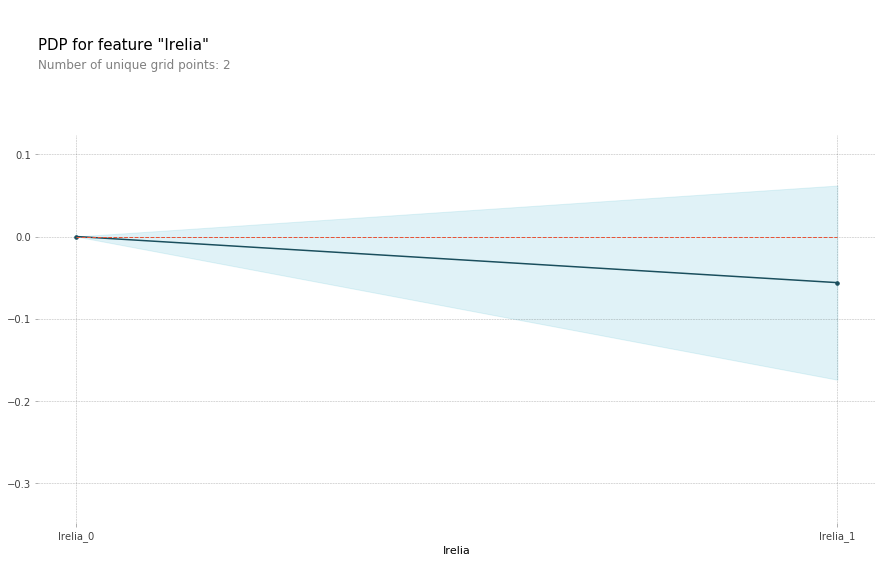

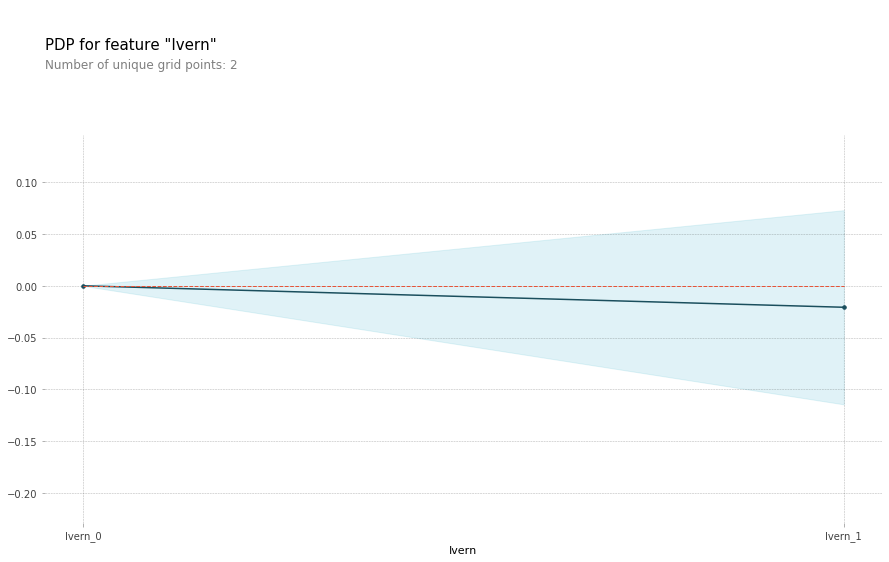

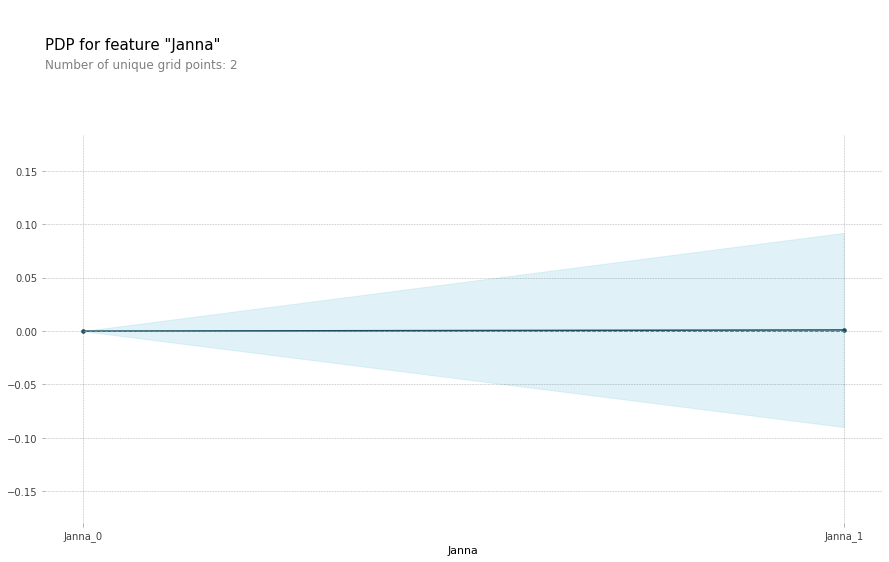

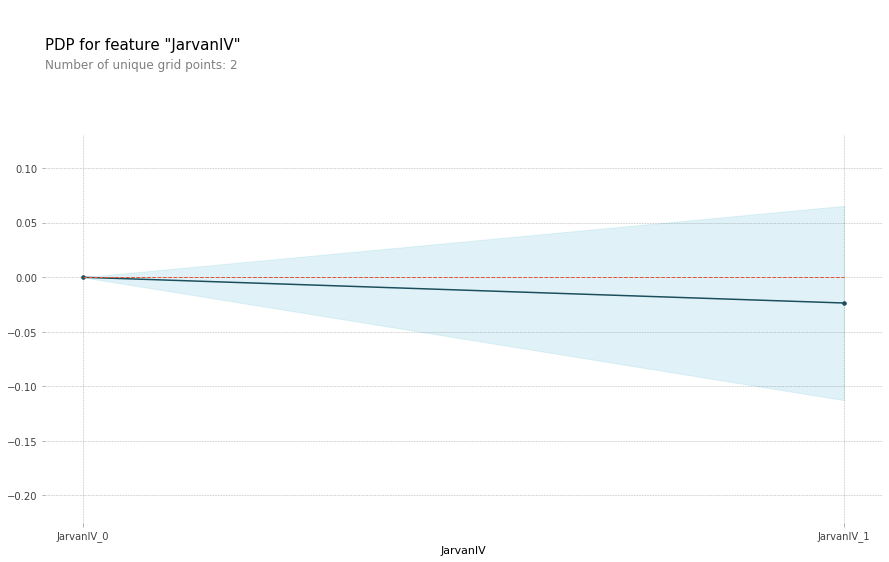

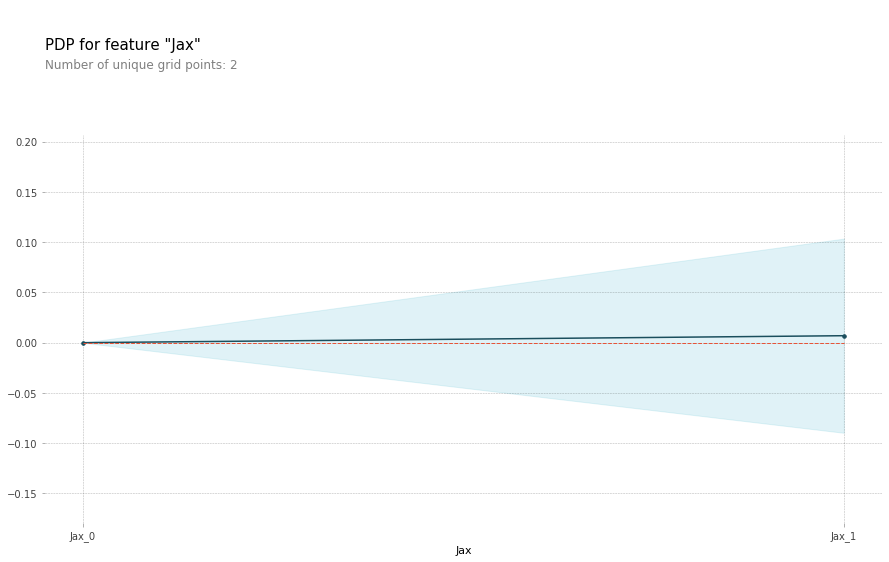

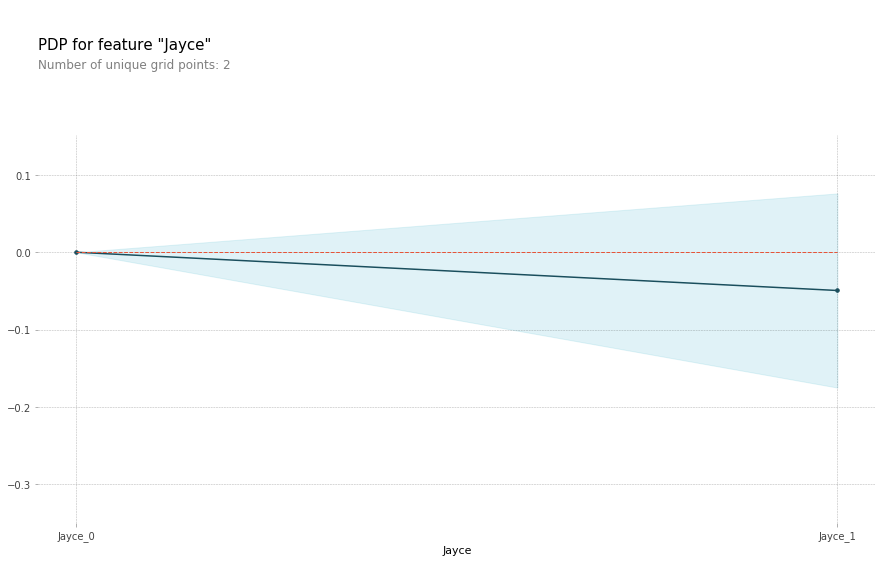

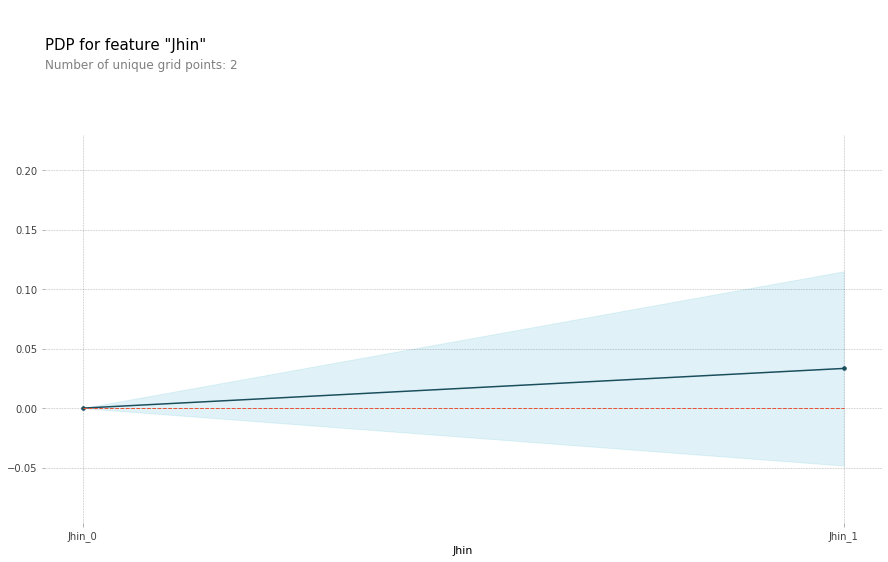

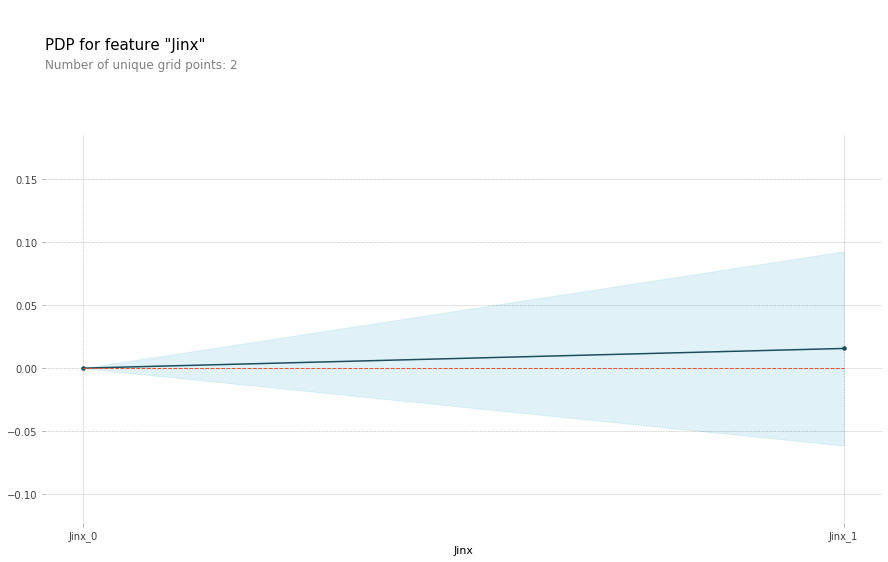

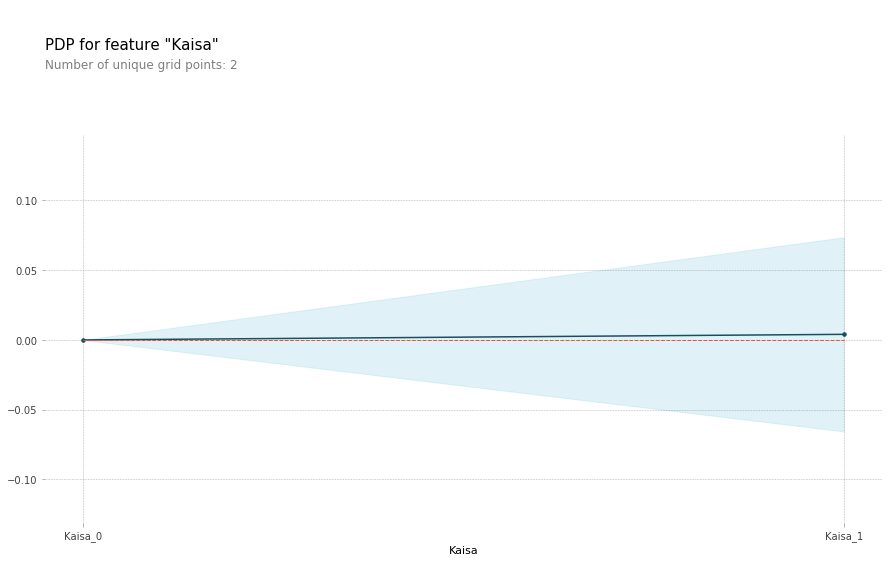

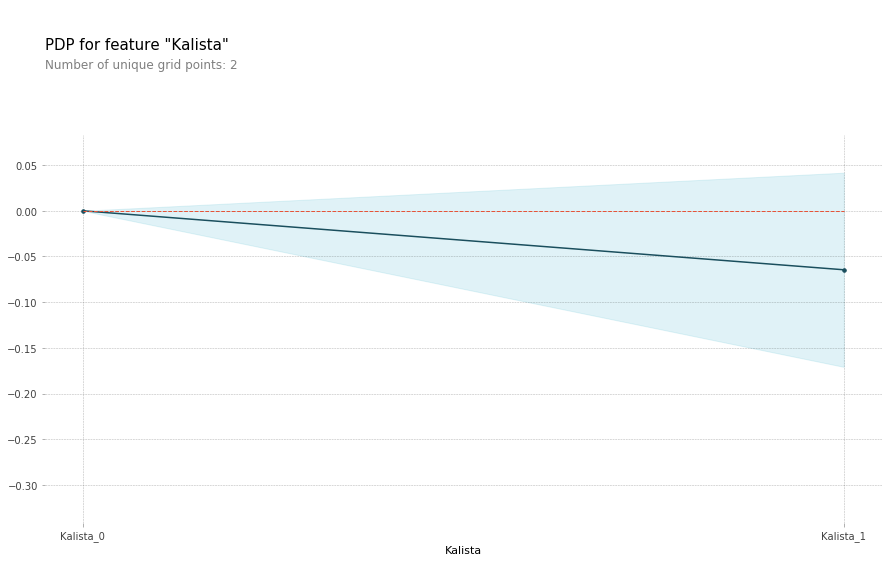

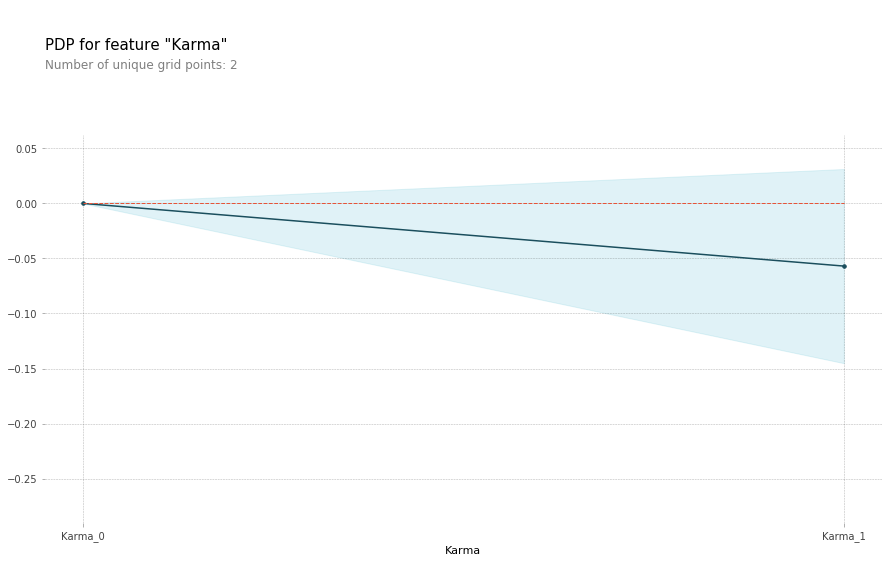

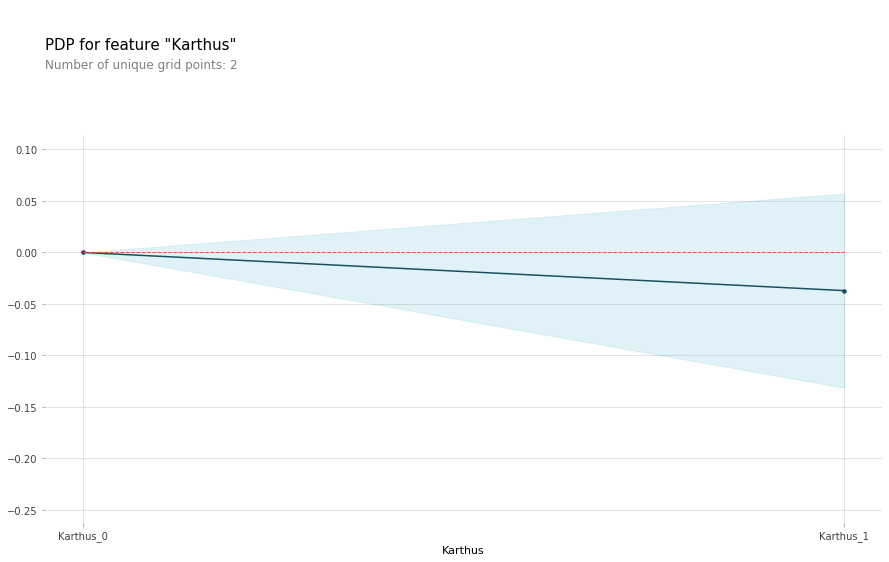

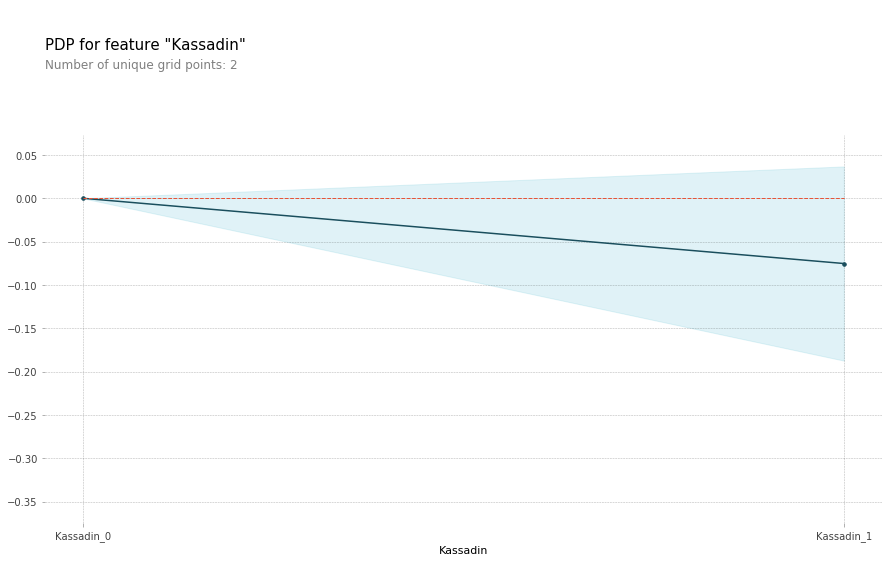

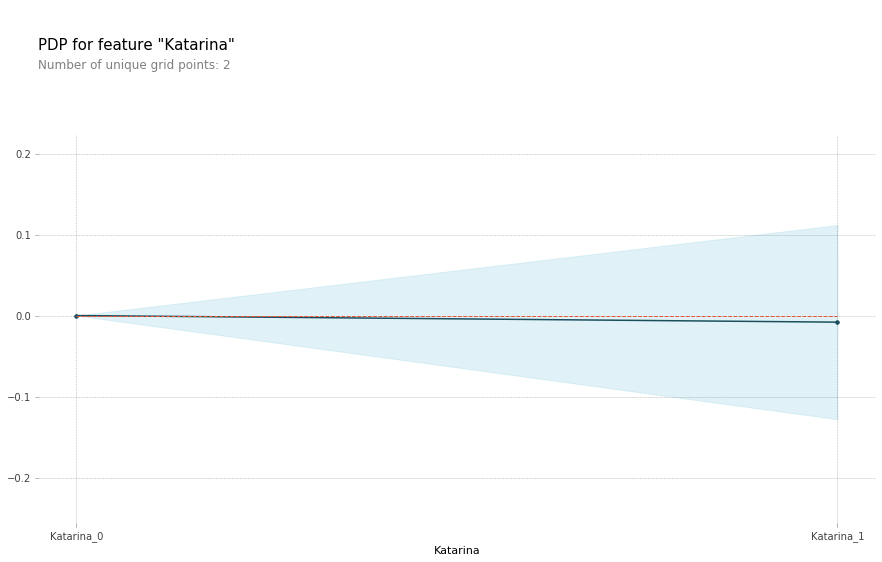

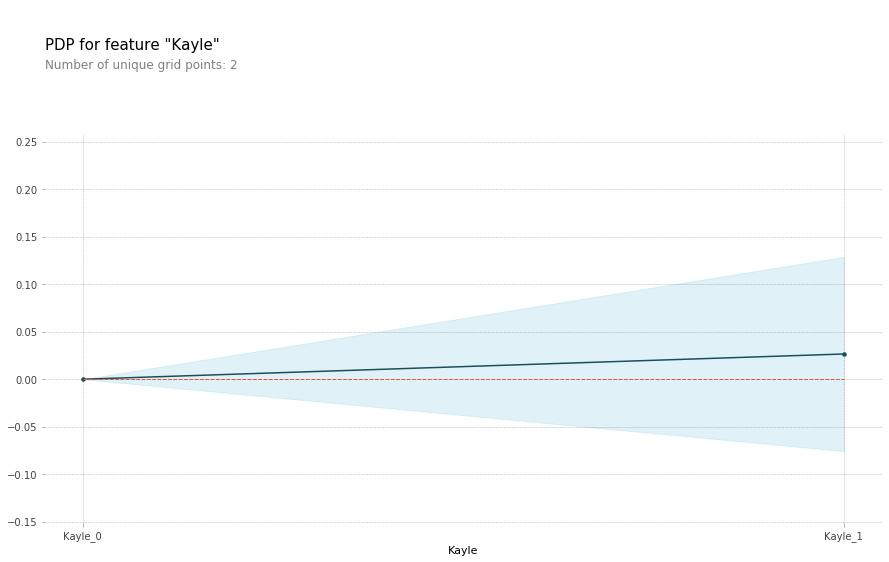

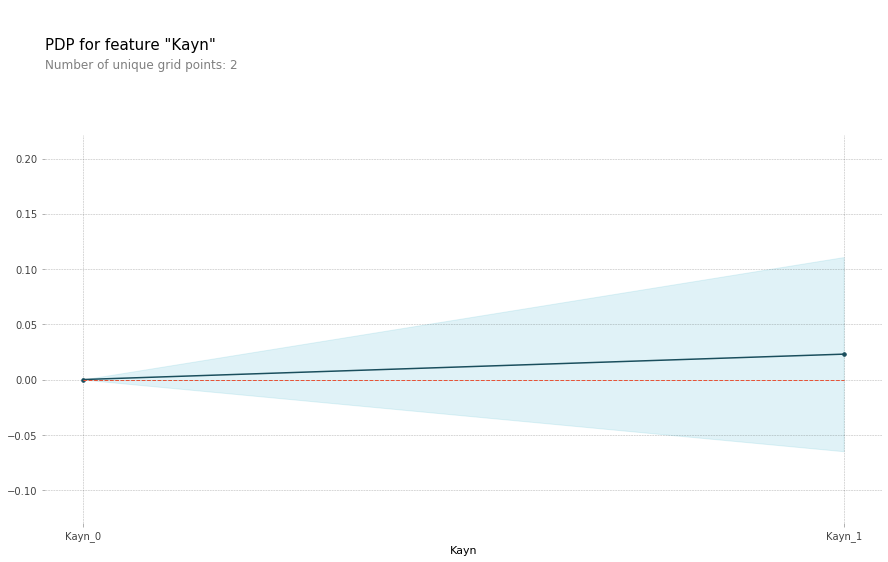

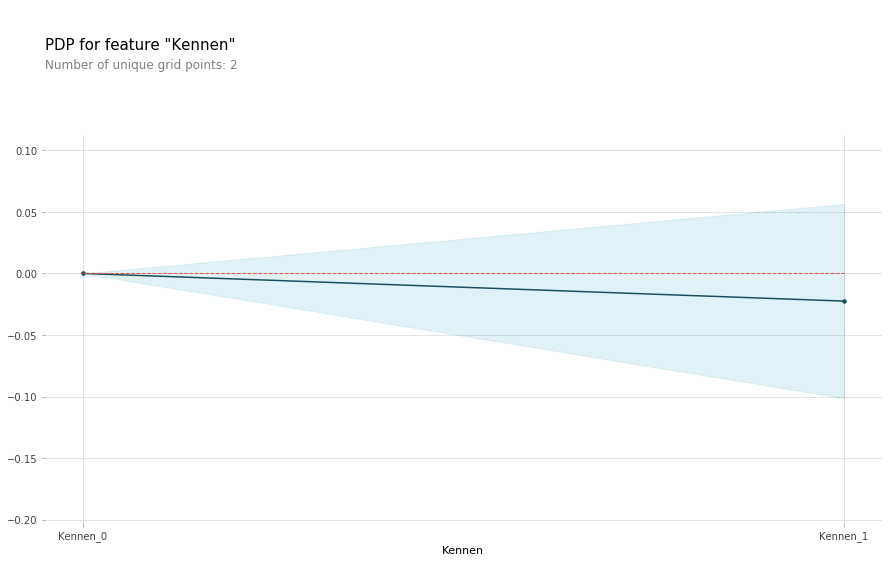

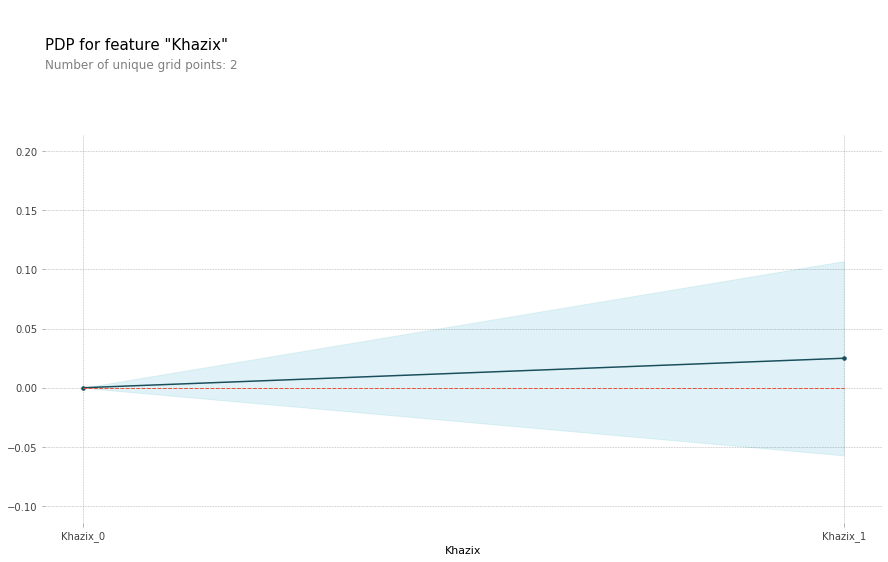

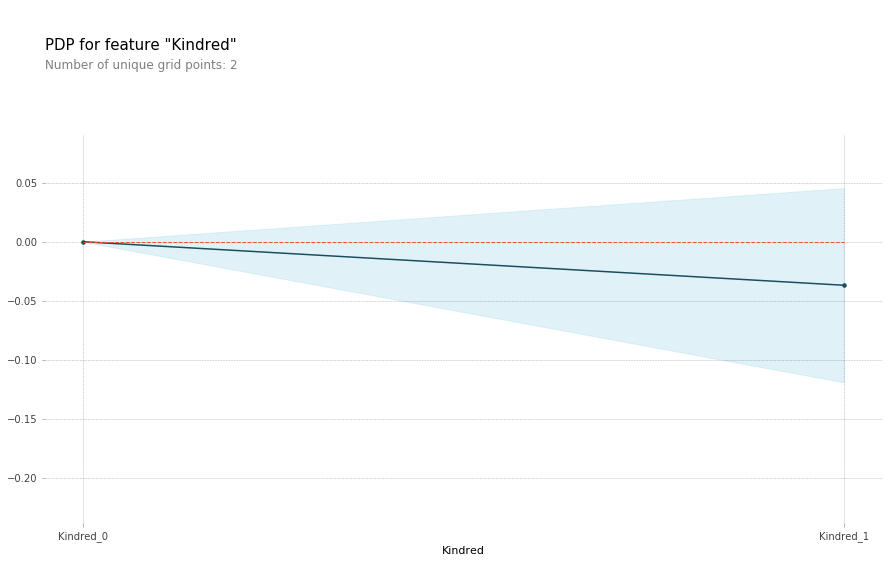

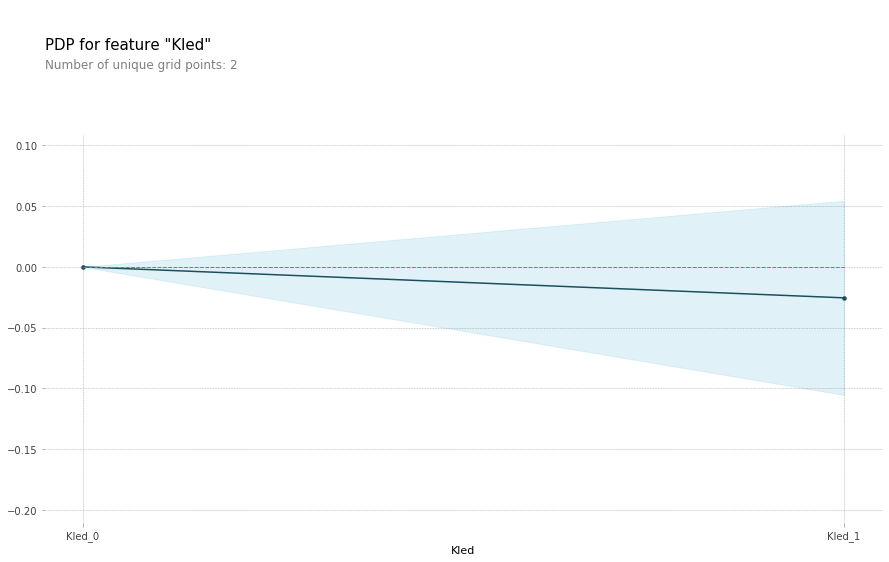

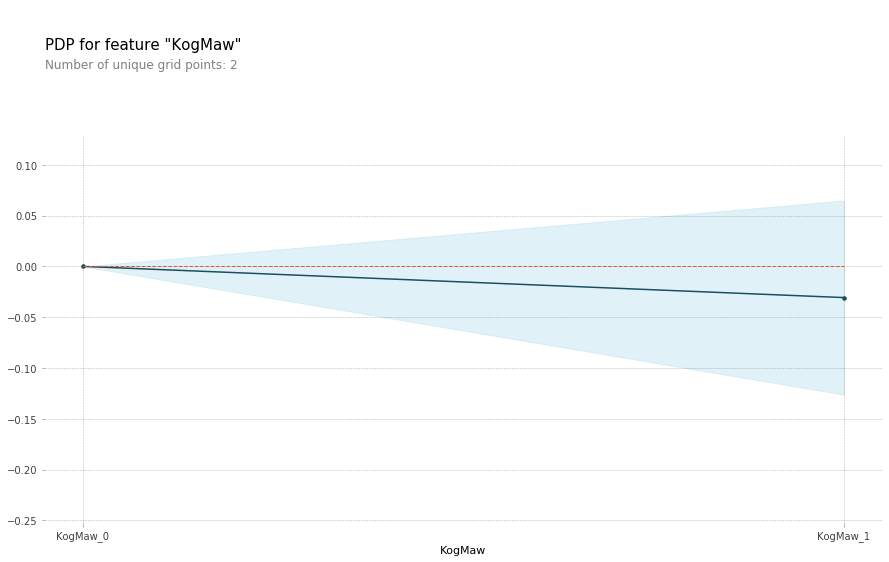

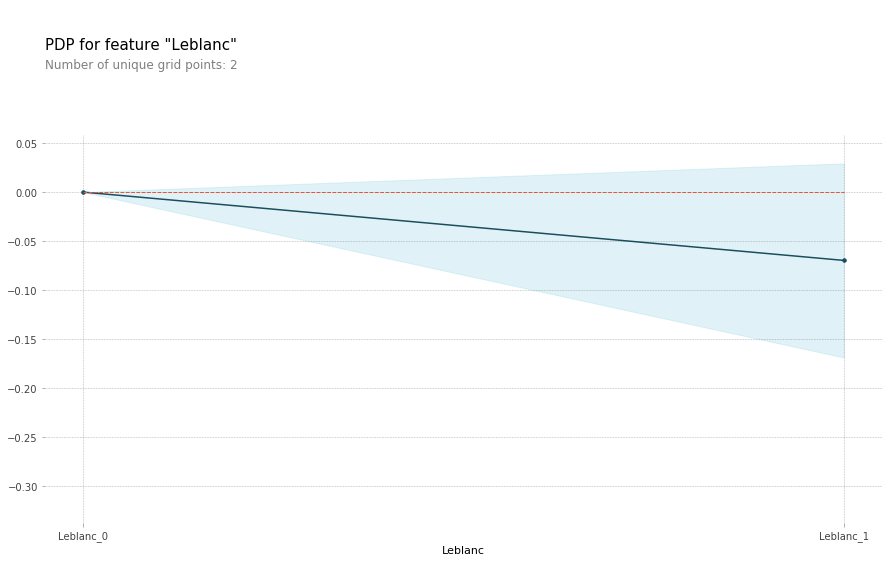

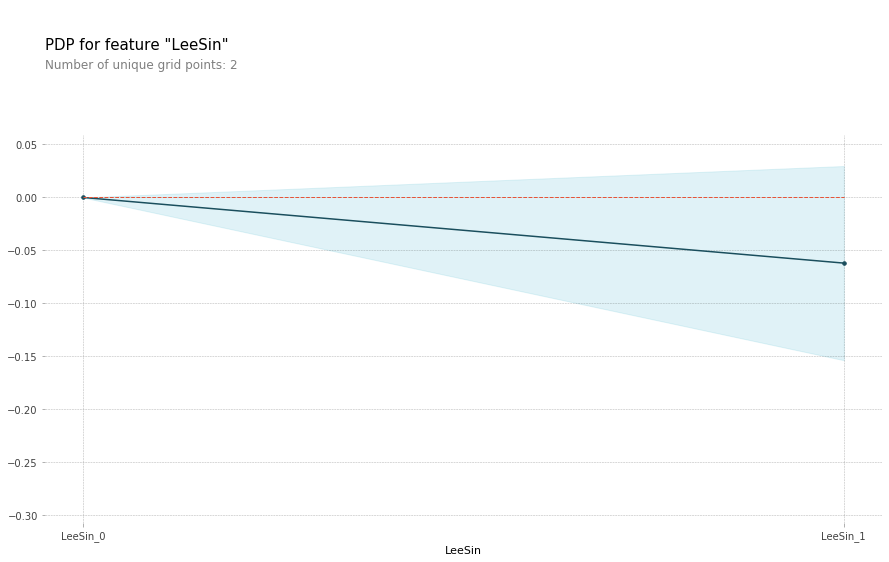

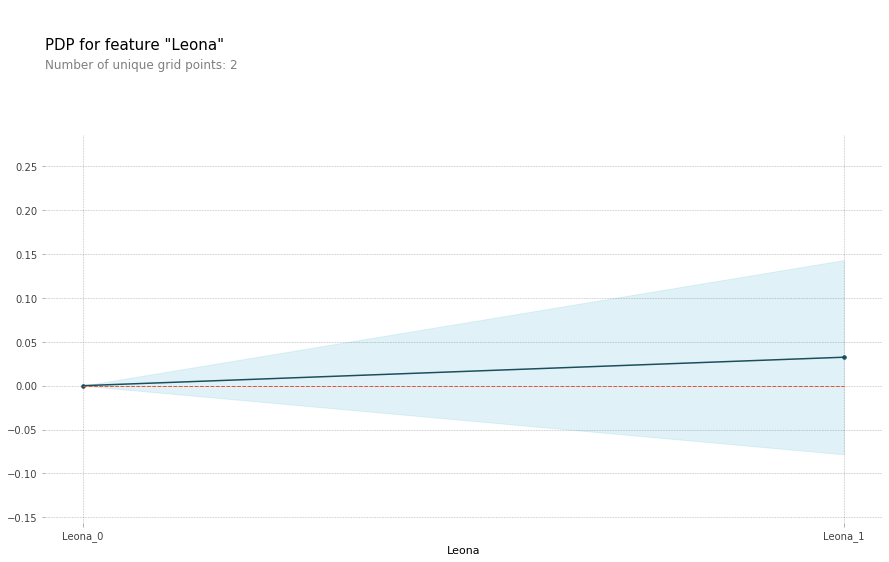

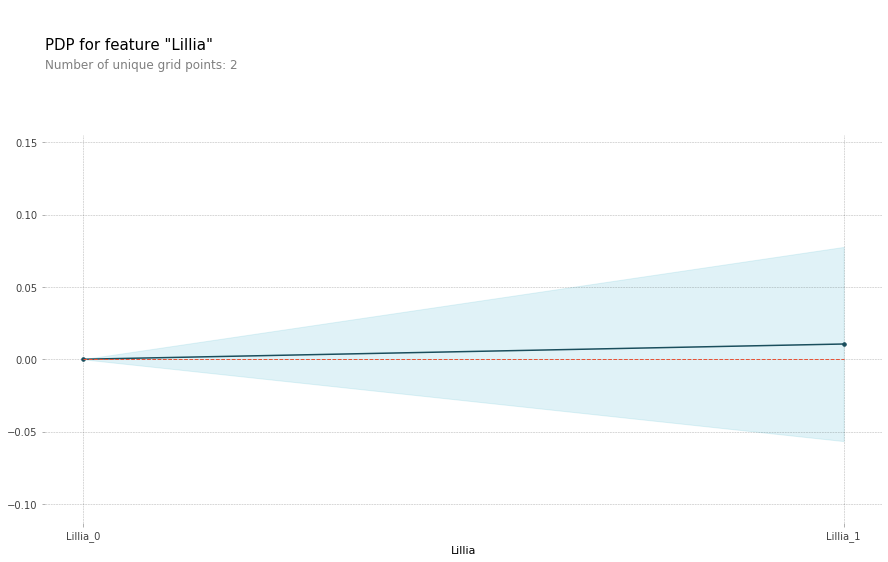

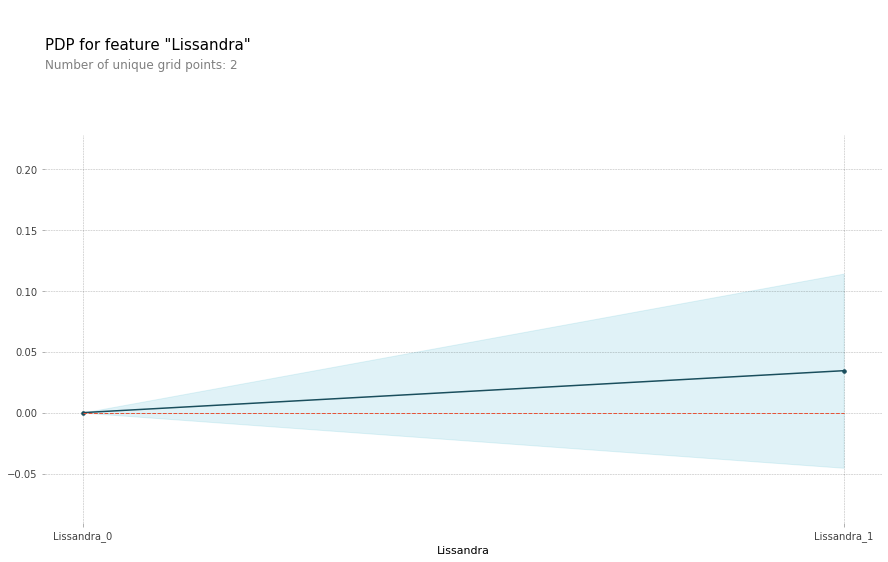

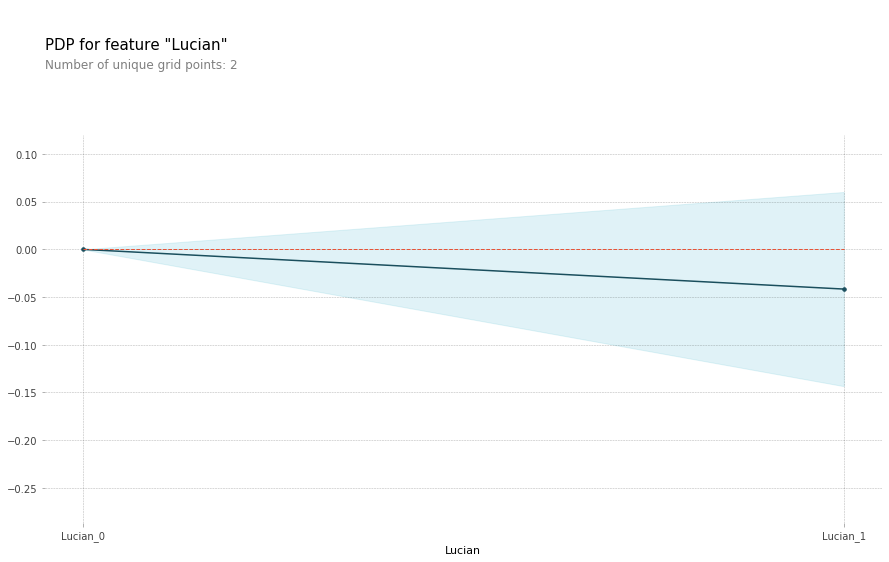

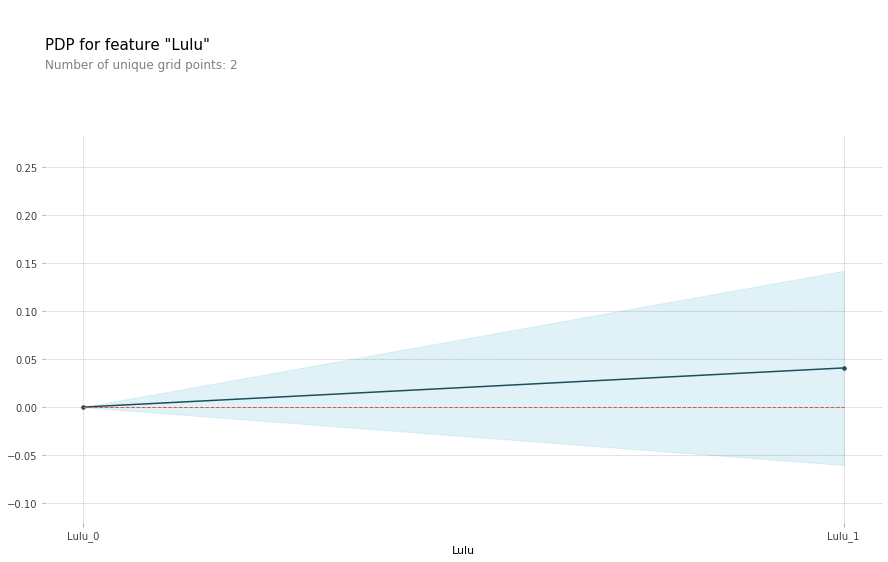

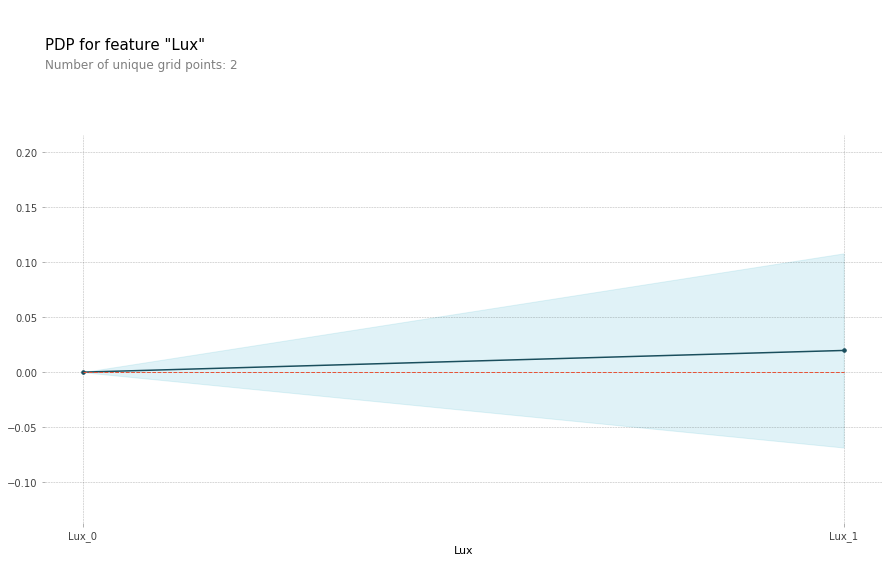

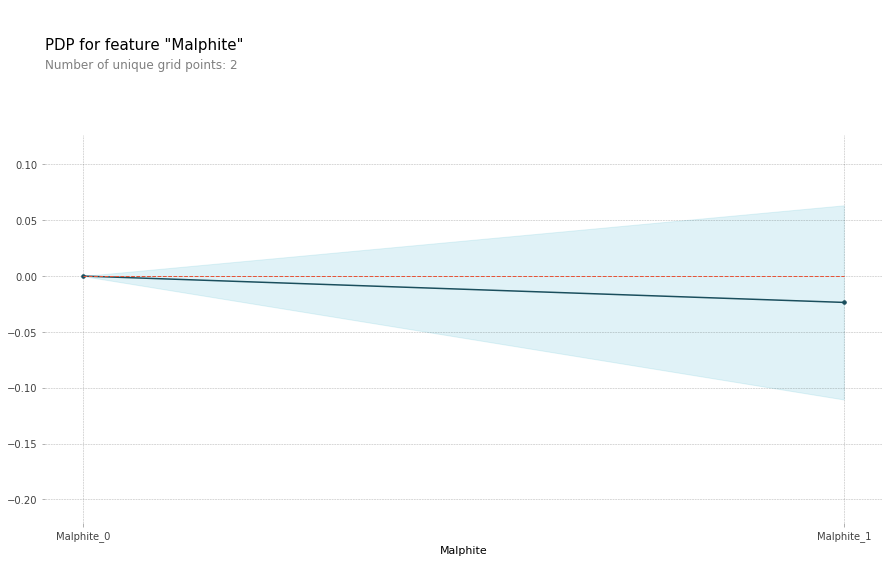

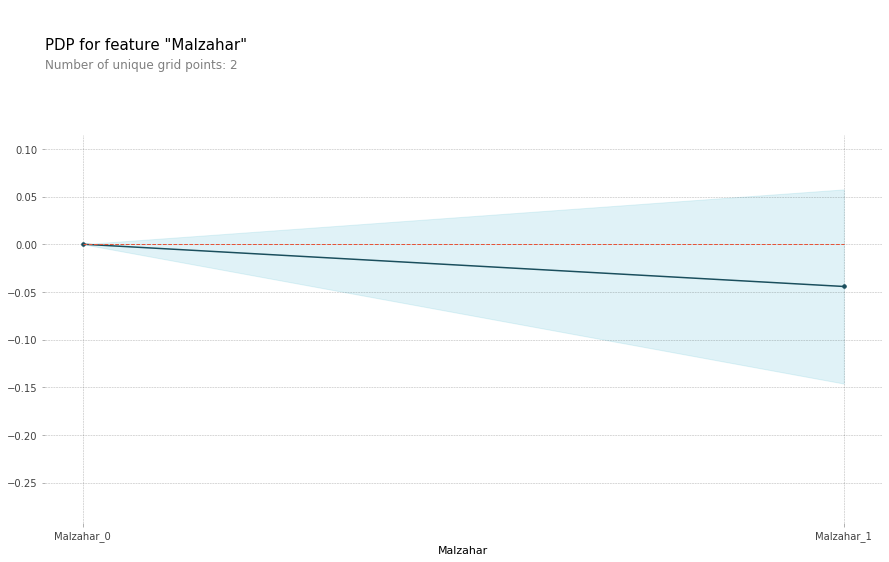

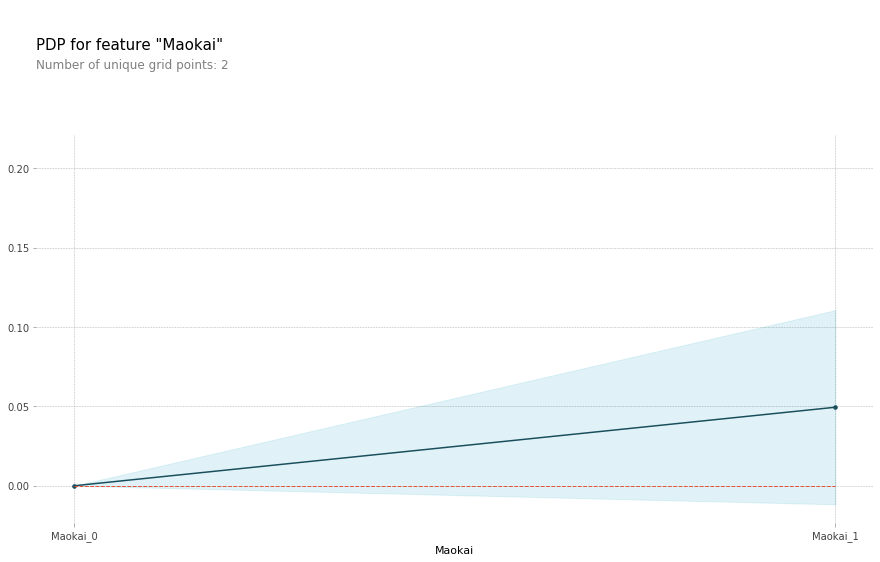

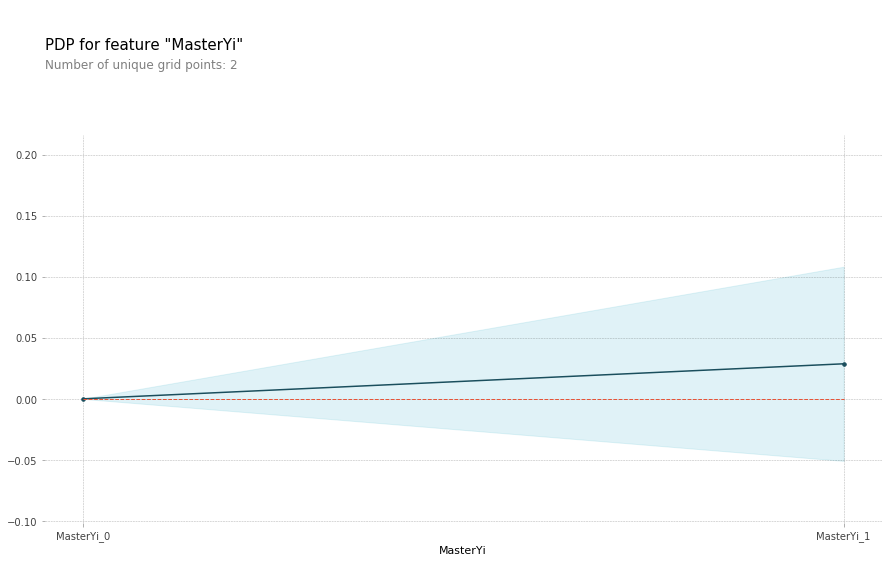

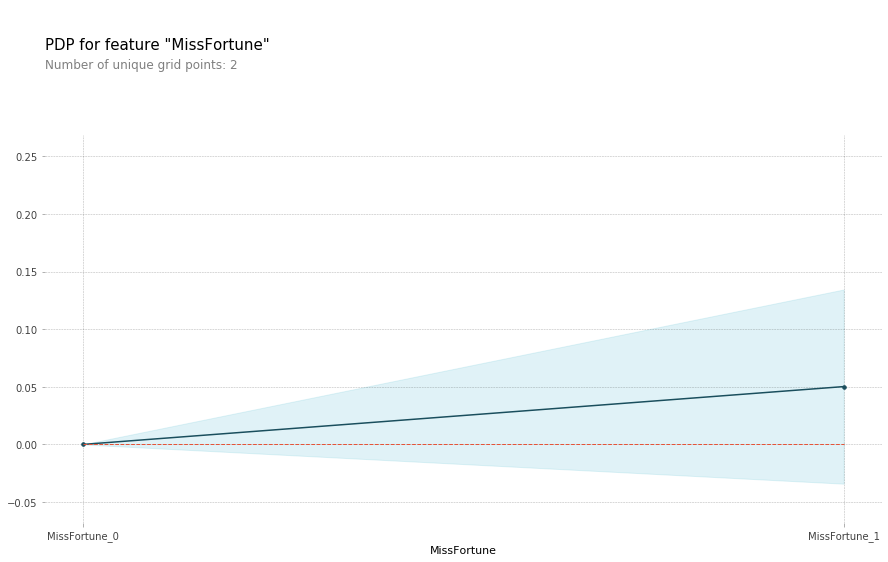

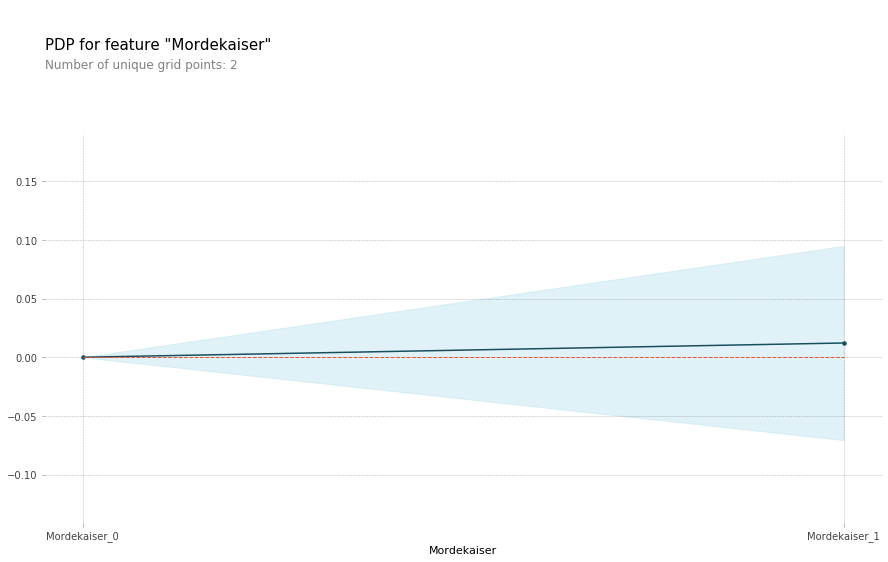

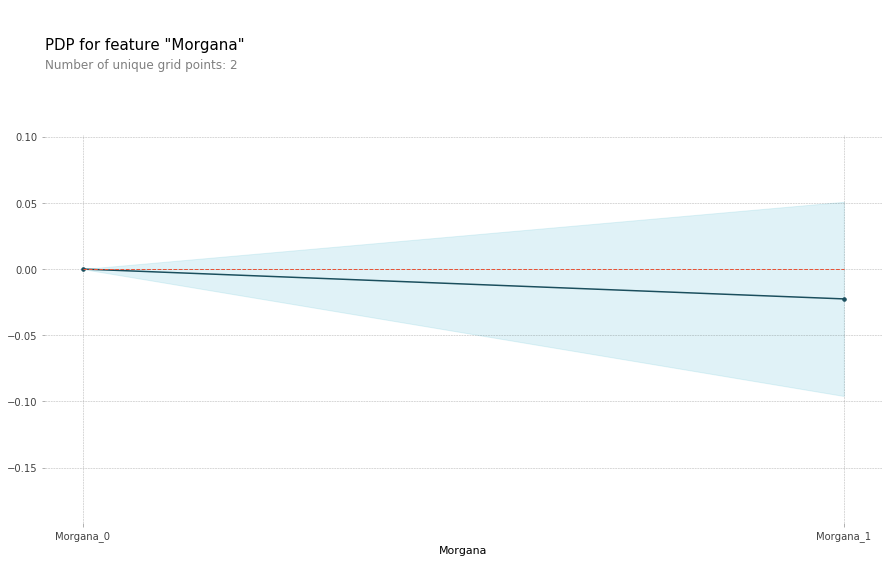

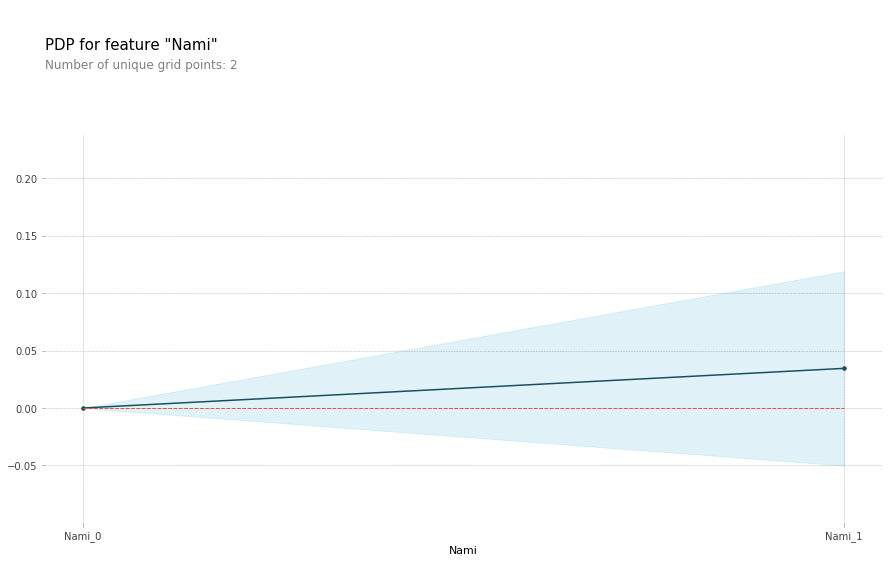

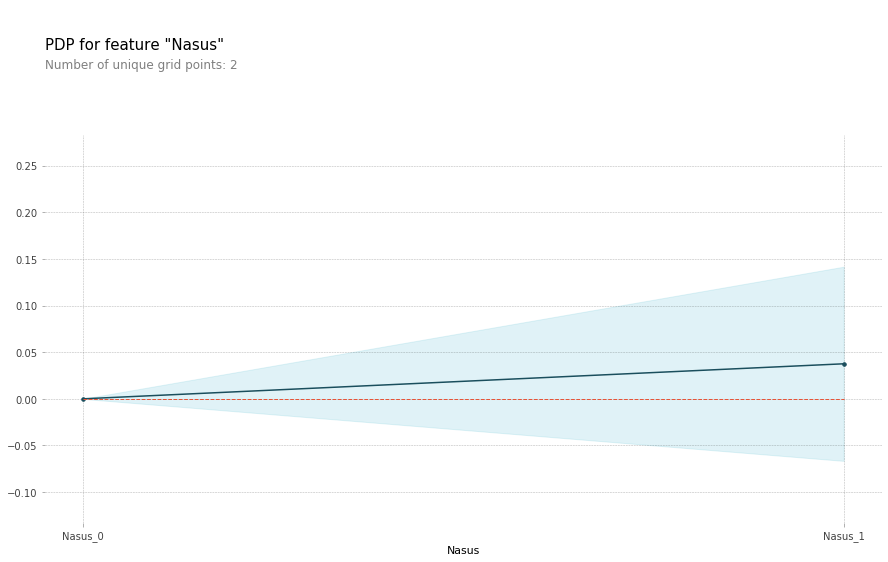

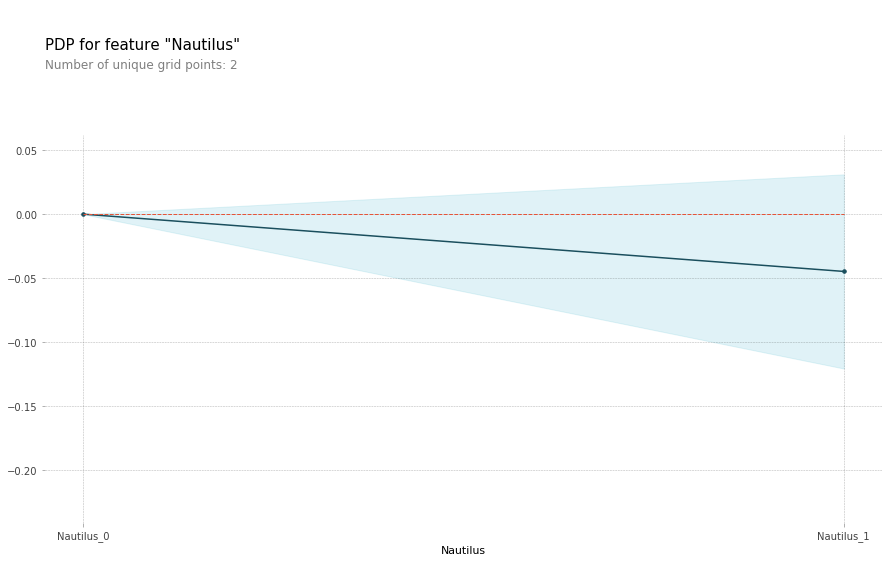

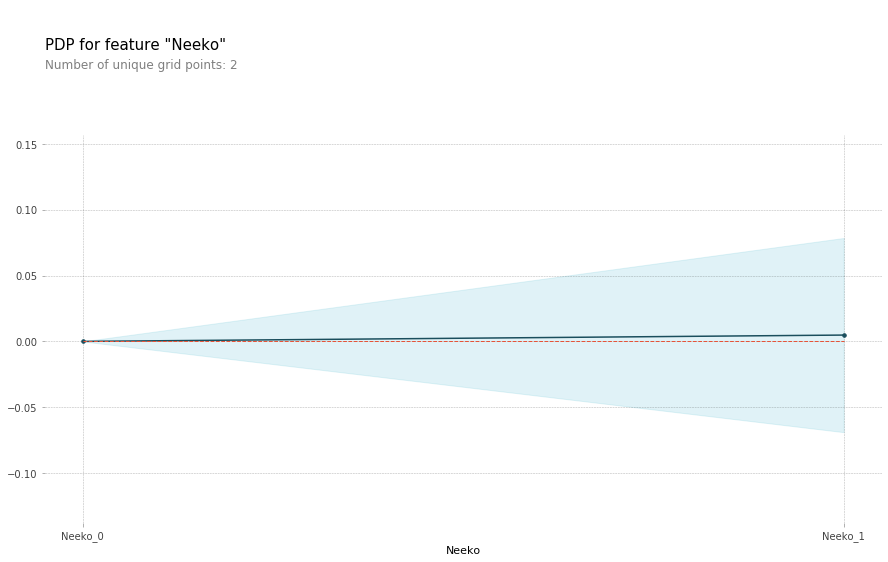

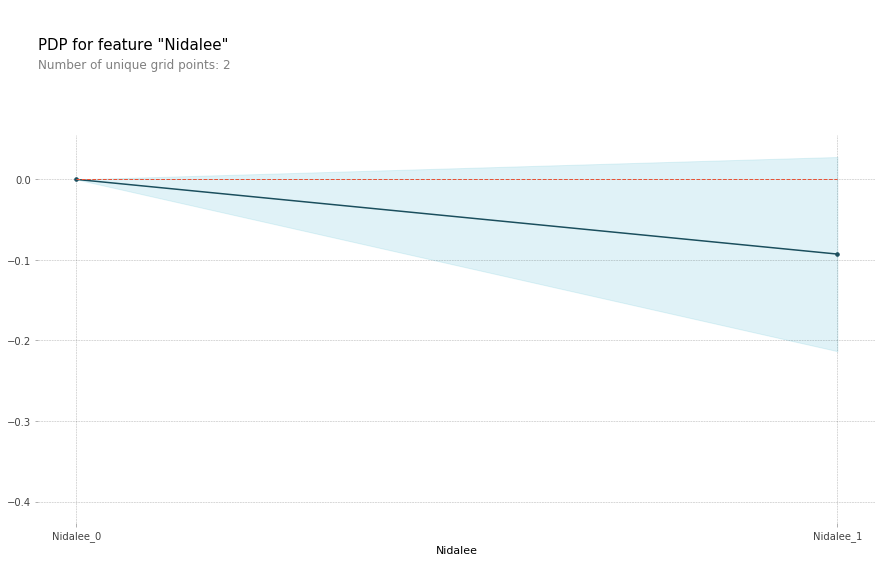

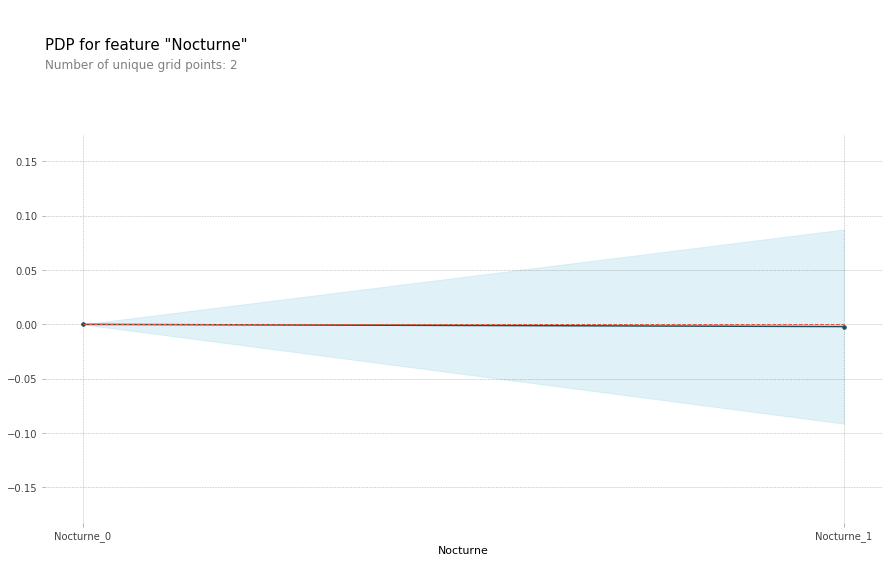

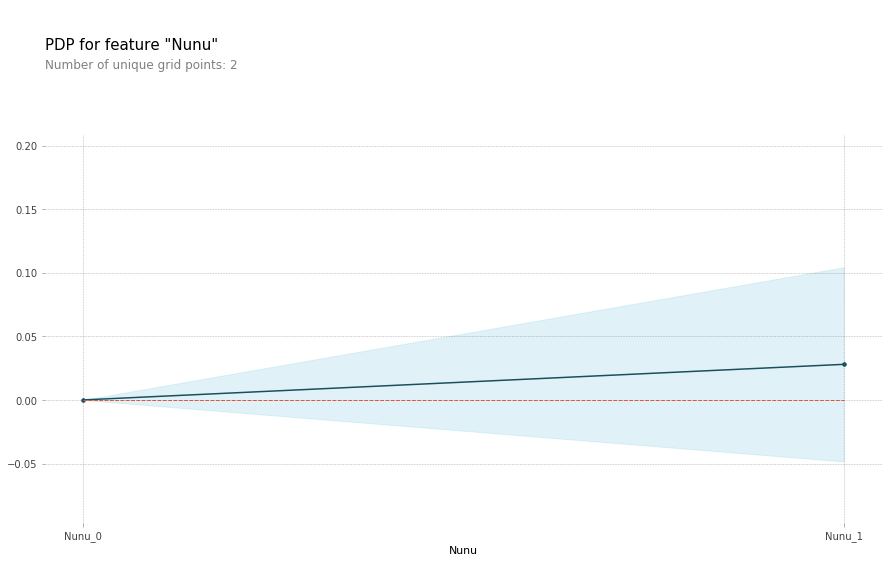

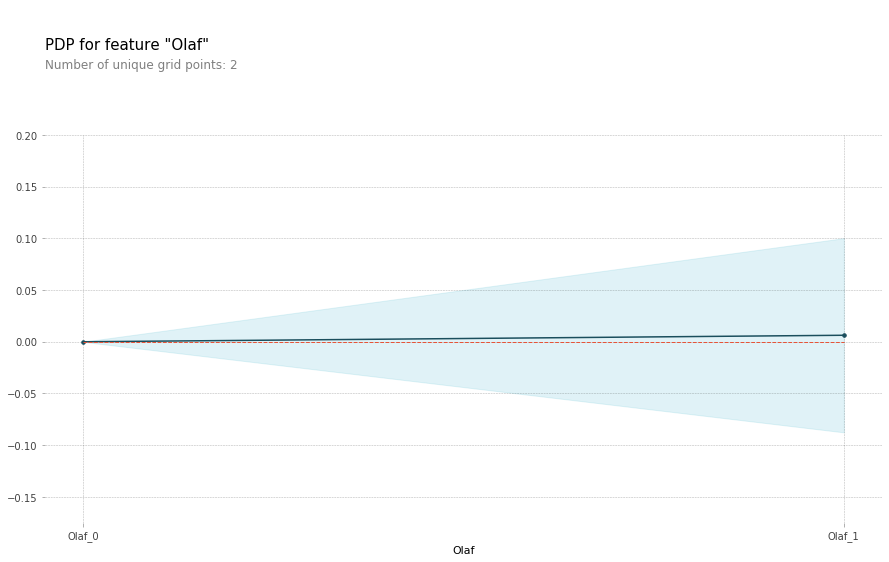

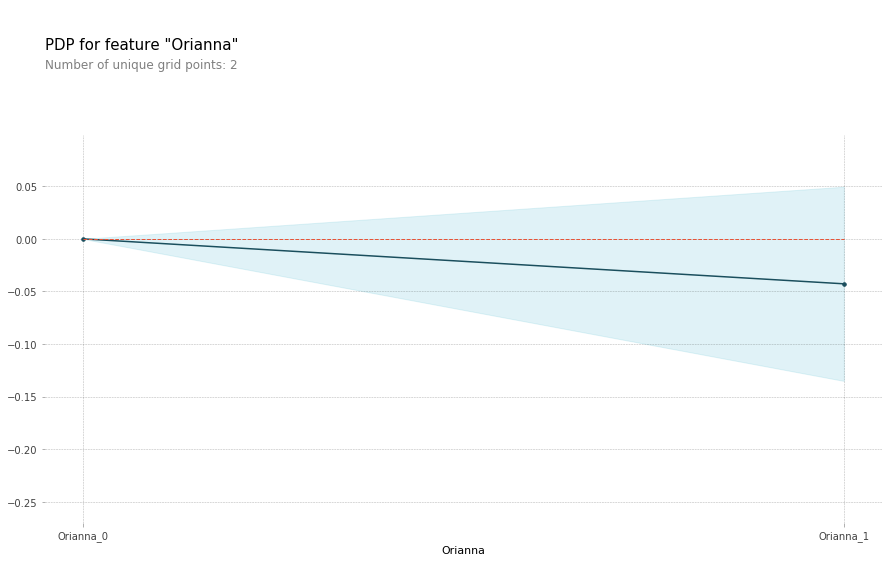

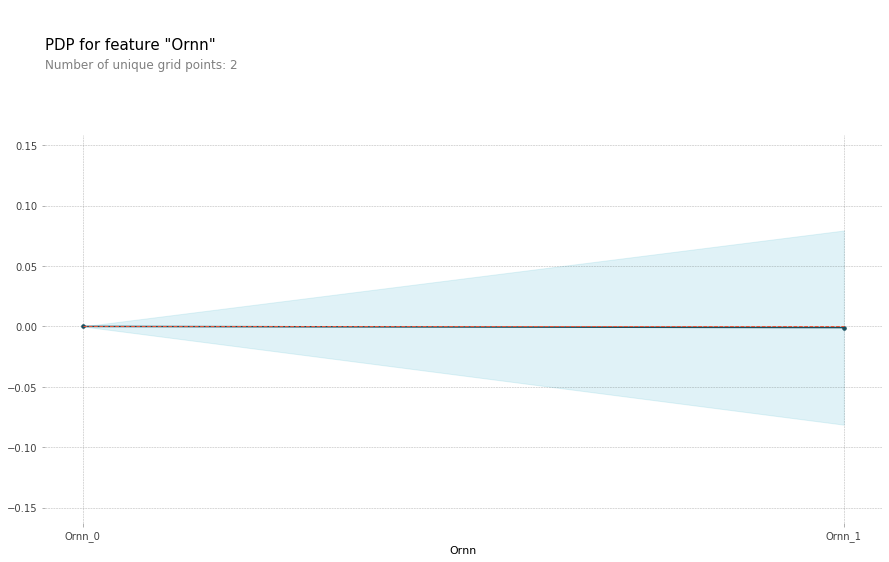

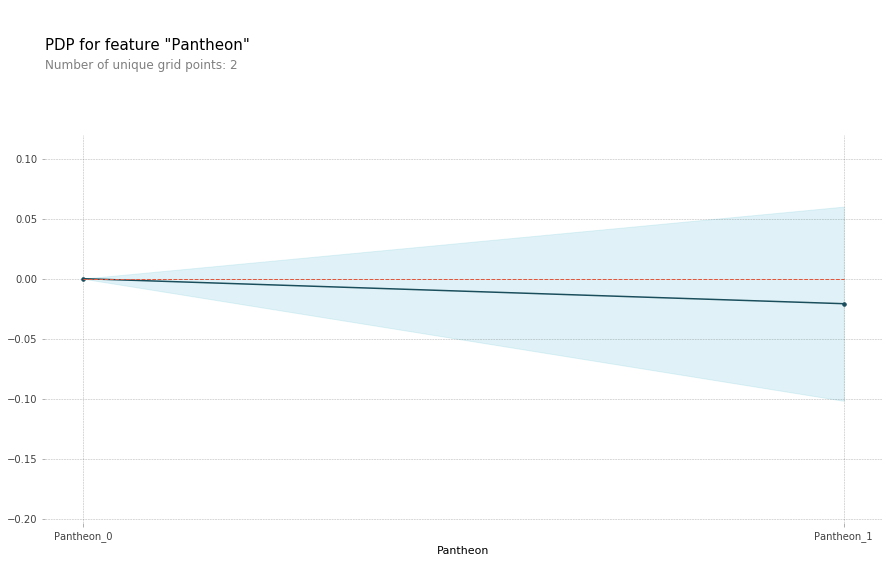

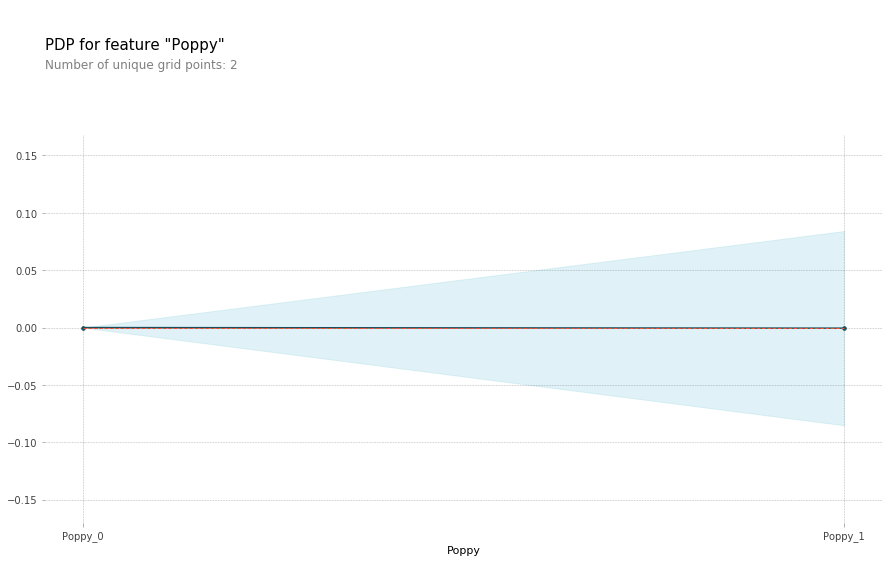

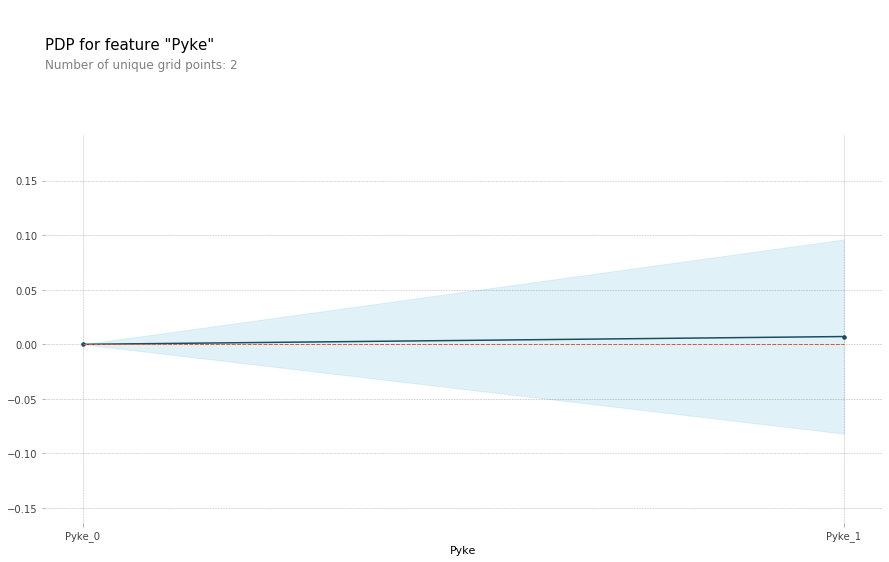

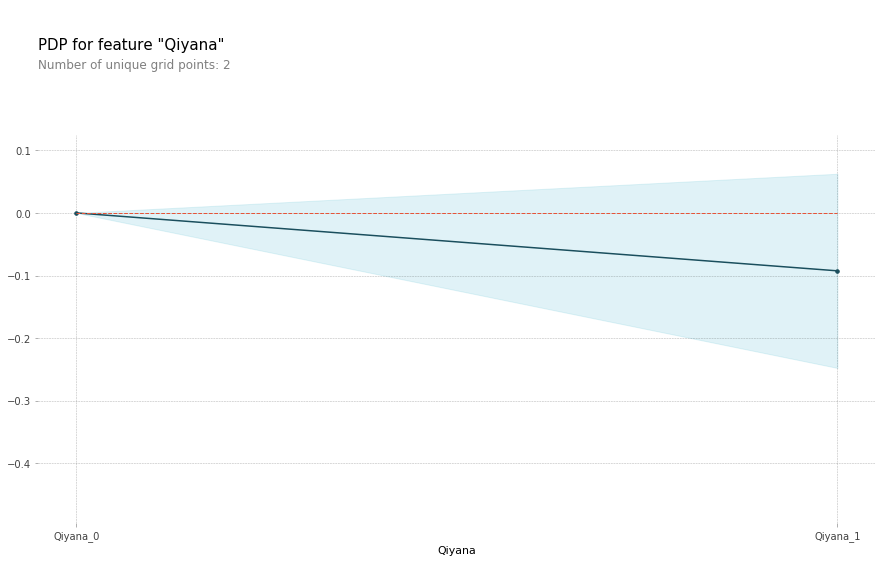

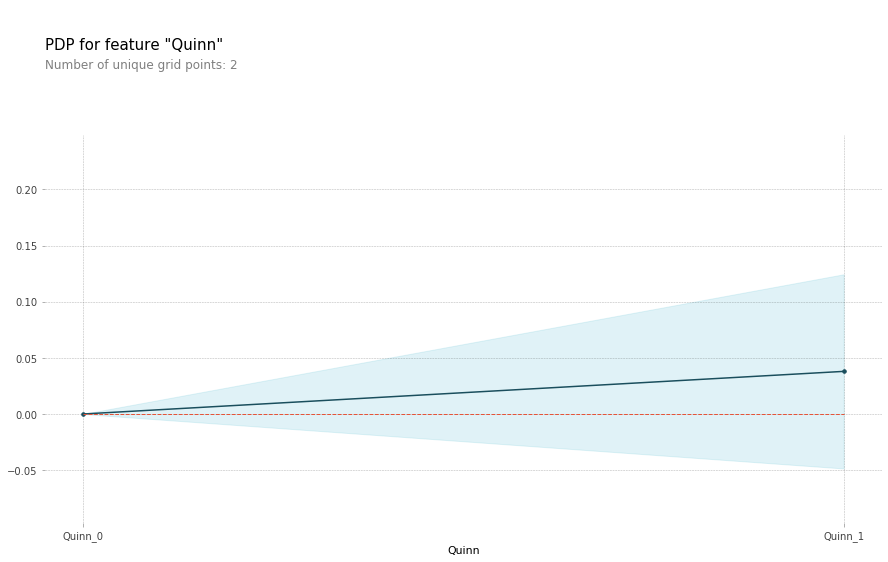

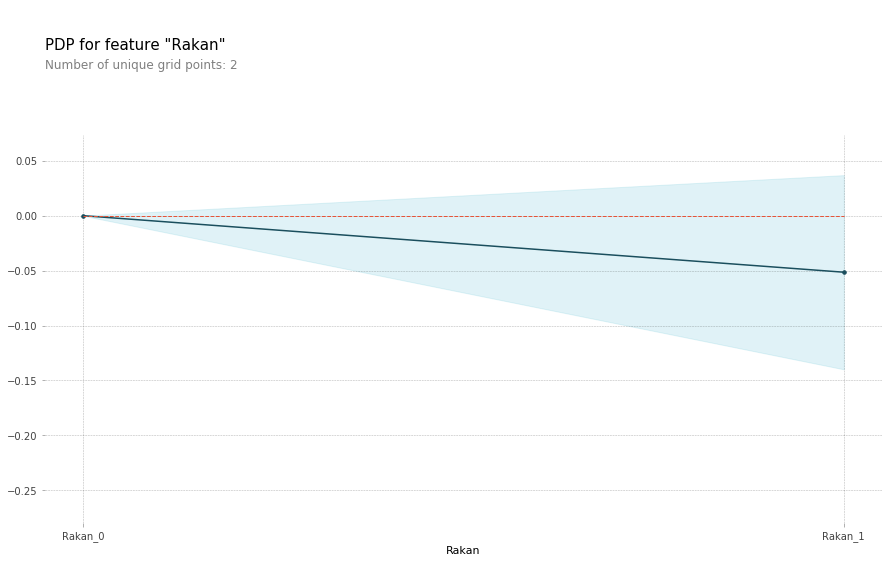

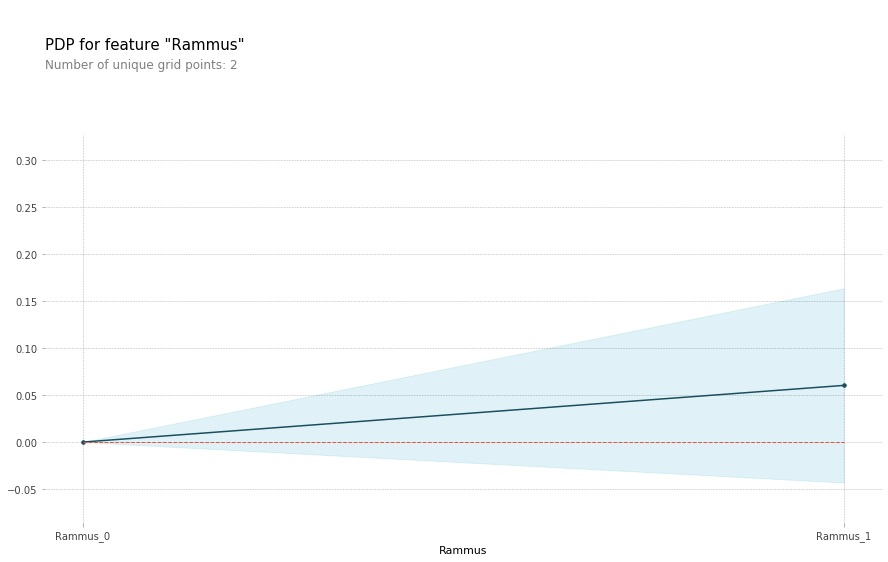

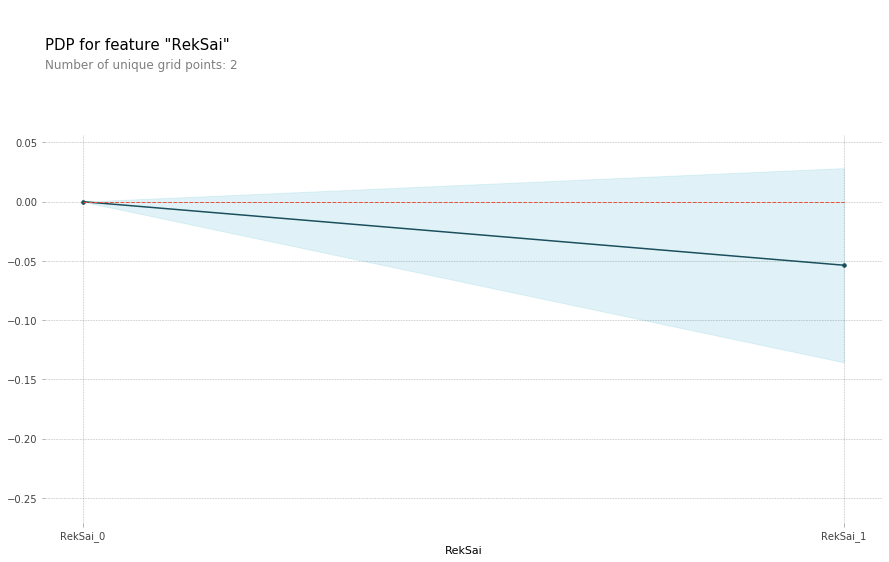

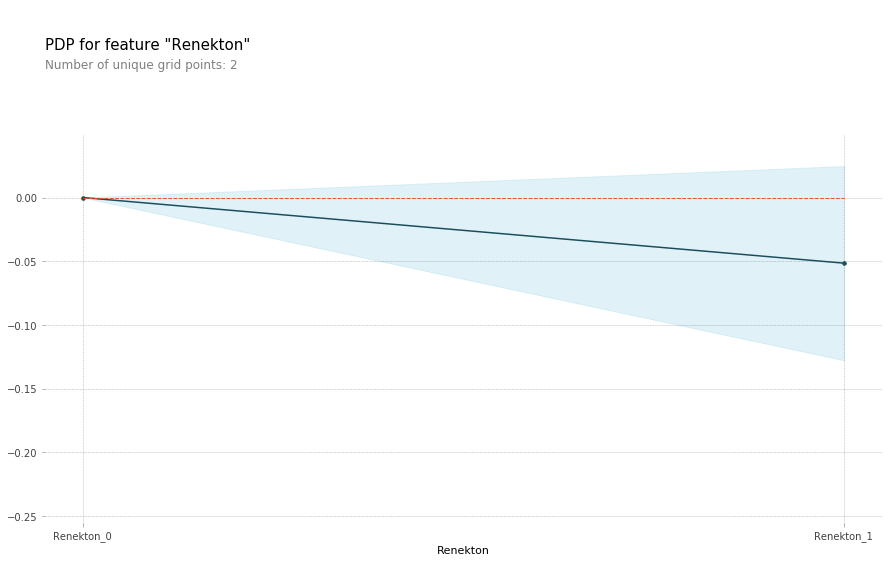

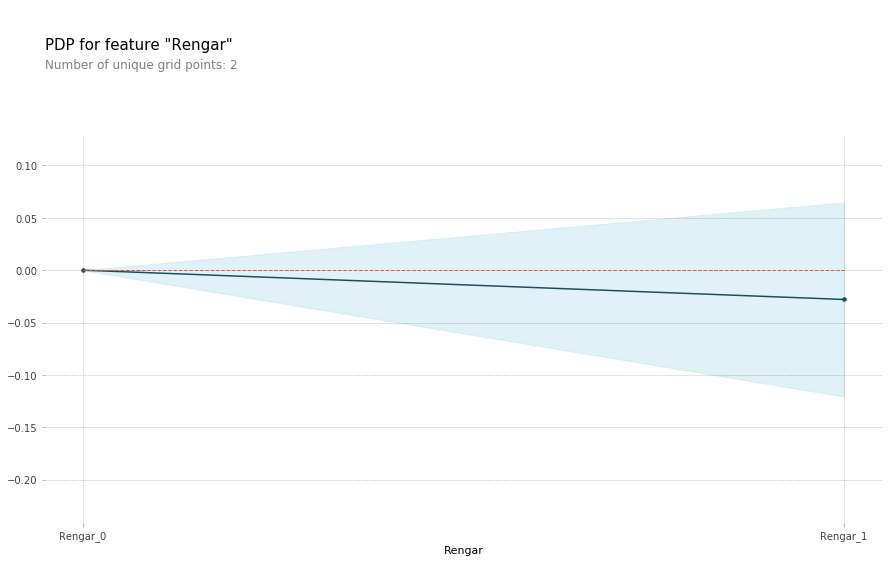

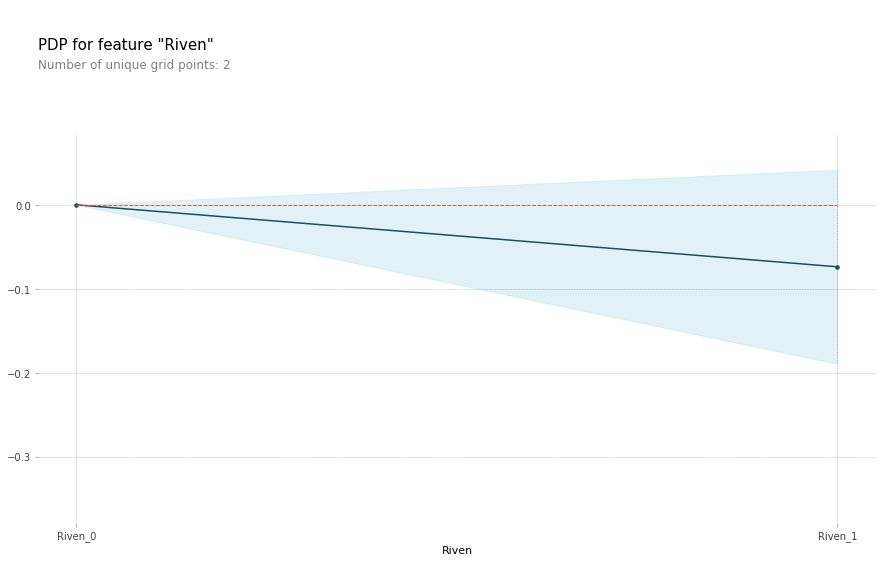

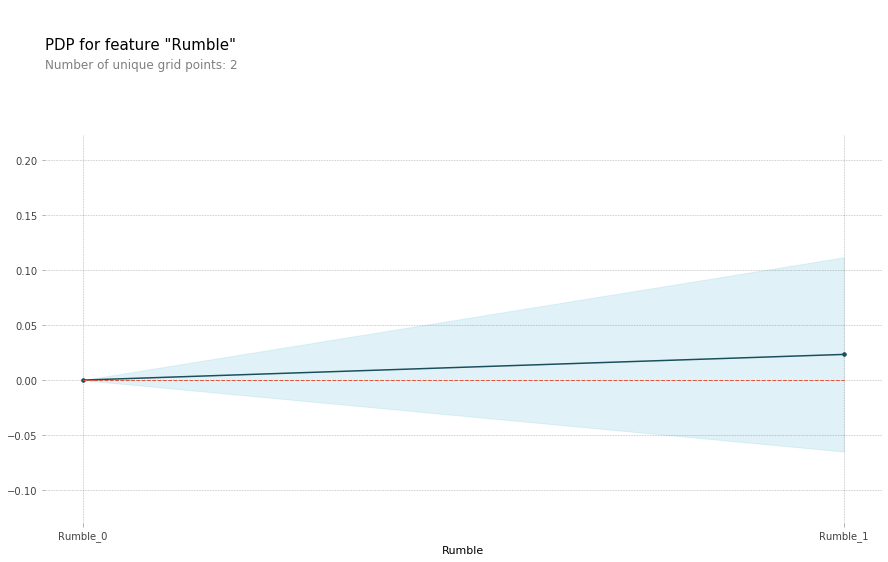

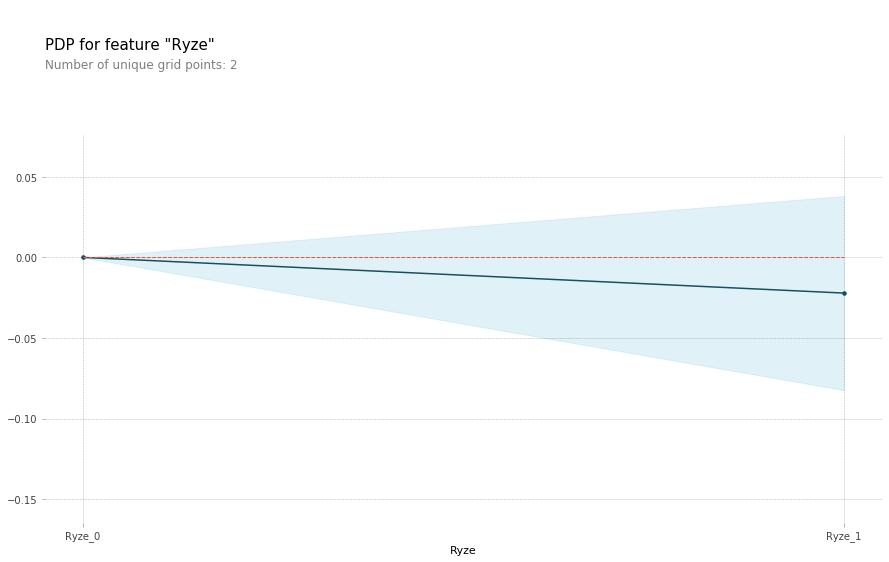

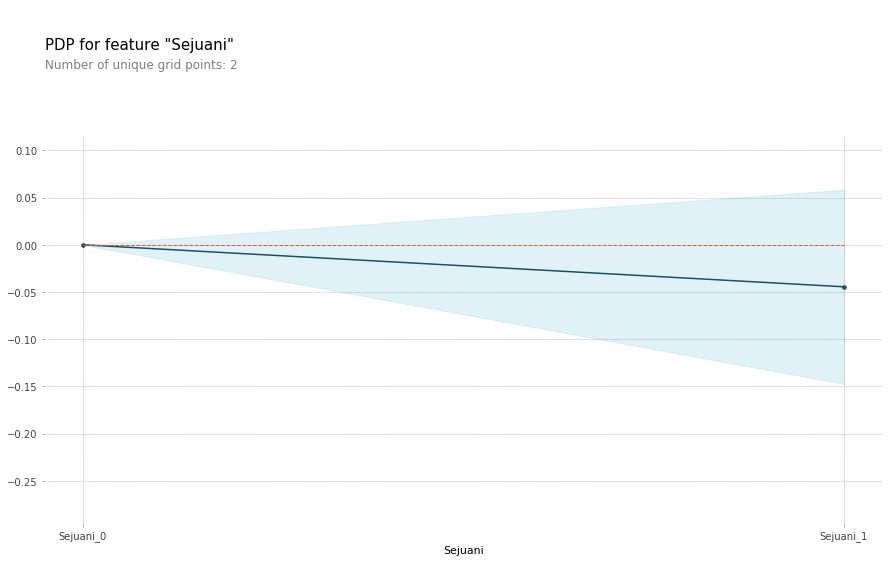

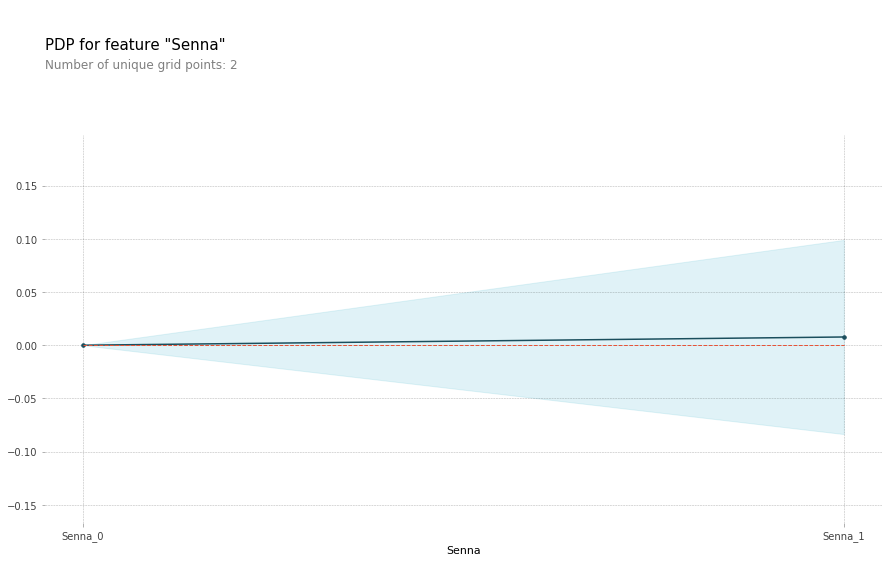

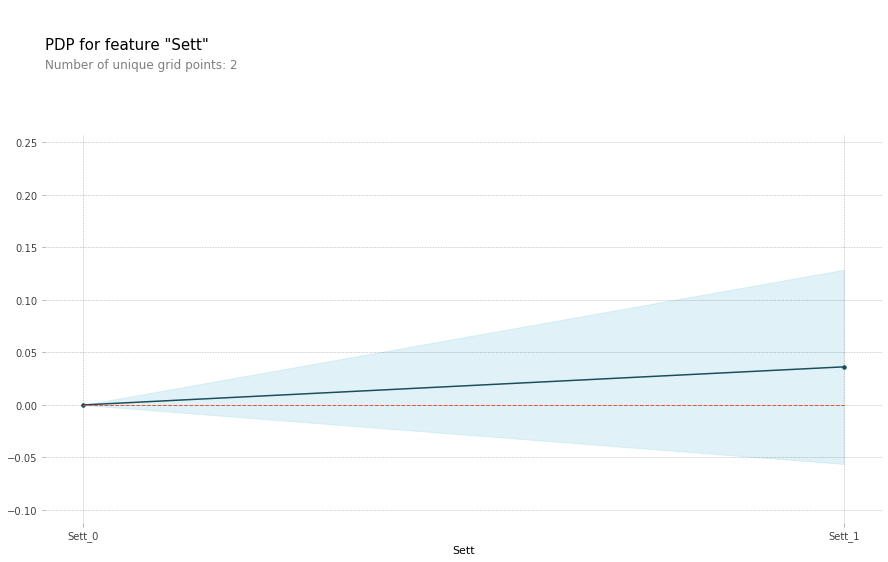

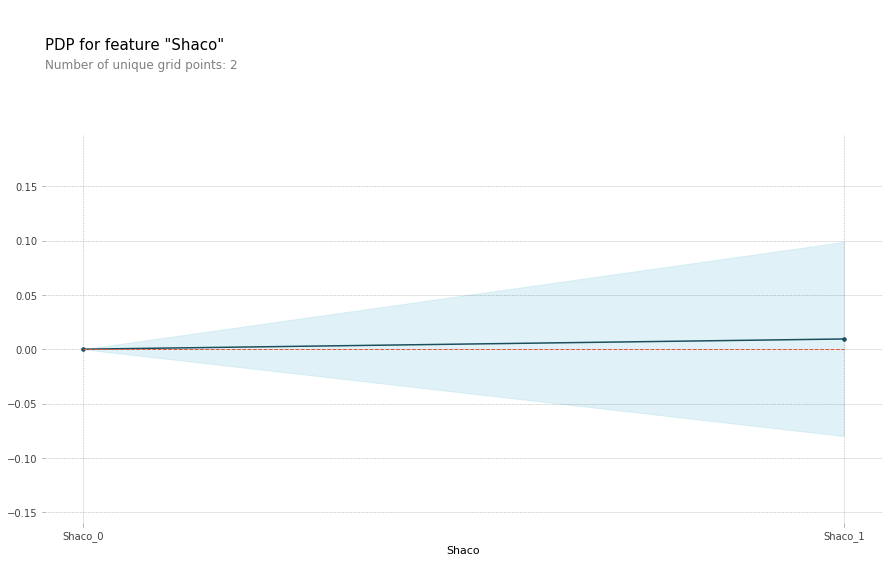

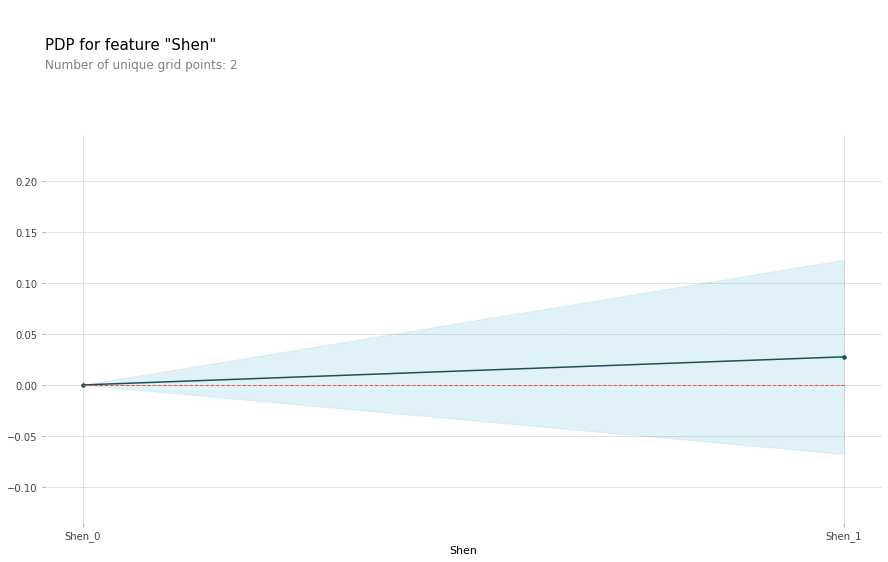

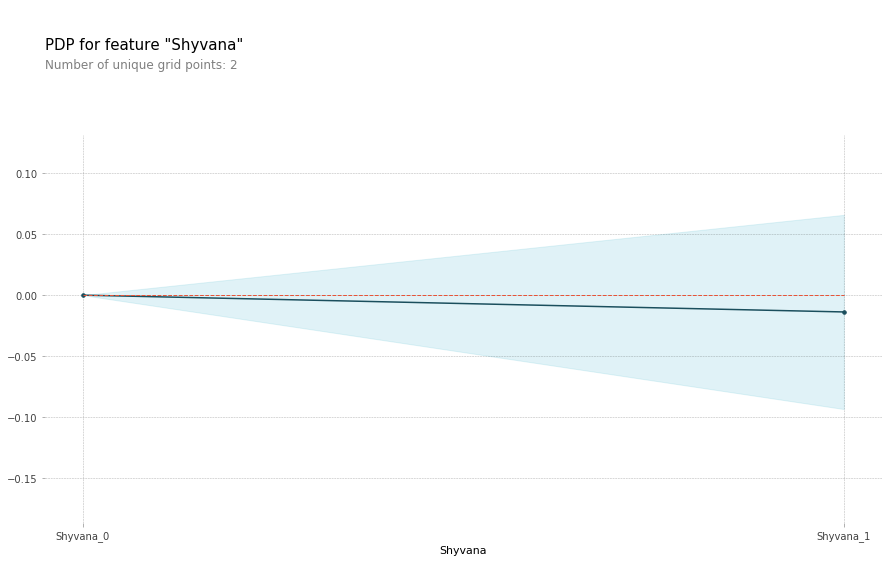

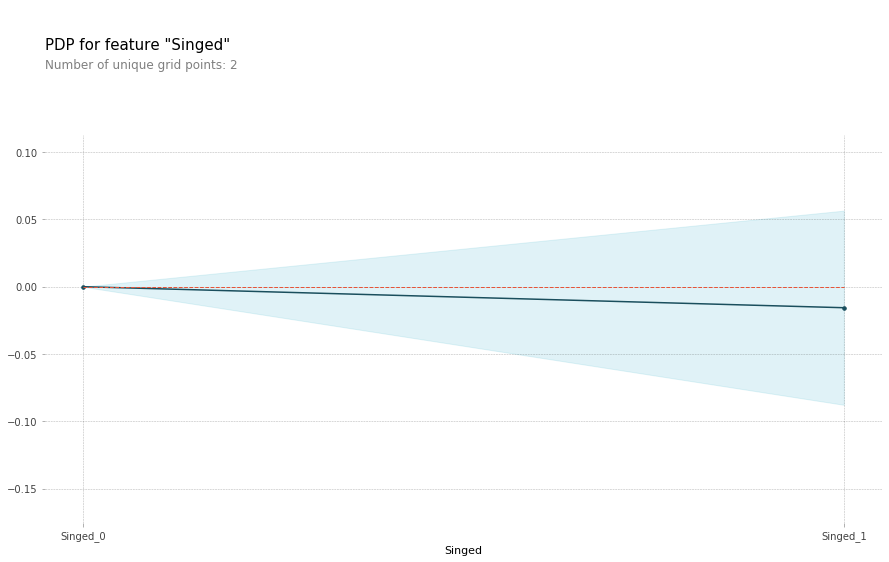

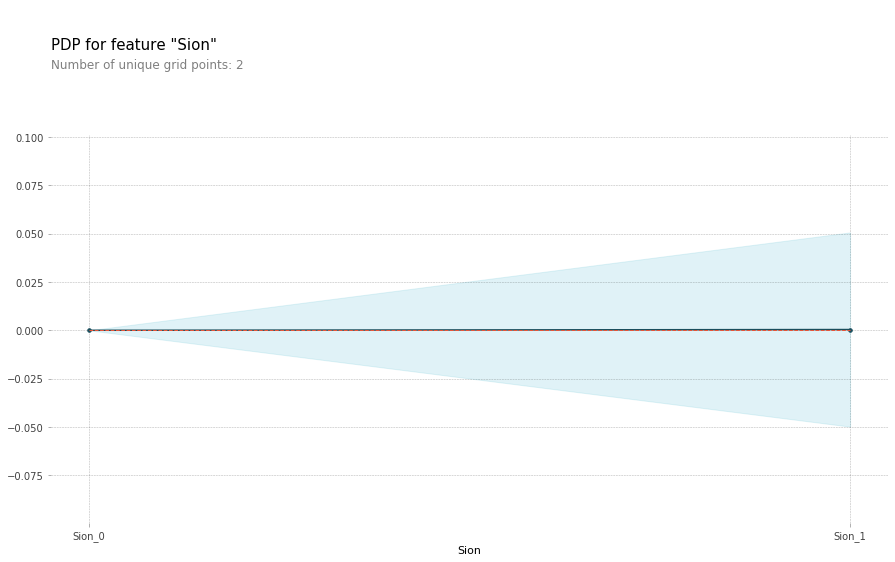

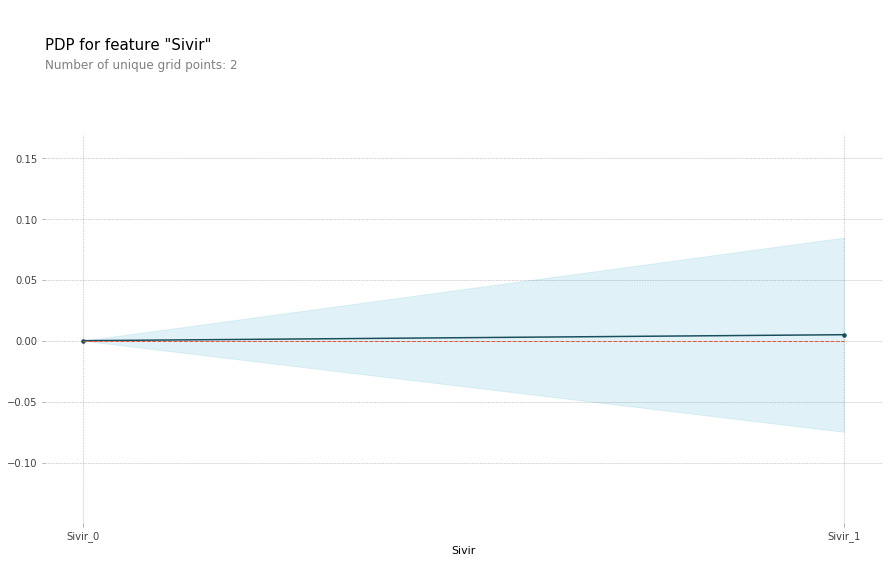

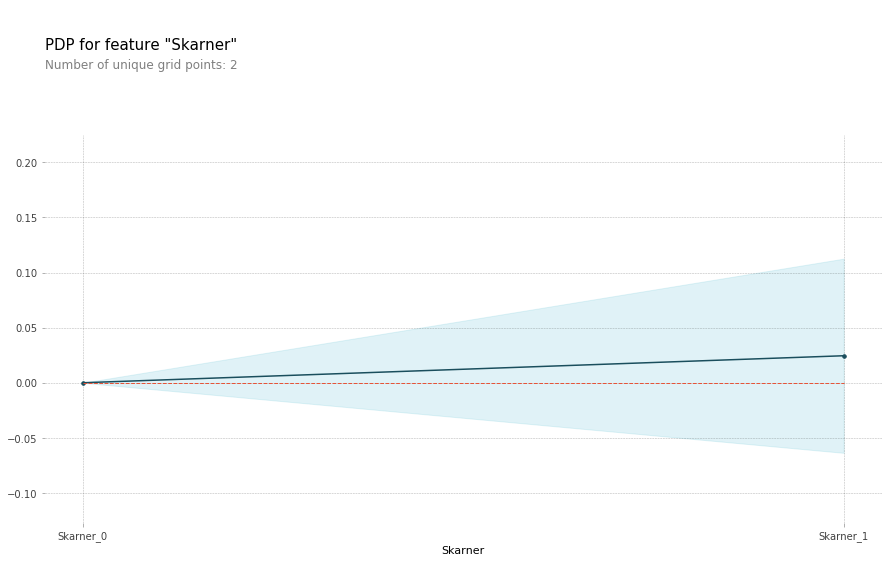

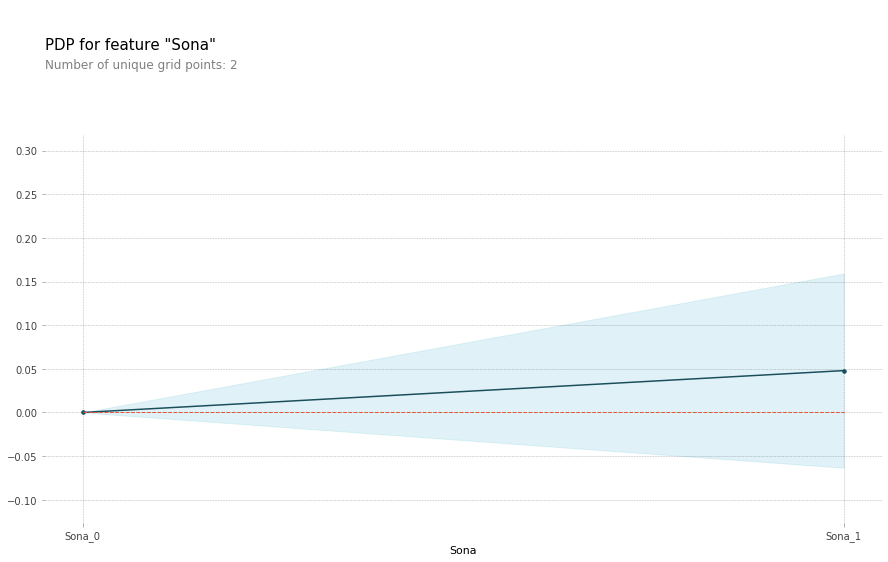

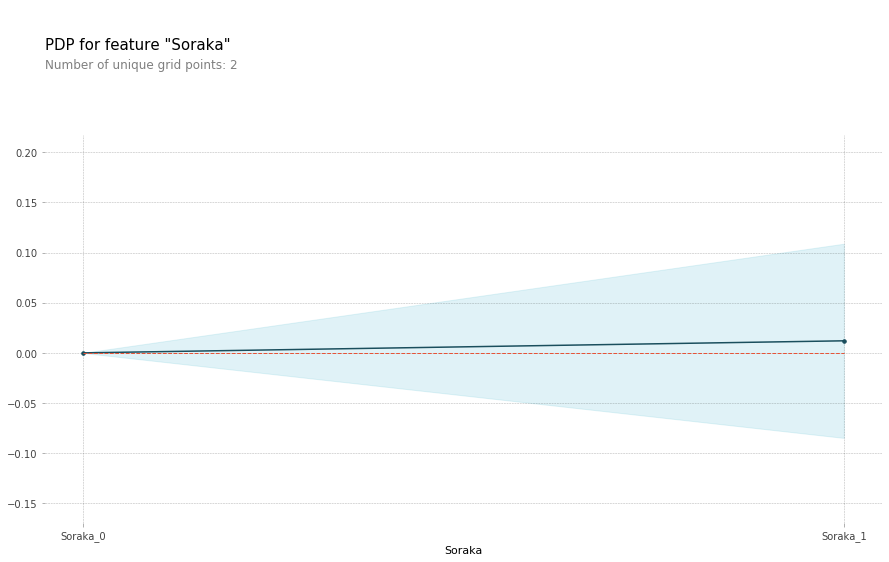

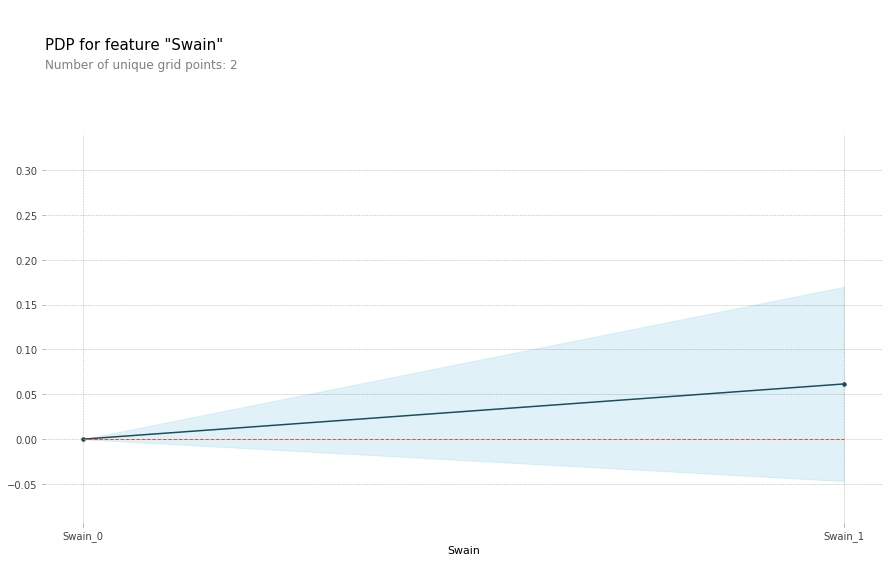

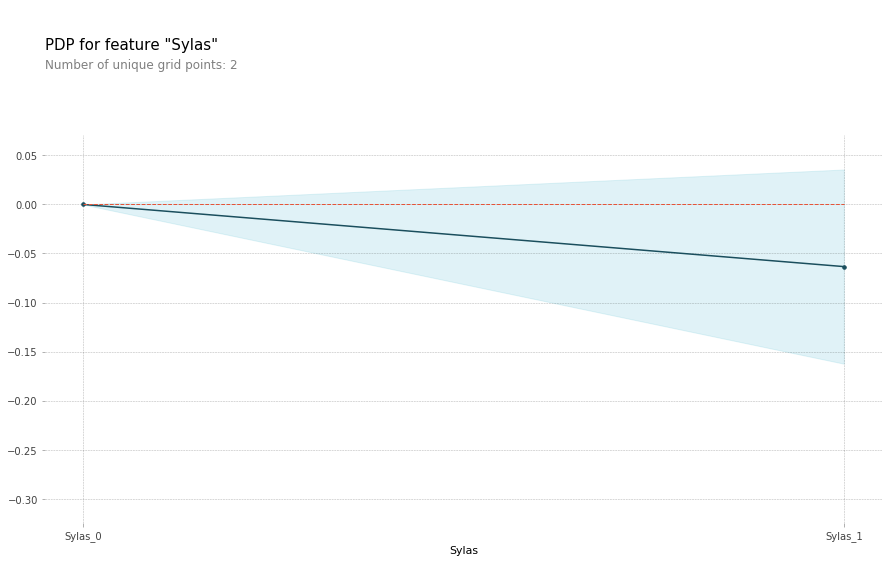

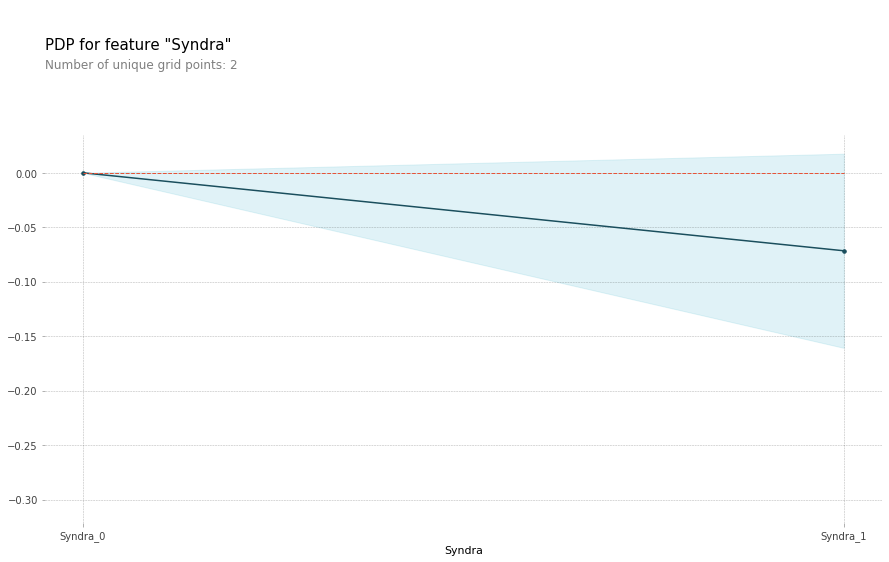

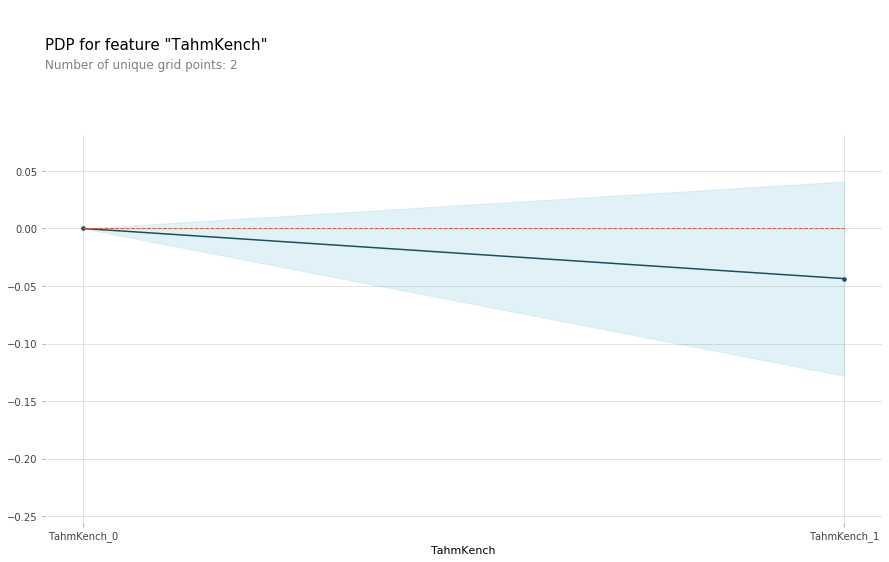

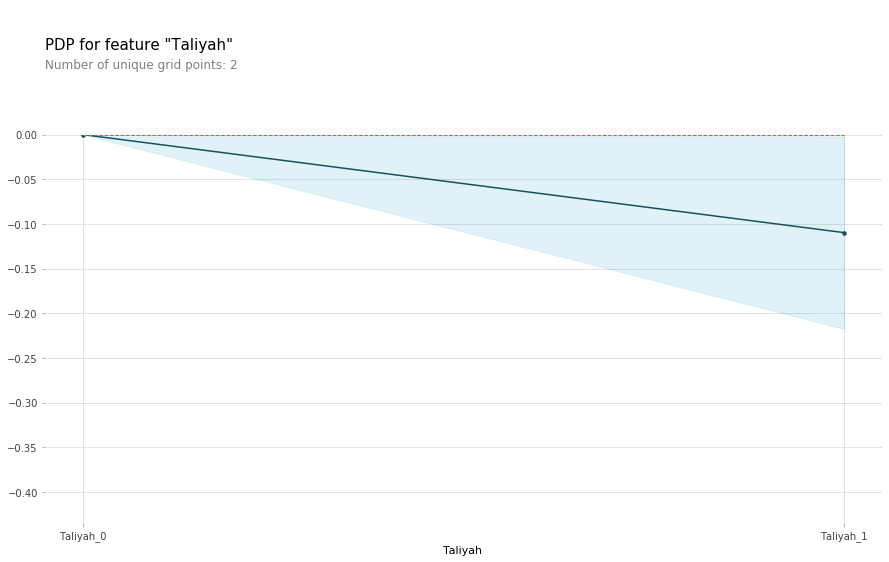

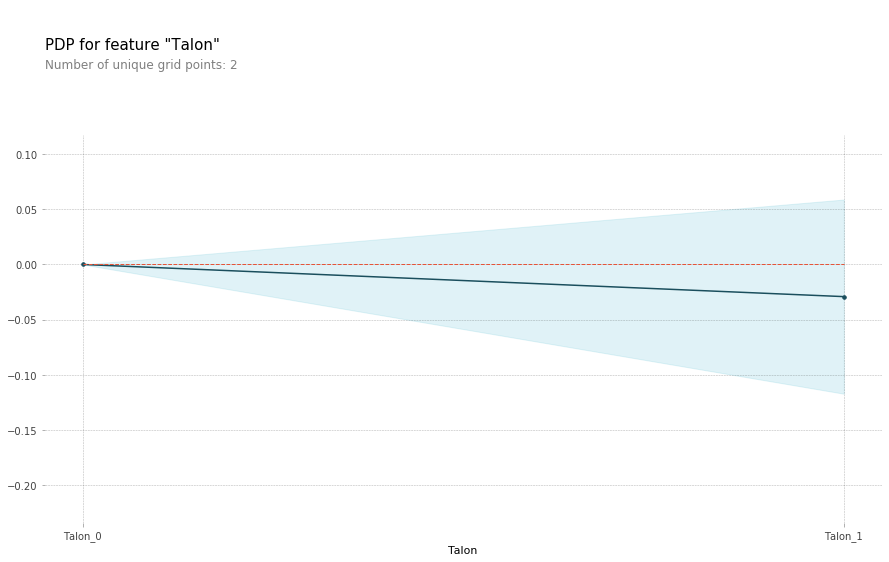

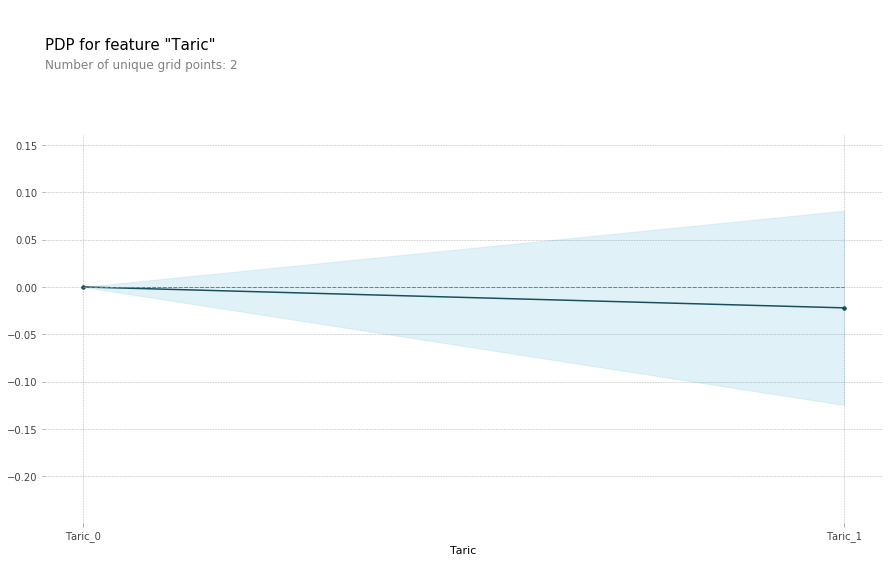

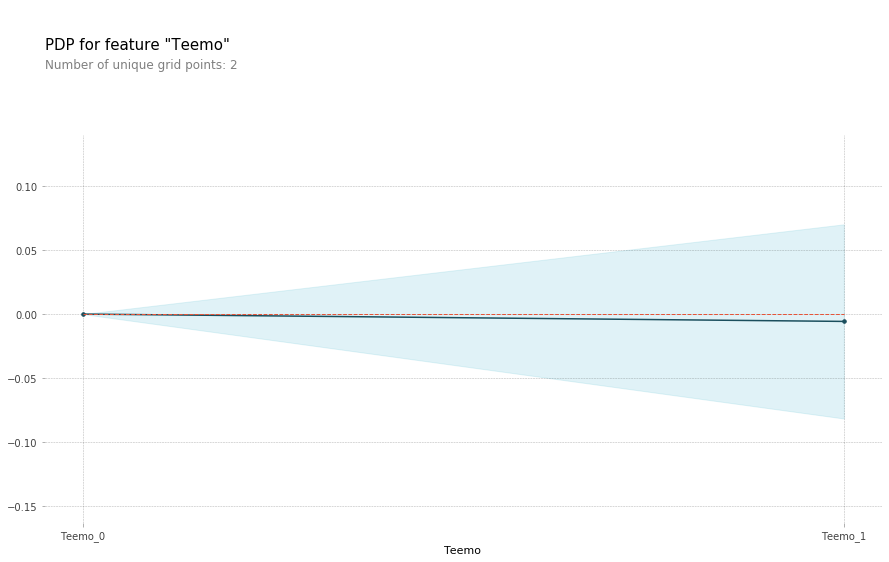

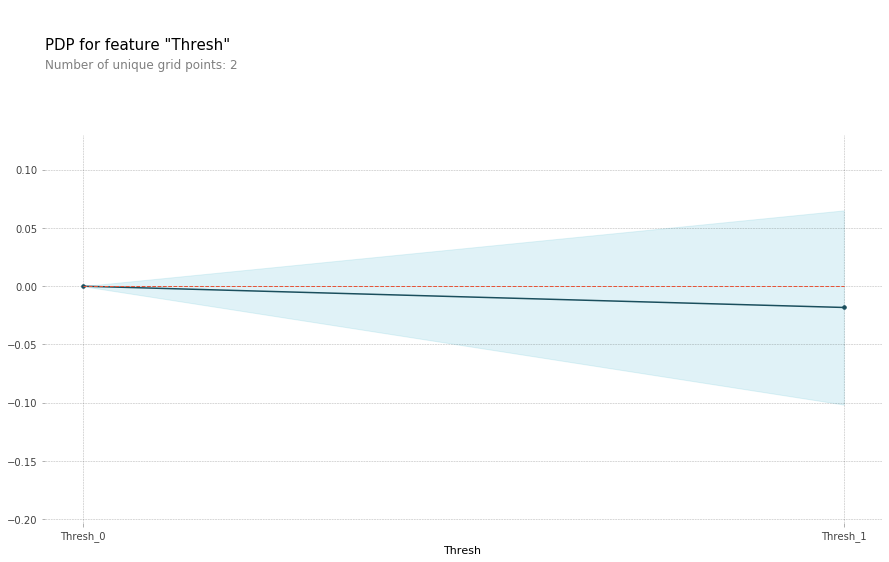

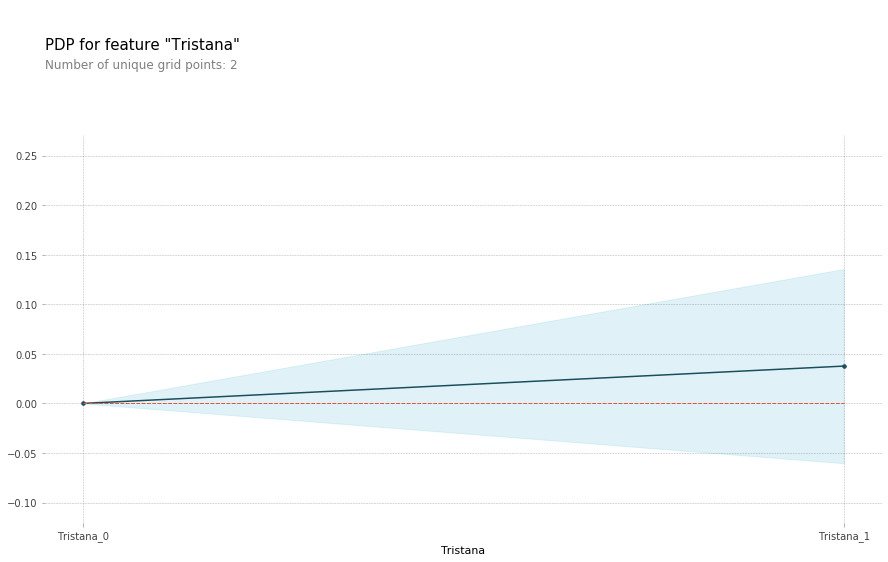

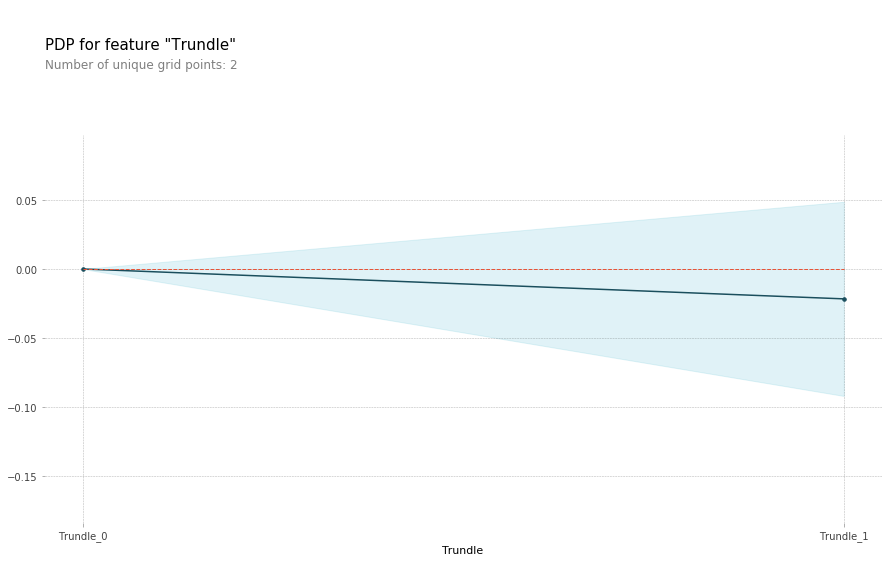

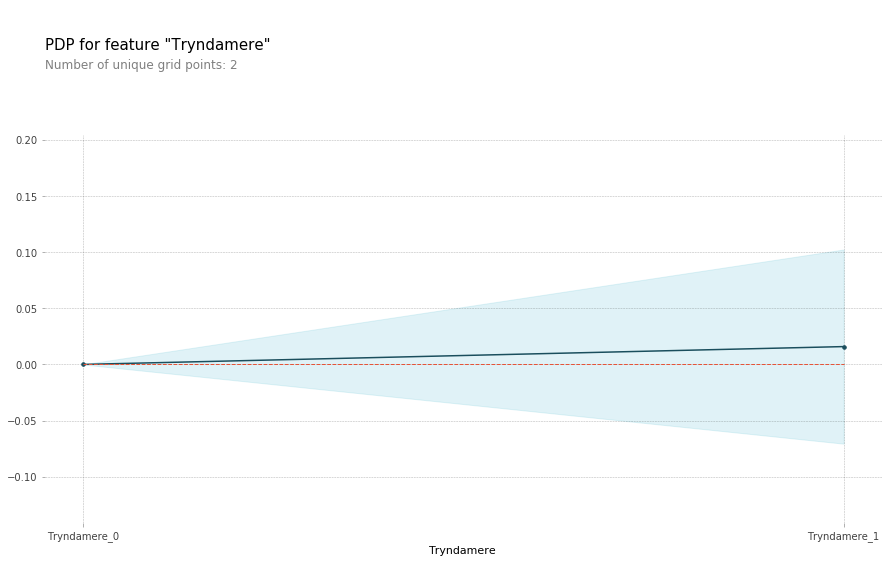

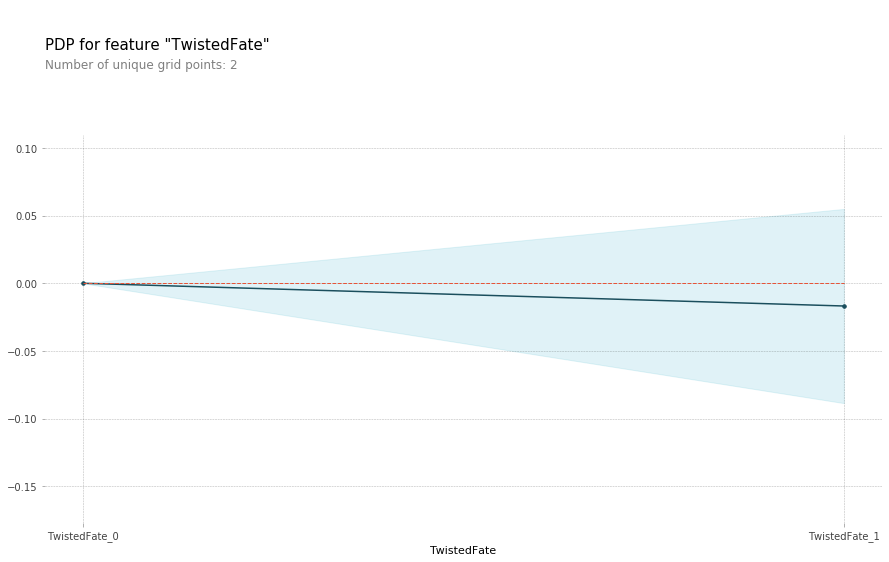

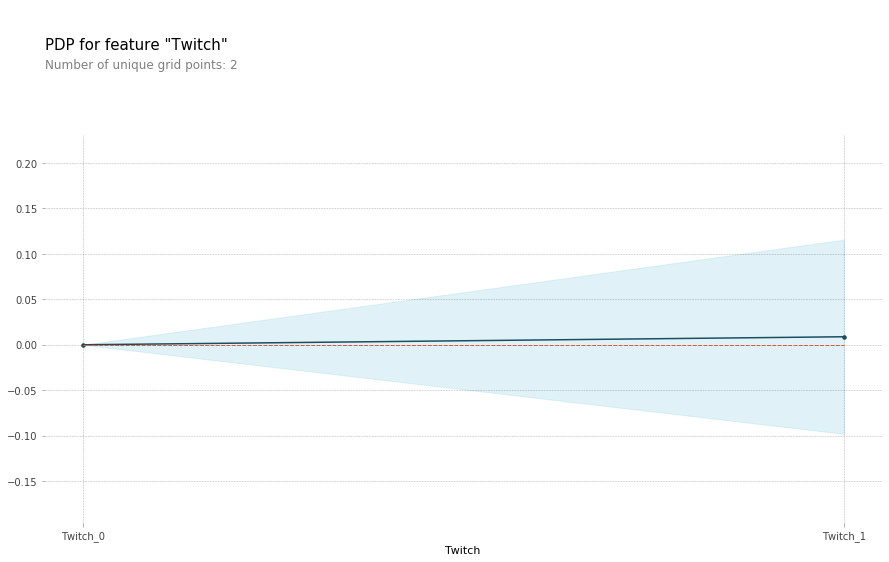

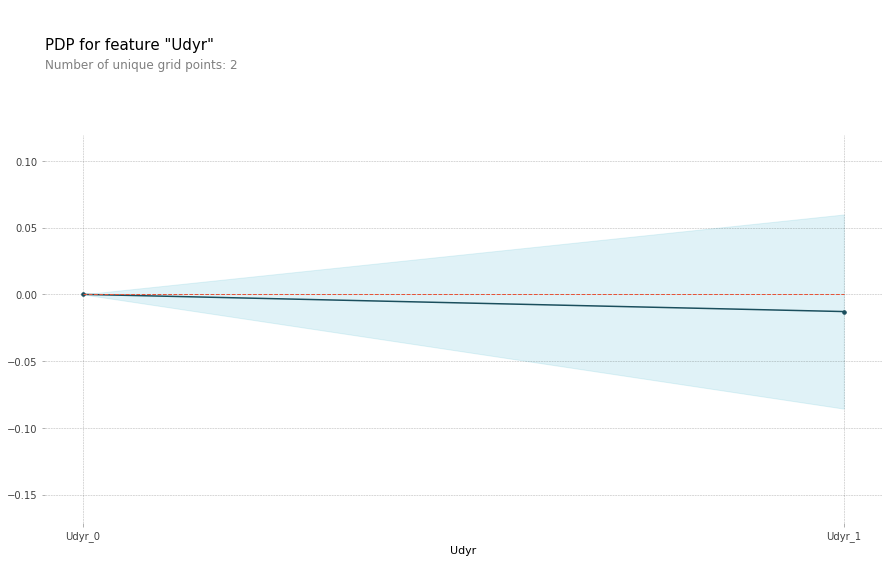

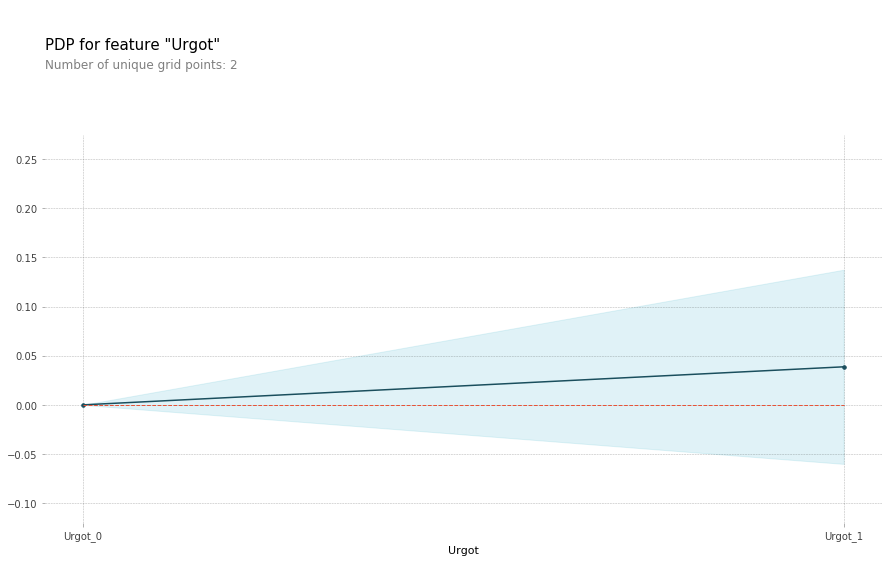

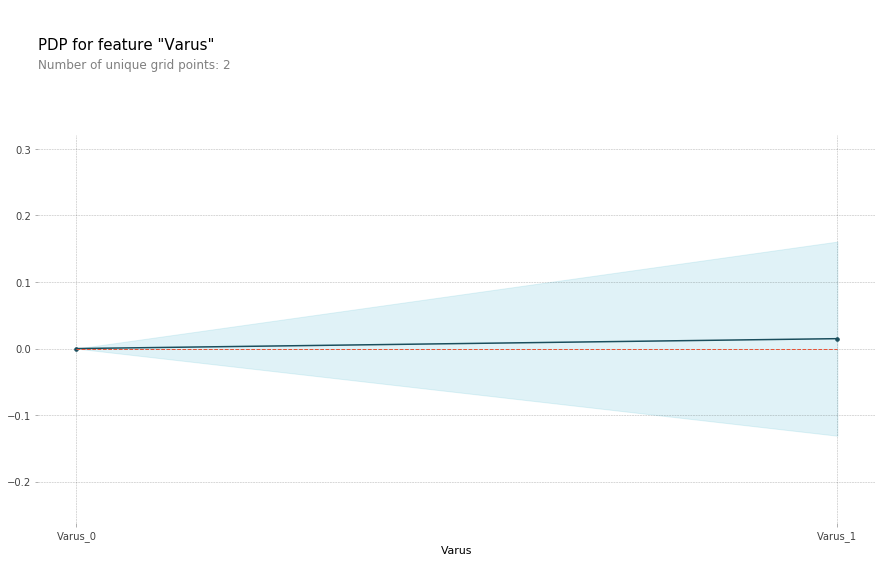

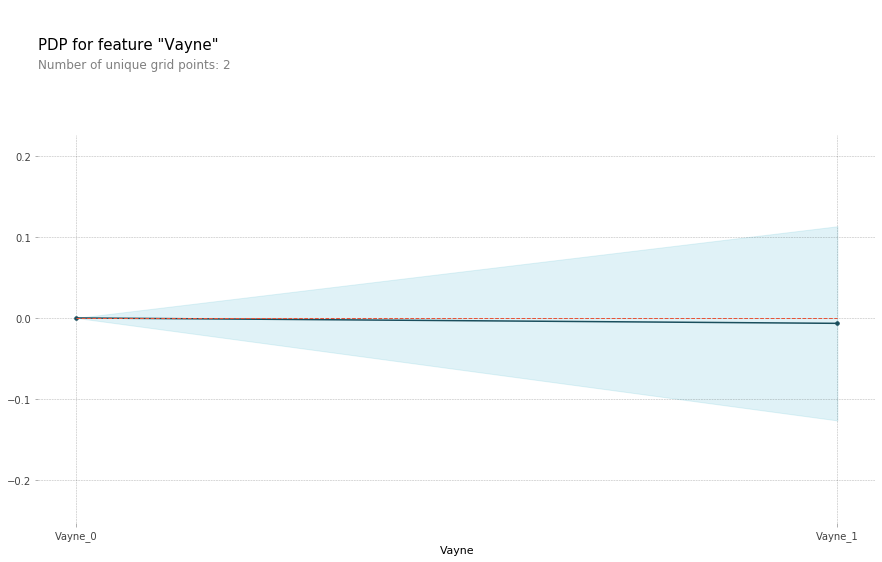

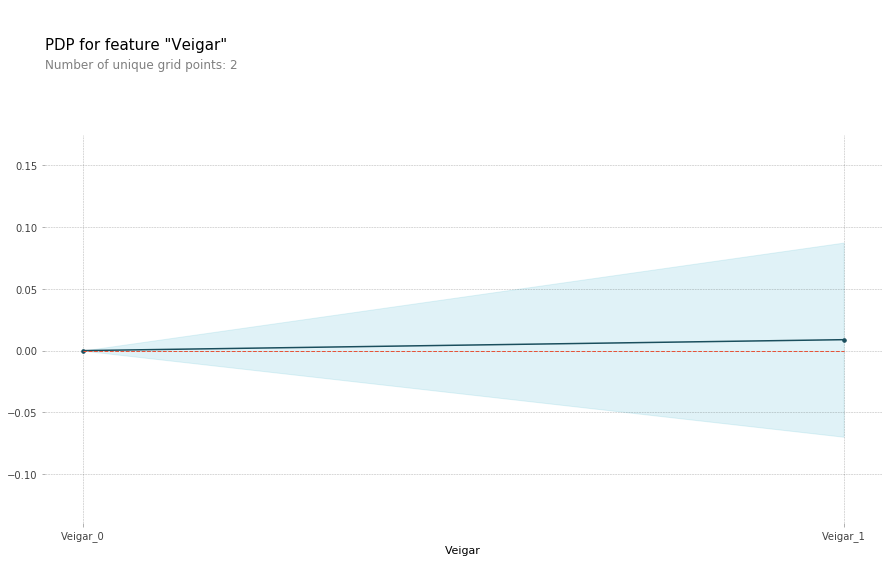

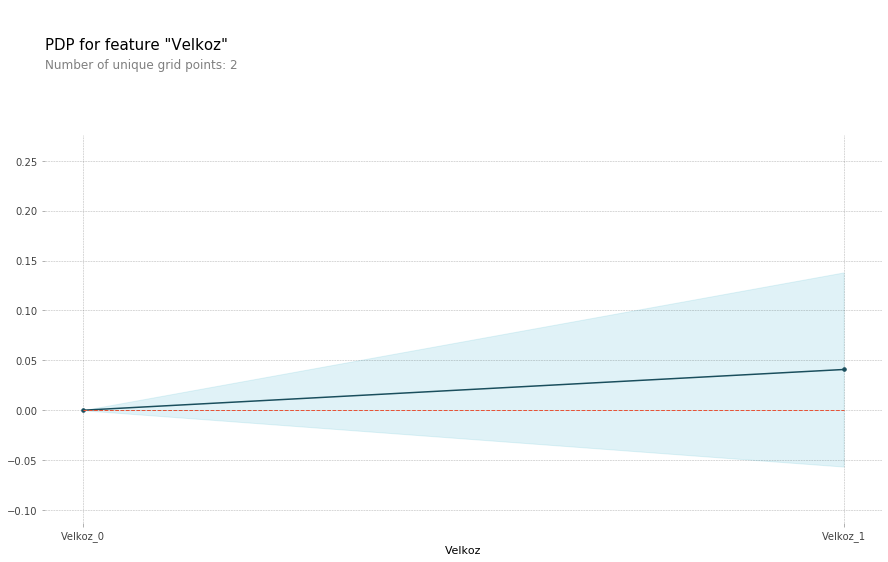

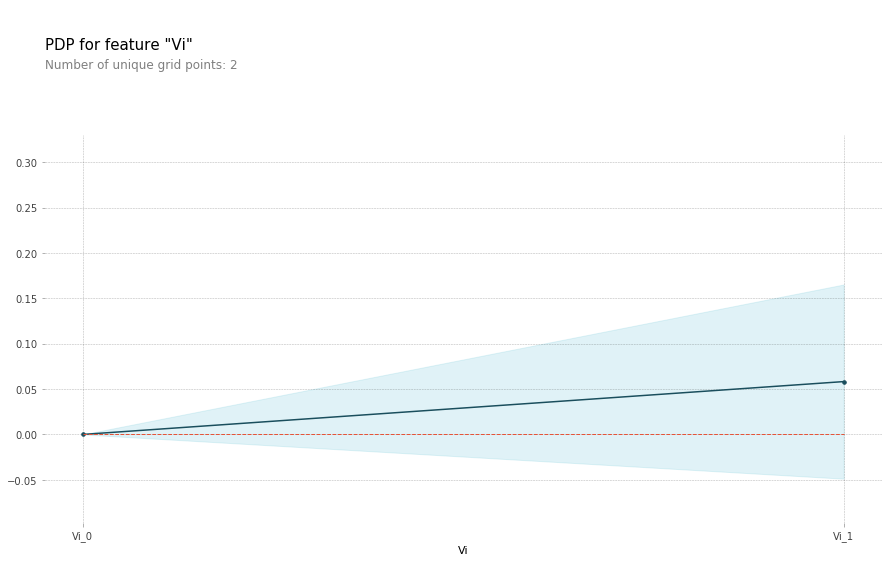

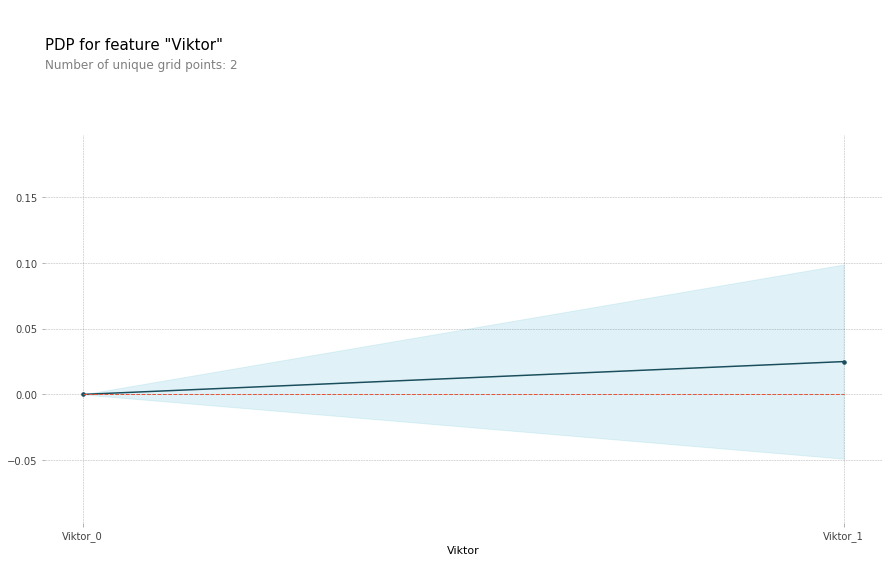

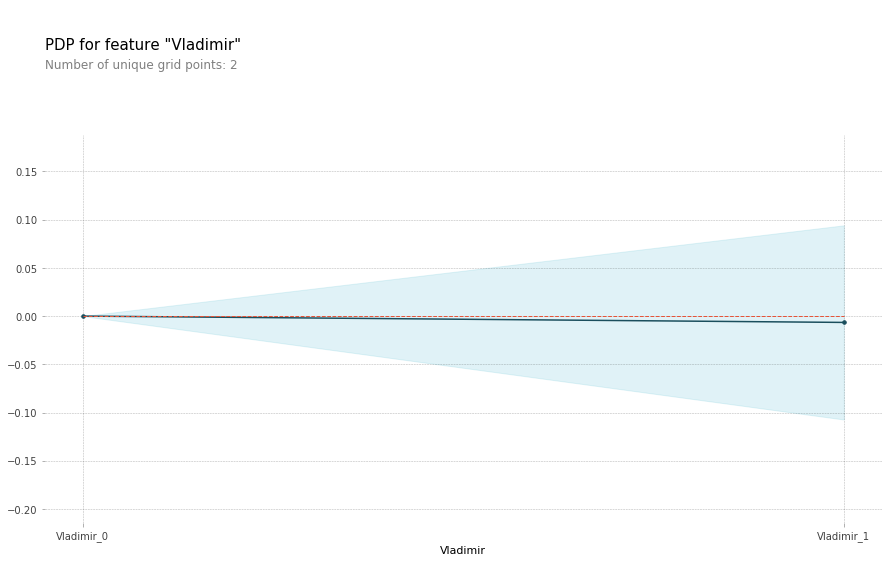

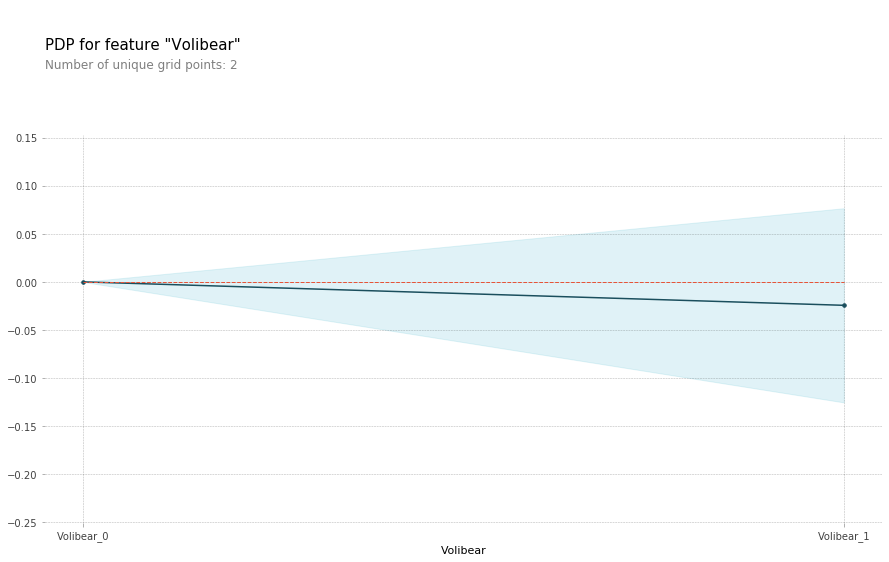

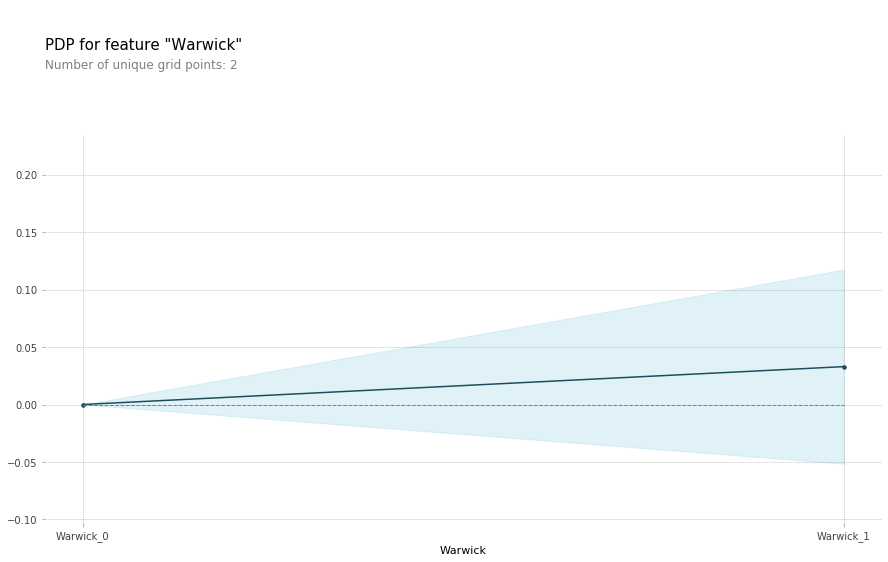

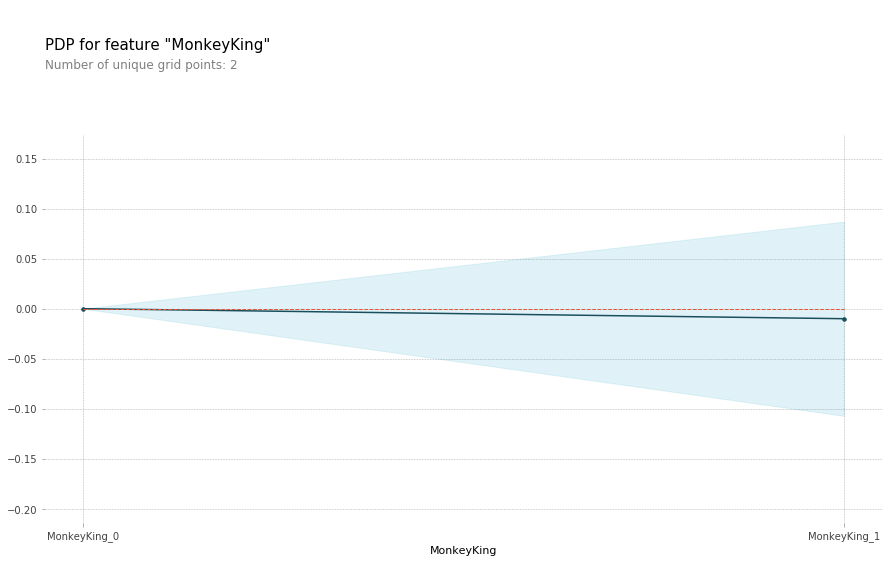

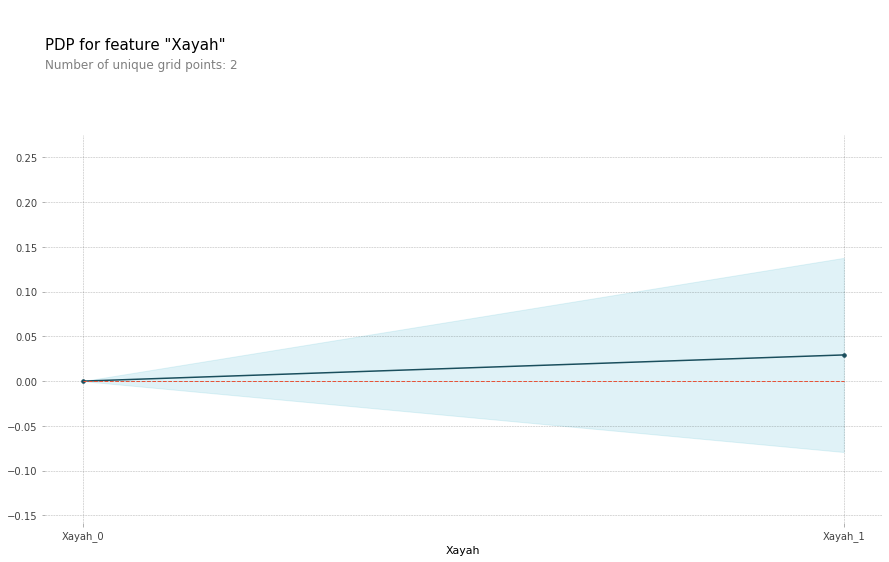

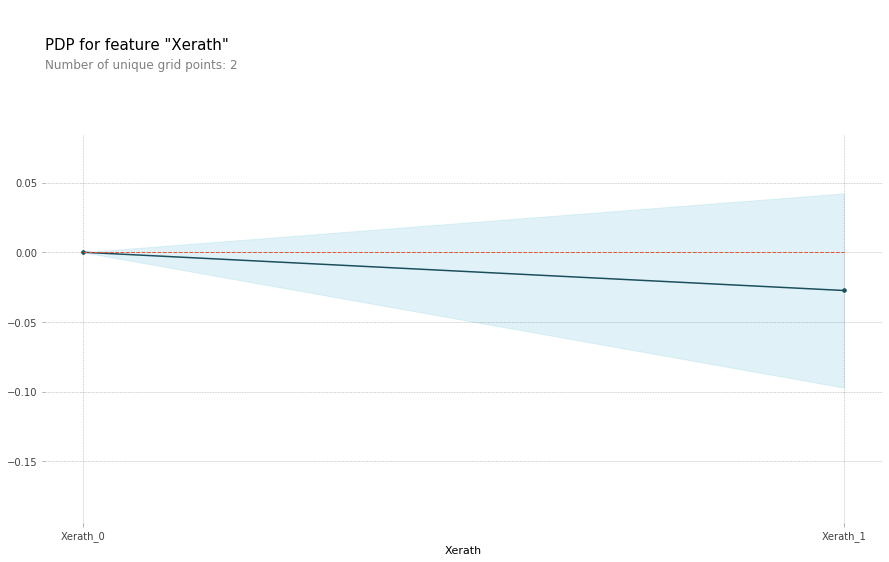

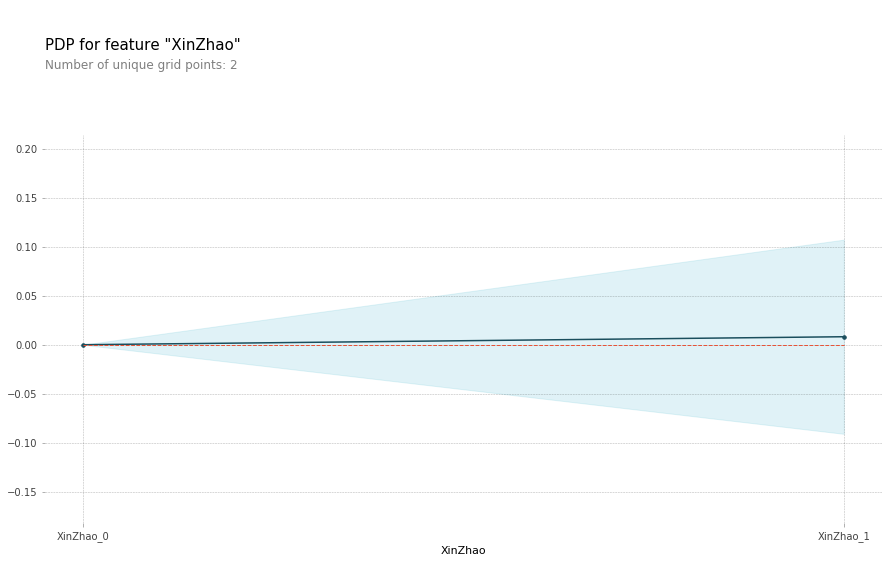

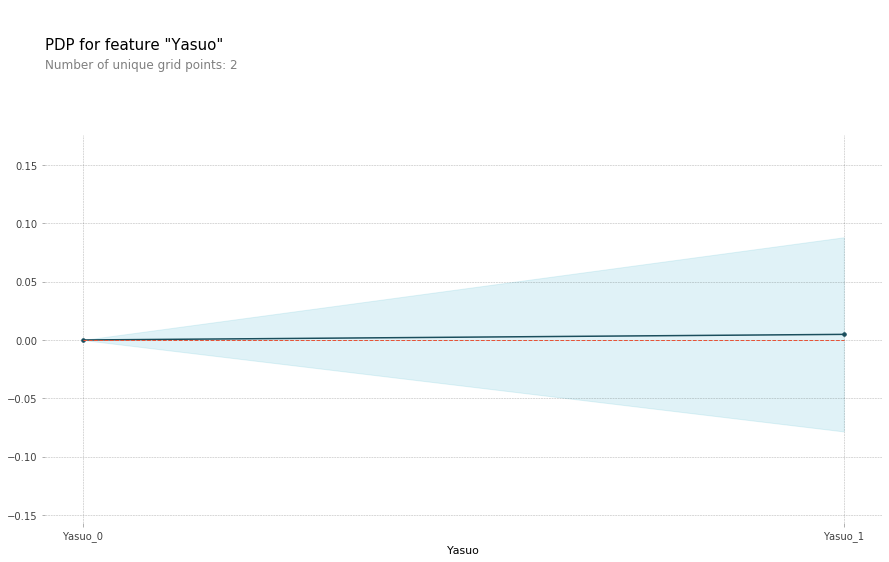

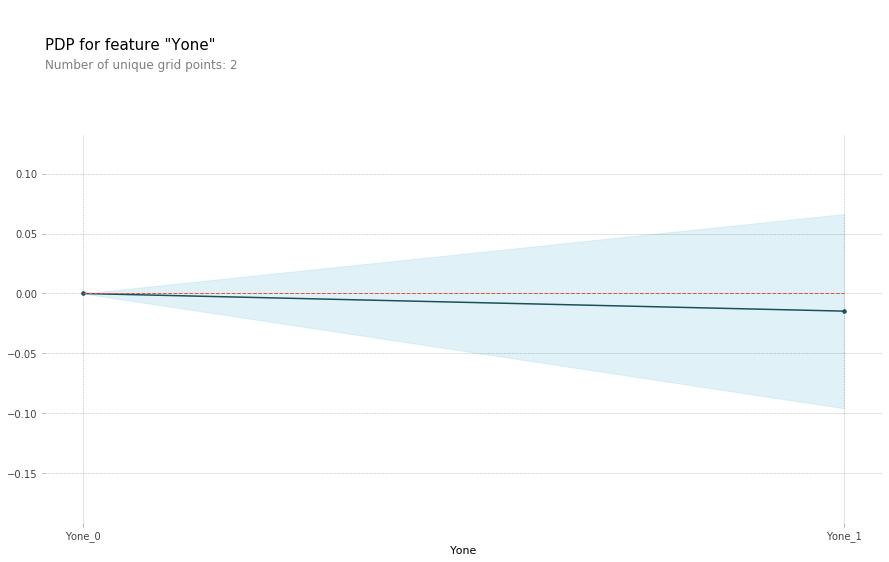

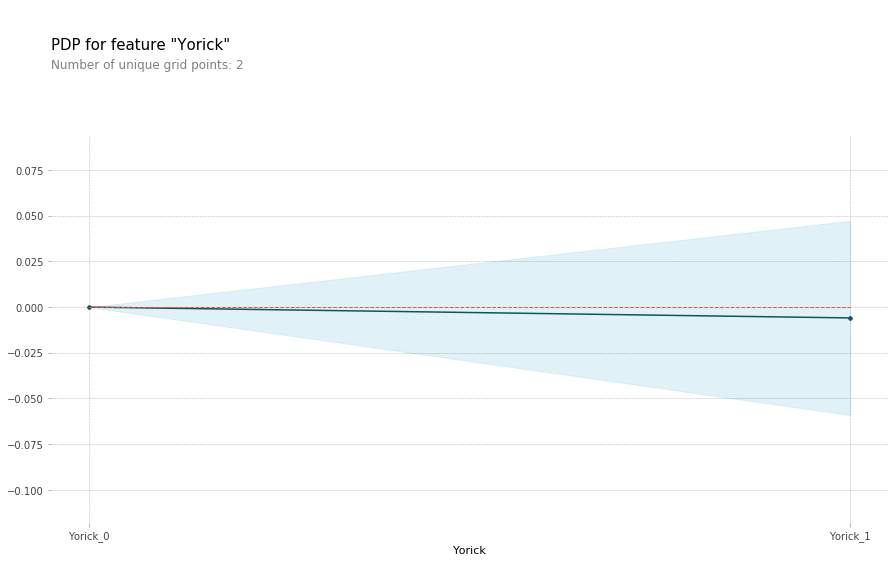

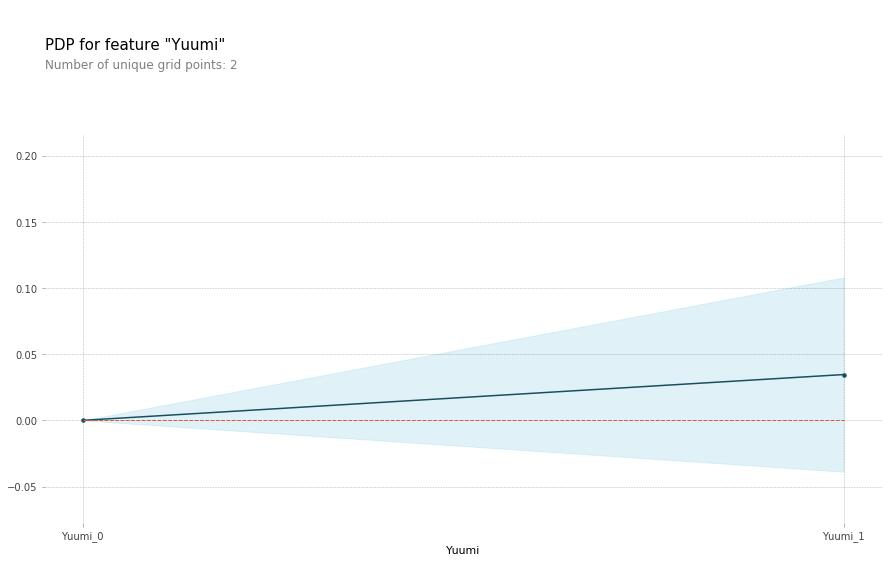

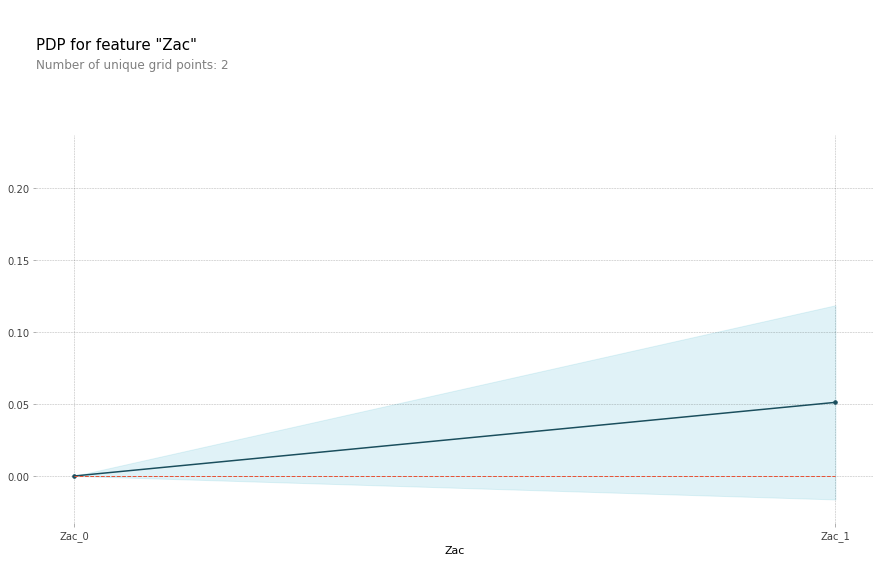

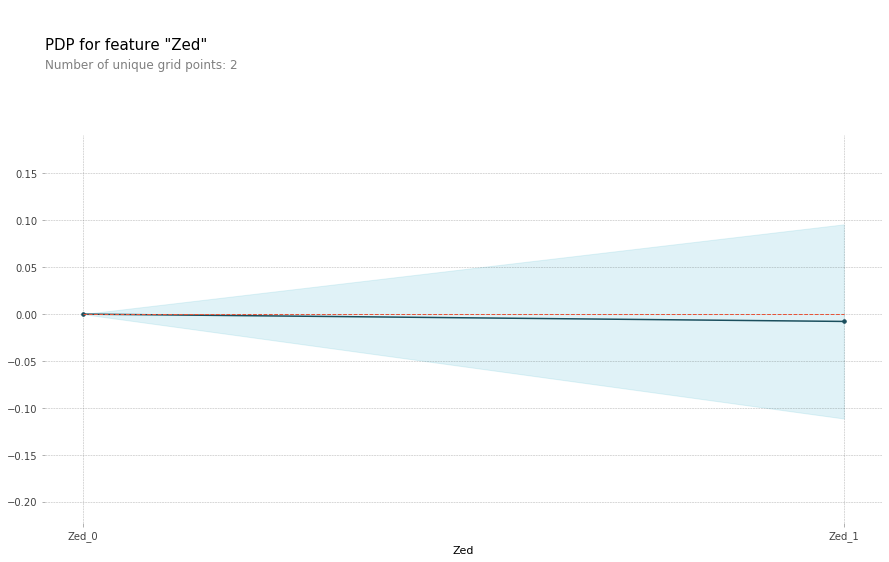

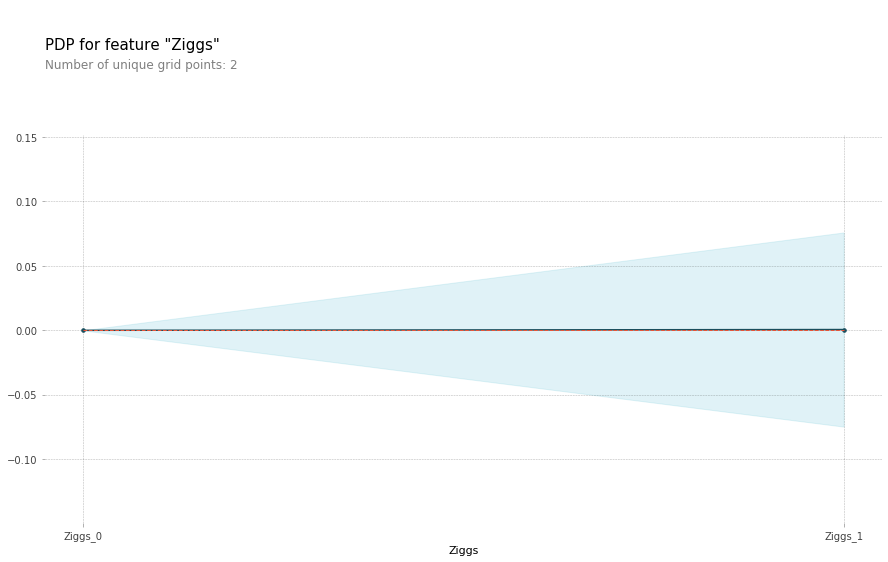

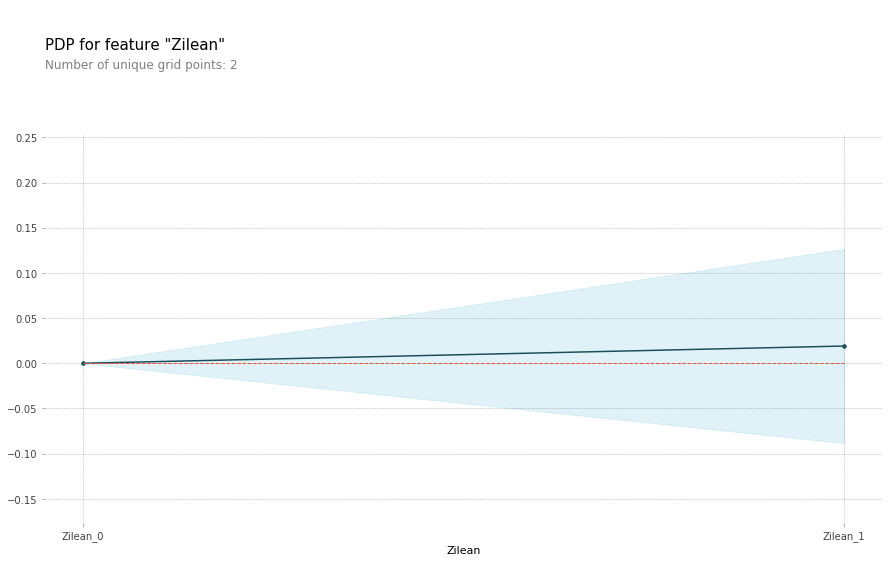

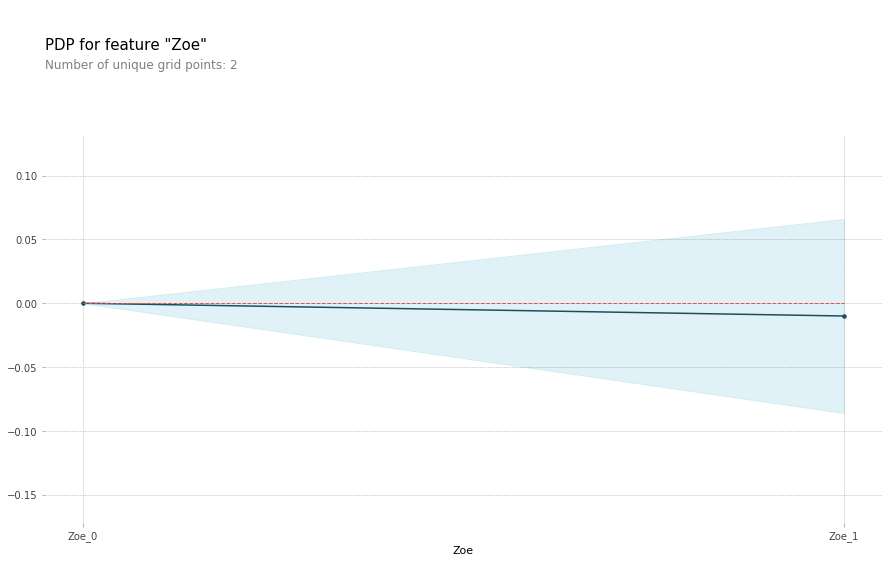

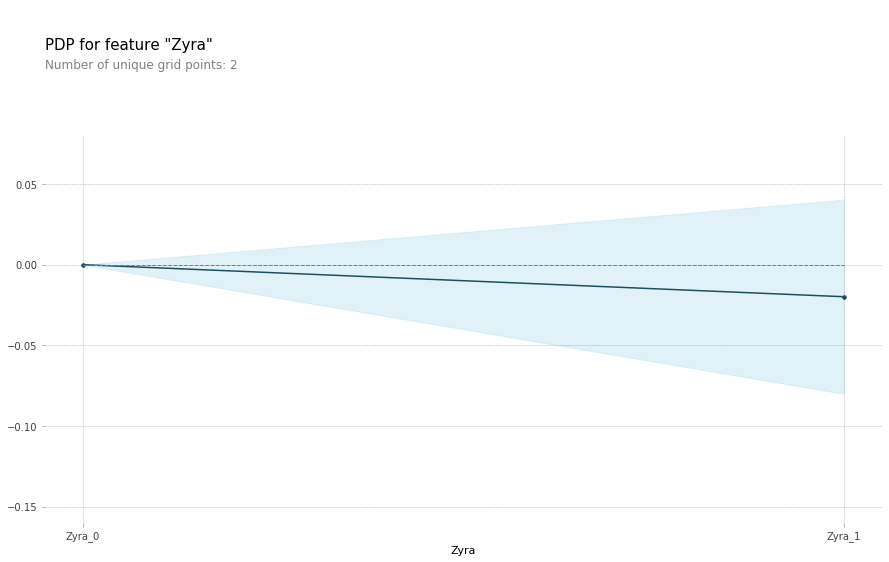

In [45]:
from pdpbox.pdp import pdp_isolate, pdp_plot

features = X_test.columns

for feature in features:
  isolated = pdp_isolate(
      model=pipe, 
      dataset=X_test, 
      model_features=X_test.columns, 
      feature=feature,
      grid_type='percentile', # default='percentile', or 'equal'
      num_grid_points=10 # default=10
  )
  pdp_plot(isolated, feature_name=feature);

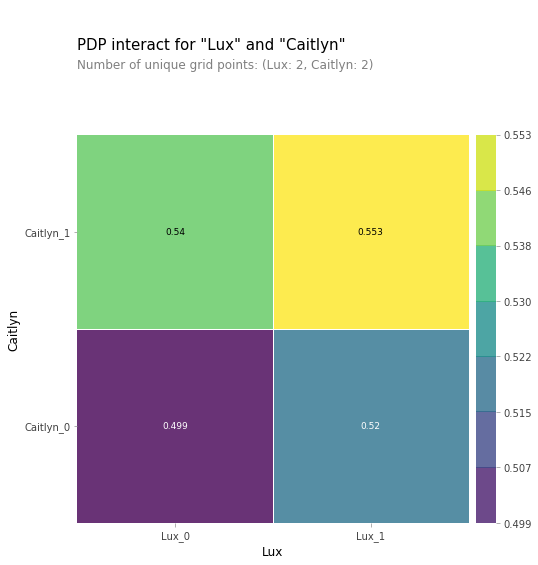

In [46]:
# 2D PDP
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['Lux', 'Caitlyn']

interaction = pdp_interact(
    model=pipe, 
    dataset=X_test, 
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [93]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split

shap.initjs();

df, target = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(df, target, test_size=0.2, random_state=2)

model = xgboost.XGBRegressor().fit(X_train, y_train)

### Draw PDP plots ###


[11:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


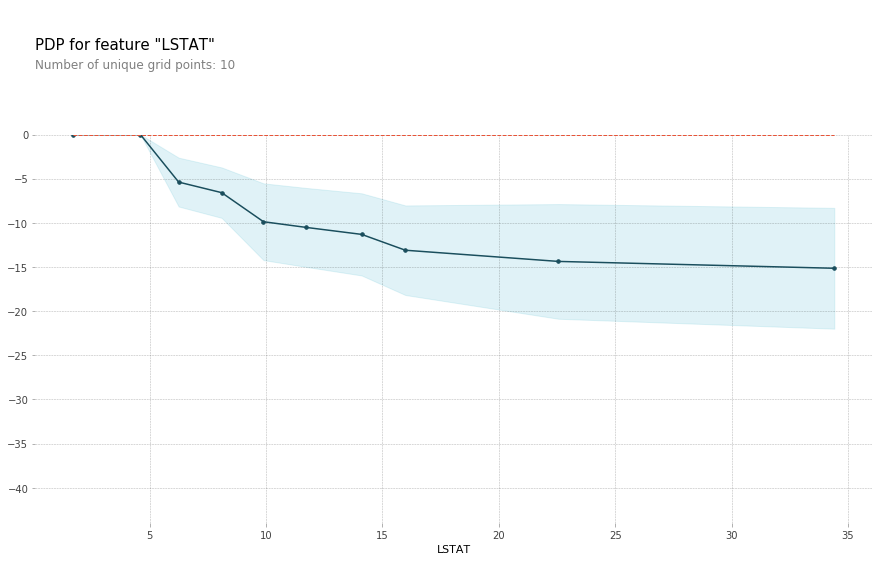

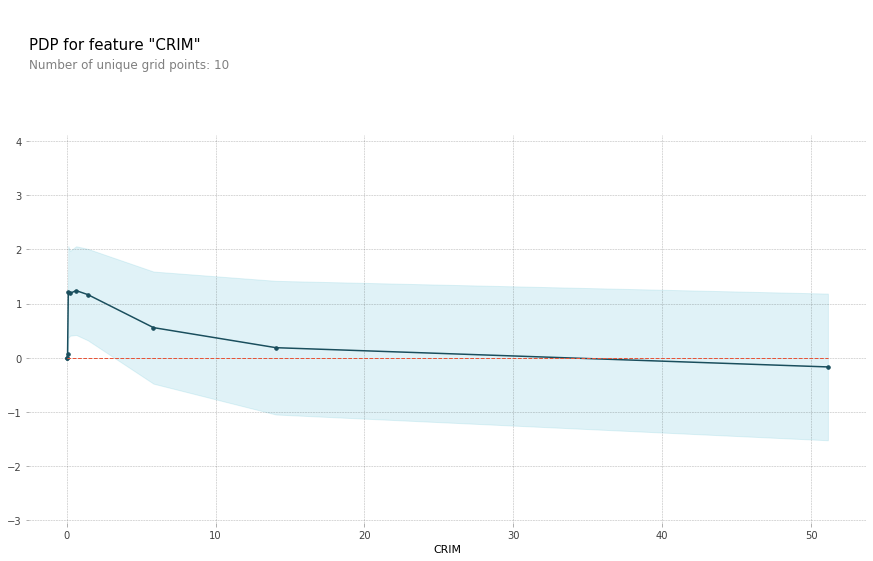

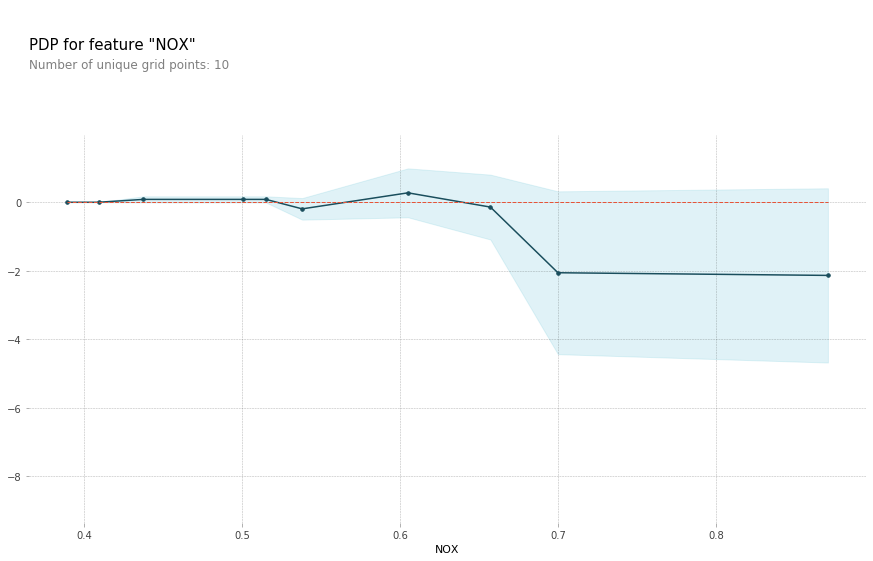

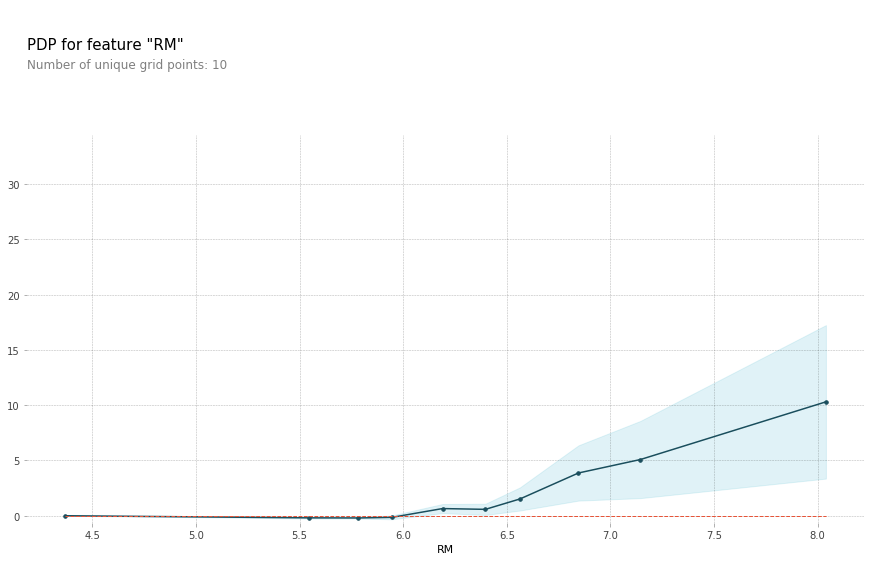

In [94]:
from pdpbox.pdp import pdp_isolate, pdp_plot

features = ['LSTAT', 'CRIM', 'NOX', 'RM']

for feature in features:
  isolated = pdp_isolate(
      model=model, 
      dataset=X_test, 
      model_features=X_test.columns, 
      feature=feature,
      grid_type='percentile', # default='percentile', or 'equal'
      num_grid_points=10 # default=10
  )
  pdp_plot(isolated, feature_name=feature);

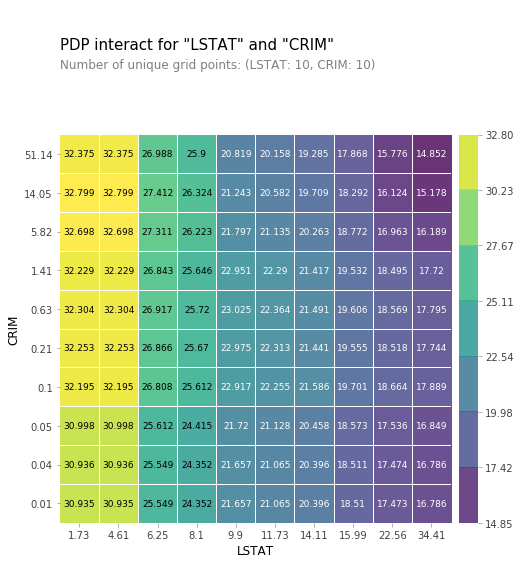

In [95]:
# 2D PDP
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['LSTAT', 'CRIM']

interaction = pdp_interact(
    model=model, 
    dataset=X_test, 
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

### 2) SHAP 라이브러리를 사용해 최소 3개 이상 시각화를 하고 분석하세요
- 본인 포트폴리오 데이터를 사용해서 SHAP 시각화를 수행하세요
- **(제출폼 과제) SHAP 라이브러리를 사용해 다음 문항 중 설명이 올바른 항목을 선택한 후 과제 제출폼에 제출하세요.**
    - 1. force_plot을 그려보면 CRIM은 항상 가격을 낮추는 영향을 준다.
    - 2. SHAP의 summary_plot을 사용하면 permutation importance를 구할 수 있다.
    - 3. SHAP summary_plot을 그려보면 (조건: X_train, plot_type='bar') LSTAT이 가장 영향력이 큰 특성으로 보인다.
    - 4. 모델의 feature importance(model.feature_importances_)를 구하면 가장 영향력이 큰 특성이 RM임을 알 수있다.**


tags에 str 형식의 데이터가 있어서 tags를 빼고 shap를 실행

In [106]:
import pandas as pd

df = pd.read_csv('Lol_matchs.csv', index_col = 0)
team1 = df.iloc[:, :150]
team2 = df.iloc[:, 150:300]
result = df.iloc[:, 300:]

df_champ = pd.read_csv('riot_champion.csv')
df_champ[['id', 'tags']]
df_champ['tags'].unique().sum()
position = []
for i in df_champ['tags'][:]:
  position = set(position).union(set(i.replace('[', '').replace(']', '').replace("'", '').replace(' ', '').split(',')))

df.rename(columns = {'Wukong' : 'MonkeyKing'}, inplace = True)

df_champ = df_champ.append(pd.DataFrame({'id' : ['Lillia', 'Yone'], 'tags' : [['Mage', 'Support'], ['Fighter', 'Assassin']]}))

df_champ.sort_values('id', inplace = True)
df_champ.reset_index(inplace = True)

for i in range(150):
  if df.columns[:150].sort_values()[i] in df_champ.id.values:
    pass
  else:
    df.rename(columns = {df.columns[:150].sort_values()[i] : df_champ.id.values[i]}, inplace = True)

for i in df_champ['tags'][:]:
  try:
    df_champ['tags'][i] = i.replace('[', '').replace(']', '').replace("'", '').replace(' ', '')
  except:
    pass

for i, j in zip(df_champ['tags'], range(150)):
  try:
    df_champ['tags'][j] = i.replace('[', '').replace(']', '').replace("'", '').replace(' ', '').split(',')
  except:
    pass

df_copy = df.iloc[:, :150]
df_copy['tags'] = str([[df_champ['tags'].T[j] for i, j in zip(df_copy.loc[k], range(150)) if i] for k in range(len(df_copy))])

df_copy['target'] = df.Team1

df_copy = df_copy.drop('tags', axis = 1)

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_copy, train_size=0.80, test_size=0.20, 
                                        stratify=df_copy.target, random_state=2)

train_data, val_data = train_test_split(train_data, train_size=0.80, test_size=0.20, 
                                        stratify=train_data.target, random_state=2)

X_train = train_data.drop('target', axis = 1)
y_train = train_data.target

X_val = val_data.drop('target', axis = 1)
y_val = val_data.target

X_test = test_data.drop('target', axis = 1)
y_test = test_data.target

X_train.shape, X_val.shape, X_test.shape

((22193, 150), (5549, 150), (6936, 150))

In [107]:
### 이곳에서 과제를 진행해 주세요 ###
import shap
row = X_test.iloc[[1]]
model = xgboost.XGBRegressor().fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)
### Draw SHAP plots ###

[11:42:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [108]:
row = X_test.iloc[[3]]

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

In [109]:
row = X_test.iloc[[500]]

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

아래는 과제. 과제는 과제끼리만 실행 해야됨.. 중간 중간 과제, 포트폴리오 섞여서 정리가 안되어있음..

In [96]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###
import shap
row = X_test.iloc[[1]]

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)
### Draw SHAP plots ###

X_test의 두번째 행에서는 CRIM이 가격을 높히는 영향을 주었다.

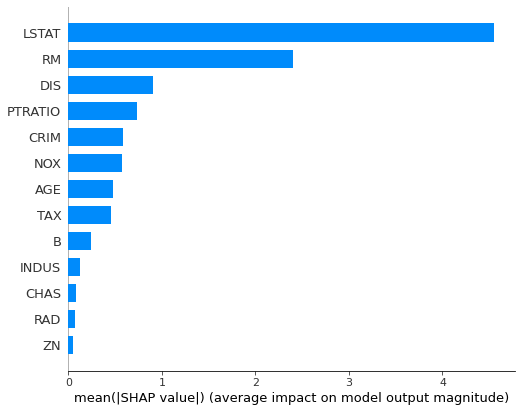

In [26]:
shap_values = explainer.shap_values(X_train.iloc[:100])
shap.summary_plot(shap_values, X_train.iloc[:100], plot_type= 'bar')

summary plot에서 가장 영향력이 큰 특성은 LSTAT 이다.

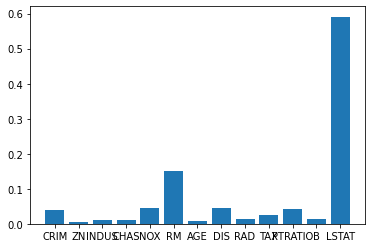

In [44]:
import matplotlib.pyplot as plt

plt.bar(x = X_test.columns, height = model.feature_importances_);

feature importances가 가장 큰 특성은 LSTAT 이다.

## 🔥 도전과제

### 3) 지속적으로 포트폴리오 프로젝트를 수행하세요
- 지속적으로 데이터를 랭글링 하고 추가적인 시각화 결과를 만드세요

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

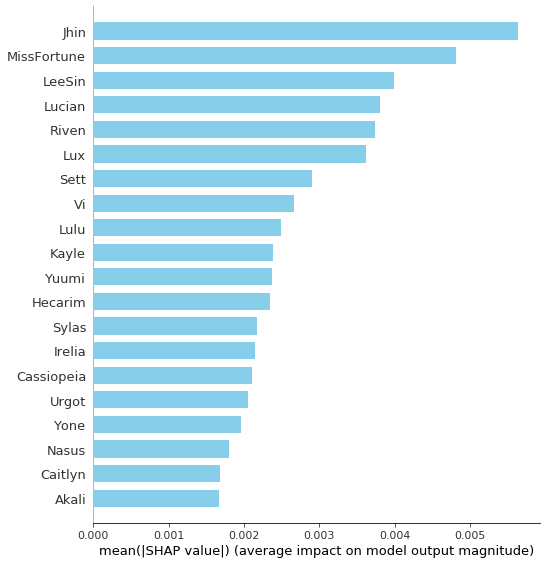

In [144]:
shap_values = explainer.shap_values(X_train.iloc[:100])
shap.summary_plot(shap_values, X_train.iloc[:100], plot_type= 'bar', color = 'skyblue')

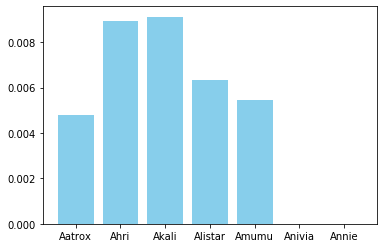

In [143]:
import matplotlib.pyplot as plt

plt.bar(x = X_test.columns[:7], height = model.feature_importances_[:7], color = 'skyblue');

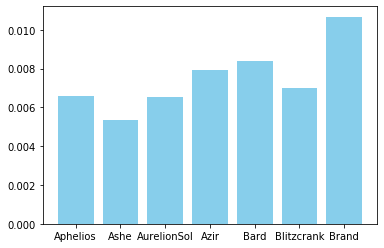

In [142]:
plt.bar(x = X_test.columns[7:14], height = model.feature_importances_[7:14], color = 'skyblue');

가장 중요한 특성이 따지면 승리에 가장 영향을 많이 주는 챔피언이지 않을까 싶다.

In [126]:
temp = pd.DataFrame([X_test.columns, model.feature_importances_]).sort_values(1, axis=1, ascending = False)

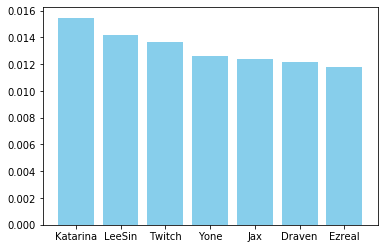

In [141]:
plt.bar(x = temp.iloc[0, :7].values, height = temp.iloc[1, :7].values, color = 'skyblue');